# **Elliptic dataset analysis**

# **1. Import Data & Packages** 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

##Tools

In [ ]:
#Creiamo una funzione che possa troncare i decimali al valore desiderato

import math

def truncate(number, decimals=0):
    """
    Returns a value truncated to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer.")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more.")
    elif decimals == 0:
        return math.trunc(number)

    factor = 10.0 ** decimals
    return math.trunc(number * factor) / factor

## Allarghiamo la visualizzazione dei dataframe

In [ ]:
pd.set_option("display.max_rows", 1500,"display.max_columns", 168)
#pd.set_option("display.max_rows", max_rows, "display.max_columns", max_cols) 


## Load Data - Elliptic Dataset

I tre dataframe seguenti possono essere scaricati dal link https://www.kaggle.com/ellipticco/elliptic-data-set

Il file scaricabile è composto da tre file .csv:

- *elliptic_txs_features.csv*: comprende un insieme di transazioni (identificabili dal Transaction ID presente nella prima colonna) e 165 features relative alla transazione, di cui le prime 96 locali, e le restanti deerivanti dalle prime (quindi aggregate).

- *elliptic_txs_classes.csv*: identifica la classe relativa ad ogni transazione. Avremo 1 = illecita, 2 = lecita e "unknown" se non sappiamo a cosa appartiene.

- *elliptic_txs_edgelist.csv*: composto da due colonne che rappresentano i nodi relativi a una singola transazione. La transazione avviene dall'elemento nella colonna txId1 verso l'elemento della colonna txId2. 

In [ ]:
# Carichiamo l'elliptic dataset

df_classes = pd.read_csv("/content/drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_classes.csv")
df_edges = pd.read_csv("/content/drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv")
df_features = pd.read_csv("/content/drive/MyDrive/elliptic_bitcoin_dataset/elliptic_txs_features.csv", header=None)


In [ ]:
# Elliptic dataset: la prima colonna rappresenta il numero della transazione, la seconda è il time step e le restanti colonne sono le features

print('Shape of the df_features')
print(df_features.shape)
print('----------------------')
df_features.head()

Shape of the df_features
(203769, 167)
----------------------


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,-0.167933,-0.049707,-0.164402,-0.028741,-0.035391,-0.042955,-0.013282,-0.057195,-0.169609,-0.171154,-0.174473,-1.373657,-1.371460,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.414005,-0.488340,-0.232553,-0.467554,0.048767,0.052956,-0.039149,-0.172895,-0.163126,-0.160932,-1.316342,-1.315388,-0.039144,-0.172884,-0.163115,-0.160925,-1.316333,-1.315375,-0.017032,-0.030026,-0.017640,-0.015071,-0.140763,-0.140335,-0.095403,-0.264376,-0.250523,-0.263703,1.133527,1.135947,-0.059013,-0.262368,-0.255111,-0.259194,1.125590,1.128038,-0.293773,-0.159732,0.034039,-0.183816,1.135523,1.135279,-0.169160,-0.201584,-0.116817,-0.191472,-0.014659,-0.018849,-1.457953,-1.494057,-0.083459,-1.485972,-0.088798,-0.090437,-0.166550,-0.216536,-0.134546,-0.194817,-0.003175,-0.004094,-1.096336,-1.267340,-0.349933,-1.230441,-0.004358,-0.004194,-0.116425,-0.176617,-0.137323,-0.152464,-0.026060,-0.027660,-0.093145,-0.143707,-0.097719,-0.127462,0.003143,0.002426,-0.120950,-0.199145,-0.187993,-0.212948,1.064205,1.063787,-1.373782,-1.354735,-0.297975,-1.403698,1.342003,1.340733,-0.171601,-0.458162,-0.423588,-0.440883,-1.015963,-1.016230,-0.968903,-0.375715,0.759748,-0.768329,1.488113,1.487932,-0.216814,-0.605631,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,-0.167948,-0.049707,-0.164417,-0.028741,-0.035391,-0.042955,-0.013282,-0.055327,-0.169757,-0.171477,-0.174490,0.887058,0.884557,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.413965,-0.488307,-0.232553,-0.467516,0.048767,0.052956,-0.039151,-0.172895,-0.163126,-0.160933,0.923473,0.923011,-0.039146,-0.172884,-0.163114,-0.160926,0.923516,0.923110,-0.017032,-0.030026,-0.017640,-0.015071,-0.140763,-0.140335,-0.095403,-0.264425,-0.250574,-0.263753,-0.169119,-0.167165,-0.059013,-0.262424,-0.255168,-0.259251,-0.187191,-0.185274,-0.293692,-0.760700,-0.692777,-0.719789,-1.084907,-1.084845,-0.170113,-0.202332,-0.116817,-0.192405,-0.014659,-0.018849,-1.457921,-1.494024,-0.083459,-1.485939,-0.088798,-0.090437,-0.166550,-0.216536,-0.134546,-0.194817,-0.003175,-0.004094,-1.096336,-1.267340,-0.349933,-1.230441,-0.004358,-0.004194,-0.116425,-0.176617,-0.137323,-0.152464,-0.026060,-0.027660,-0.093145,-0.143707,-0.097719,-0.127462,0.003143,0.002426,-0.121330,-0.110933,-0.075909,-0.111641,-1.159649,-1.160129,-1.373723,-1.353918,-0.295982,-1.403215,-0.975738,-0.975237,-0.168742,-0.263290,-0.186389,-0.250875,-1.015963,-1.016230,-0.968903,0.146997,1.366287,-0.464773,-1.116918,-1.116948,-0.216814,0.634272,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,-0.168576,-0.049707,-0.165054,-0.028741,-0.035391,-0.042955,-0.013282,

In [ ]:
# Edges dataset: le due colonne rappresentano i nodi relativi a una transazione dall'elemento 
# nella colonna txId1 verso l'elemento della colonna txId2. 

print('Shape of the df_edges')
print(df_edges.shape)
print('----------------------')
df_edges.head()

Shape of the df_edges
(234355, 2)
----------------------


,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [ ]:
# Classe relativa ad ogni transazione, avremo 1 = illecita, 2 = lecita e "unknown" se non sappiamo a cosa appartenga.

print('Shape of the df_classes')
print(df_classes.shape)
print('----------------------')
df_classes.head()


Shape of the df_classes
(203769, 2)
----------------------


,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [ ]:
# Cambiamo nome alle colonne per renderle più leggibili. Sappiamo che la prima colonna è il txId, mentre la seconda è il Time Step

colNames1 = {'0': 'txId', 1: "time step"}
colNames2 = {str(ii+2): "local_feature_" + str(ii+3) for ii in range(93)}
colNames3 = {str(ii+95): "aggregate_feature_" + str(ii+1) for ii in range(72)}

colNames = dict(colNames1, **colNames2, **colNames3 )
colNames = {int(jj): item_kk for jj,item_kk in colNames.items()}

df_features = df_features.rename(columns=colNames)

df_features.head()

,txId,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,-0.167933,-0.049707,-0.164402,-0.028741,-0.035391,-0.042955,-0.013282,-0.057195,-0.169609,-0.171154,-0.174473,-1.373657,-1.371460,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.414005,-0.488340,-0.232553,-0.467554,0.048767,0.052956,-0.039149,-0.172895,-0.163126,-0.160932,-1.316342,-1.315388,-0.039144,-0.172884,-0.163115,-0.160925,-1.316333,-1.315375,-0.017032,-0.030026,-0.017640,-0.015071,-0.140763,-0.140335,-0.095403,-0.264376,-0.250523,-0.263703,1.133527,1.135947,-0.059013,-0.262368,-0.255111,-0.259194,1.125590,1.128038,-0.293773,-0.159732,0.034039,-0.183

In [ ]:
# Assegnamo un valore intero alla classe "unknown"

df_classes.loc[df_classes['class'] == '1', 'class'] = 1
df_classes.loc[df_classes['class'] == '2', 'class'] = 2
df_classes.loc[df_classes['class'] == 'unknown', 'class'] = 3


print('Shape of classes', df_classes.shape)
print('Shape of edges', df_edges.shape)
print('Shape of features', df_features.shape)


Shape of classes (203769, 2)
Shape of edges (234355, 2)
Shape of features (203769, 167)


## Load data - Transazioni reali 

In questa sezione caricheremo il dataset relativo alle stesse transazioni dell'elliptic dataset, ma de-anonymized. Il dataset è stato scaricato dal seguente link https://www.kaggle.com/alexbenzik/deanonymized-995-pct-of-elliptic-transactions

Il numero di transazioni sarà minore delle transazioni presenti nel dataset in quanto non tutte le transazioni sono state deanonymized. 

Il file *result.csv* contiene l'ID della transazione e l'hash della transazione. 

Una volta controllata la veridicità delle informazioni presenti in questo dataset, abbiamo scaricato dal sito blockchain.com i valori relativi ad ogni transazione e salvati nel file *transactions_from_hashes.csv*

In [ ]:
# Carichiamo le transazioni deanonymized

df_addresses = pd.read_csv("/content/drive/MyDrive/elliptic_bitcoin_dataset/result.csv")

In [ ]:
# Load the transactions downloaded from blockchain.com.
#Sono le transazioni con time step == 25 | 13 | 9 | 28 | 20 | 29. Sono state escluse le transazioni di cui non conosciamo la classe
# quindi avremo solo transazioni o lecite o illecite 

from ast import literal_eval
df_real_transactions = pd.read_csv("/content/drive/MyDrive/elliptic_bitcoin_dataset/transactions_illecite_from_hashes_1.csv", converters={'inputs': literal_eval,'out': literal_eval})

In [ ]:
# Load the transactions downloaded from blockchain.com.
#Sono le transazioni con time step == 25 | 13 | 9 | 28 | 20 | 29.


from ast import literal_eval
df_real_transactions_complete = pd.read_csv("/content/drive/MyDrive/elliptic_bitcoin_dataset/transactions_illecite_from_hashes_complete.csv", converters={'inputs': literal_eval,'out': literal_eval})

In [ ]:
# Note: the addresses of this file are less than the total transactions, because we can't find all the transactions due to the cut loss

print('Shape of the df_addresses')
print(df_addresses.shape)

df_addresses = df_addresses.rename(columns={'transaction': 'hash'})
print('----------------------')
df_addresses.head()

Shape of the df_addresses
(202804, 2)
----------------------


,txId,hash
0,230325127,d6176384de4c0b98702eccb97f3ad6670bc8410d9da715...
1,230325139,300c7e7bb34263eae7ff8b0a726d5869bf73d71081490c...
2,86875675,7c790a31090462d720a172b3f55a51af2514971070db66...
3,230325147,052ccc5d925e3b1bf59e9375a471d97aa8df2208336428...
4,230325154,82666f65b865a0ada143fb460f38916618bf45e3132f07...


In [ ]:
print('Shape of the df_real_transactions')
print(df_real_transactions.shape)
print('----------------------')
df_real_transactions.head()

Shape of the df_real_transactions
(14902, 18)
----------------------


,Unnamed: 0,hash,ver,vin_sz,vout_sz,size,weight,fee,relayed_by,lock_time,tx_index,double_spend,time,block_index,block_height,inputs,out,txId
0,0,3a994de126c8ced91f4e3eb55ed73b7f43e3575866aa54...,1,4,501,17549,70196,163671,0.0.0.0,411357,1440440888047117,False,1463011151,411364,411364,"[{'sequence': 4294967294, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 1019131, ...",32496
1,1,348878e01b698383b7ea25dc6b69599beeafda14628c57...,1,4,721,24878,99512,375847,0.0.0.0,411306,5736635928013454,False,1463011151,411364,411364,"[{'sequence': 4294967294, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 1080, 'sp...",132791
2,2,03f89160f7605bb60ee1ae27212a3d4189474540e13736...,1,9,501,17727,70908,169453,0.0.0.0,411358,566172783544859,False,1463011151,411364,411364,"[{'sequence': 4294967294, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 13250, 's...",134715
3,3,f2b437700524451d8a71a683ecee3f7242c93d475f8d41...,1,5,501,17672,70688,166515,0.0.0.0,411358,1307512448638651,False,1463011151,411364,411364,"[{'sequence': 4294967294, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 34479, 's...",134767
4,4,a872a94ee24050cb9cc9258f3392217bd9405dbe4ba071...,1,4,501,17455,69820,162803,0.0.0.0,411358,6701303996871067,False,1463011151,411364,411364,"[{'sequence': 4294967294, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 18648, 's...",134785


In [ ]:
# Puliamo il dataframe 

df_real_transactions = df_real_transactions.drop(['Unnamed: 0'], axis = 1)
df_real_transactions.head()

,hash,ver,vin_sz,vout_sz,size,weight,fee,relayed_by,lock_time,tx_index,double_spend,time,block_index,block_height,inputs,out,txId
0,3a994de126c8ced91f4e3eb55ed73b7f43e3575866aa54...,1,4,501,17549,70196,163671,0.0.0.0,411357,1440440888047117,False,1463011151,411364,411364,"[{'sequence': 4294967294, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 1019131, ...",32496
1,348878e01b698383b7ea25dc6b69599beeafda14628c57...,1,4,721,24878,99512,375847,0.0.0.0,411306,5736635928013454,False,1463011151,411364,411364,"[{'sequence': 4294967294, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 1080, 'sp...",132791
2,03f89160f7605bb60ee1ae27212a3d4189474540e13736...,1,9,501,17727,70908,169453,0.0.0.0,411358,566172783544859,False,1463011151,411364,411364,"[{'sequence': 4294967294, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 13250, 's...",134715
3,f2b437700524451d8a71a683ecee3f7242c93d475f8d41...,1,5,501,17672,70688,166515,0.0.0.0,411358,1307512448638651,False,1463011151,411364,411364,"[{'sequence': 4294967294, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 34479, 's...",134767
4,a872a94ee24050cb9cc9258f3392217bd9405dbe4ba071...,1,4,501,17455,69820,162803,0.0.0.0,411358,6701303996871067,False,1463011151,411364,411364,"[{'sequence': 4294967294, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 18648, 's...",134785


# **2. Esploriamo l'elliptic dataset** 

<BarContainer object of 3 artists>

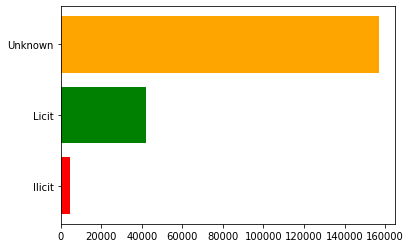

In [ ]:
group_class = df_classes.groupby('class').count()
plt.barh(['Ilicit', 'Licit','Unknown'], group_class['txId'].values, color=['r','g','orange'] )

Text(0.5, 1.0, 'Number of transactions by Time Step')

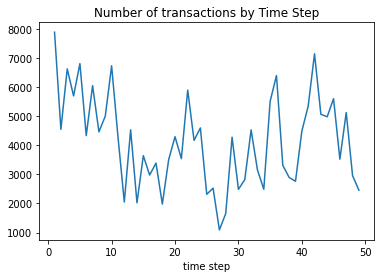

In [ ]:
# Number of transaction for each step

group_feature = df_features.groupby('time step').count()

group_feature['txId'].plot()
plt.title('Number of transactions by Time Step')

In [ ]:
# Merge Class and features

df_class_feature = pd.merge(df_classes, df_features)
df_class_feature.head()

,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
0,230425980,3,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,-0.167933,-0.049707,-0.164402,-0.028741,-0.035391,-0.042955,-0.013282,-0.057195,-0.169609,-0.171154,-0.174473,-1.373657,-1.371460,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.414005,-0.488340,-0.232553,-0.467554,0.048767,0.052956,-0.039149,-0.172895,-0.163126,-0.160932,-1.316342,-1.315388,-0.039144,-0.172884,-0.163115,-0.160925,-1.316333,-1.315375,-0.017032,-0.030026,-0.017640,-0.015071,-0.140763,-0.140335,-0.095403,-0.264376,-0.250523,-0.263703,1.133527,1.135947,-0.059013,-0.262368,-0.255111,-0.259194,1.125590,1.128038,-0.293773,-0.159732,0.03403

In [ ]:
# Number of transactions per class and timestep

group_class_feature = df_class_feature.groupby(['time step', 'class']).count()
group_class_feature = group_class_feature['txId'].reset_index().rename(columns={'txId': 'count'})
group_class_feature.head()


,time step,class,count
0,1,1,17
1,1,2,2130
2,1,3,5733
3,2,1,18
4,2,2,1099


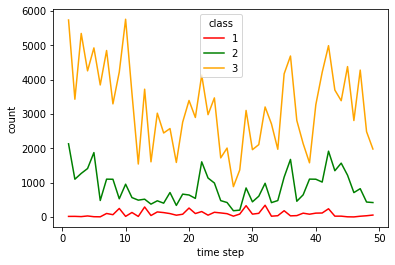

In [ ]:
sns.lineplot(x='time step', y='count', hue='class', data = group_class_feature, palette=['r','g','orange'] )

Text(0.5, 0, 'time step')

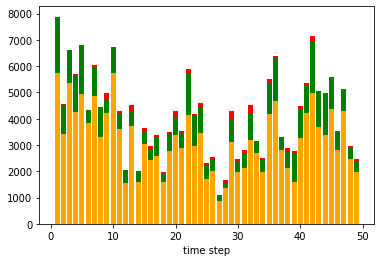

In [ ]:
class1 = group_class_feature[group_class_feature['class'] == 1]
class2 = group_class_feature[group_class_feature['class'] == 2]
class3 = group_class_feature[group_class_feature['class'] == 3]

p1 = plt.bar(class3['time step'], class3['count'], color = 'orange')

p2 = plt.bar(class2['time step'], class2['count'], color='g',
             bottom=class3['count'])

p3 = plt.bar(class1['time step'], class1['count'], color='r',
             bottom=np.array(class3['count'])+np.array(class2['count']))

plt.xlabel('time step')

Ilicit transactions at time step 20

86513    209952987
86514    209952974
86583    209091416
86584    209692891
86587    107697436
86692    210640426
86713    209539924
86714    209802609
86739    209683152
86740    209499354
86759    209918443
86772    210624714
86812    210233819
86813    210519382
86827    209709679
86845    110276377
86974    209058193
87011    211084916
87016    209923003
87023    209922935
87054    210624700
87082    209922528
87089    211086885
87106    209682872
87169    209722184
87178    209522524
87196    209054636
87206    209057696
87211    210624703
87222    209527608
87223    211083061
87297    209523687
87326    209052730
87367    209922222
87372    209680209
87427    209541751
87428    209482814
87435    210636318
87466    209525408
87494    209923327
87497    210624706
87513    209921515
87540     54618280
87553    210639090
87562    209521902
87565     51394168
87576    209722177
87589    210624713
87592     43531652
87593    209525755
87601    209922530
87611     51394132
87712     40

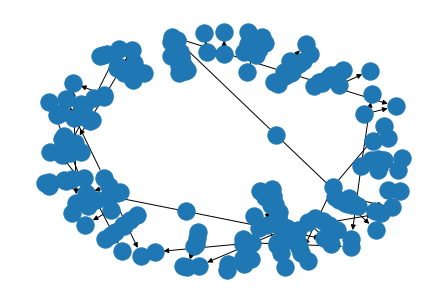

In [ ]:
# Obtain only the illicit txids that are in the time step 20 (they have class 1)

ilicit_ids = df_class_feature.loc[(df_class_feature['time step'] == 20) & (df_class_feature['class'] == 1), 'txId']

ilicit_edges = df_edges.loc[df_edges['txId1'].isin(ilicit_ids)]
print(ilicit_ids)
print('----------------------')
print(ilicit_edges)
print('----------------------')

graph = nx.from_pandas_edgelist(ilicit_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
pos = nx.spring_layout(graph)
nx.draw(graph, with_labels=False, pos=pos)

In [ ]:
# Vediamo che se prendiamo una transazione, come la 209952987, questa invia denaro a 209952974.
tran1 = df_edges[df_edges['txId1'] == 209952987].index
trant = df_edges.iloc[tran1]
print(trant)

print('----------------------')

#Il denaro che invia è stato prima ricevuto in tre transazioni differenti 208961542, 209541751 e 209037145.
# Anche se la transazione è illecita, i soldi che aveva ricevuto erano arrivati in modo lecito.

tran2 = df_edges[df_edges['txId2'] == 209952987].index
tranx = df_edges.iloc[tran2]
print(tranx)

print('----------------------')

            txId1      txId2
102370  209952987  209952974
----------------------
            txId1      txId2
102263  208961542  209952987
105413  209541751  209952987
105760  209037145  209952987
----------------------


# **3. Analisi del dataset**

## Troviamo l'Indegree

Dal paper (https://arxiv.org/pdf/1908.02591.pdf) sappiamo che una informazione importante presente fra le features è l'**INDEGREE**, cioè quante transazioni in ingresso sono presenti nella transazione (o quanti valori ha l'UTXO in ingresso). Purtroppo però tutte le transazioni sono state anonymized, infatti tutte le features, eccetto il time step, sono state standardizzate con valor medio nullo e varianza unitaria. Il nostro obiettivo è mappare queste features cercando di trovare nuovamente i valori de-normalizzati con l'intento di comprendere a cosa si riferiscono le features.

A tal fine possiamo prendere i nodi della prima colonna del *df_edges* e contare quante volte questi "nodi" sono presenti nella seconda colonna dello stesso dataframe. Facendo questo otteniamo l'indegree di quella transazione (ovviamente l'indegree che otteniamo dal dataframe non sarà esatto rispetto alle transazioni reali, essendoci stato un "taglio" delle transazioni ad ogni time step).

Una volta ricavato l'**INDEGREE** di tutti i nodi della edgelist, possiamo cercare la correlazione tra questo valore e ogni feature del dataset. In questo modo, probabilmente, la feature che presenta la maggiore correlazione, può essere la feature che rappresenta l'indegree.


In [ ]:
print(df_edges.shape)

df_in = df_edges['txId2'].value_counts().reset_index()
df_in.columns = ['txId', 'in_degree']
print("---------------------------------")
print(df_in.shape)
print("---------------------------------")
df_in.head()


(234355, 2)
---------------------------------
(148447, 2)
---------------------------------


,txId,in_degree
0,43388675,284
1,68705820,247
2,30699343,241
3,96576418,239
4,225859042,212


In [ ]:
# Inseriamo l'INDEGREE di ogni nodo all'interno del dataset 
# Il dataset sarà ridotto perchè non vi è una corrispondenza univoca tra le transazioni, una transazione può avere più ingressi.

df_features['txId'].head()

df_merged_in = df_in.merge(df_features, how='inner', on='txId')
#df_merged = df_merged.dropna()
print(df_merged_in.shape)
print("---------------------------------")
#print(df_merged['txId2'].sum())
df_merged_in.head()


(148447, 168)
---------------------------------


,txId,in_degree,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
0,43388675,284,10,-0.125817,4.448752,-0.646376,26.816496,-0.063725,25.548843,0.242712,-0.163646,-0.163478,-0.043446,-0.165815,0.977985,2.414230,-0.063200,-0.013282,0.624409,-0.122659,-0.172908,-0.064586,-0.243300,-0.243452,-0.139732,-0.145806,-0.079634,-0.155535,0.579960,0.689009,-0.139734,-0.145801,-0.079633,-0.155535,0.580048,0.689066,-0.024669,-0.031248,-0.023035,-0.026215,-0.681359,-0.338459,-0.227159,-0.217196,-0.058035,-0.230855,0.055325,0.067851,-0.227144,-0.220381,-0.076406,-0.232368,0.381329,0.199759,-0.373832,3.868054,3.170361,1.748603,0.204158,0.190919,4.628683,0.513804,-0.163126,1.208220,-0.196435,-0.196189,4.629650,0.513869,-0.163115,1.208278,-0.196409,-0.196133,-0.017032,-0.030026,-0.01764,-0.015071,-0.140763,-0.140335,4.313295,0.216750,-0.250574,0.707151,-0.169119,-0.167165,6.220011,0.216948,-0.255168,0.717108,-0.187191,-0.185274,3.991587,0.810879,-0.694235,2.084651,0.0

In [ ]:
# Proviamo a vedere quale fra le tante features presenta un grado di correlazione maggiore

from scipy.stats import pearsonr
correlations_list = []

for column in df_merged_in.columns[3:]:
  df_plot = df_merged_in[column]
  corr, _ = pearsonr(df_plot, df_merged_in['in_degree'])
  correlations_list.append(corr)
  
print(correlations_list)
print("---------------------------------")

corr_df = pd.DataFrame(correlations_list, columns = ['values_corr'])
print(corr_df.head())
print("---------------------------------")


print(corr_df.sort_values(by='values_corr', ascending=False))
l_corr_max = [corr_df.sort_values(by='values_corr', ascending=False)['values_corr'][:3]]

print('The features with more correlation with the indegree are:')
print(l_corr_max)


[0.0017533299842449682, 0.45433037673192217, 0.10602052132839089, 0.6412187995712816, 0.00433586883148004, 0.6366711345200727, 0.12208577774312553, -0.02346314829672415, -0.012546041442889653, 0.02864393600258207, -0.02281663350631191, 0.01719775297583622, 0.054194017383593966, 0.004618744707931242, -0.001507221412187933, 0.10781497923377167, -0.0013257775145085705, -0.011136613265408435, 0.004488701566503548, -0.028467295268410207, -0.028834608708401127, -0.012616617482484367, 0.02281074789626357, 0.011809233862951397, -0.00768146454254979, 0.006430921466181117, 0.0151560497236994, -0.012616479612373683, 0.02278271593674338, 0.011801085953463665, -0.007681264522221865, 0.006448537166081864, 0.015166197634242044, -0.0067257994283569066, 0.12083058399812655, 0.08624971845927344, -0.0037744347659379174, -0.010005421270792089, -0.011229023179312292, -0.028074339612328497, -0.007710105723094484, 0.01655069075797706, -0.02463413402550474, -0.012097007437461645, -0.0148848362051309, -0.02841

Abbiamo ottenuto che le features maggiormente correlate sono la local_feature_6 e la local_feature_8. 
Ordiniamo il dataset in base alla feature più correlata, cioè la 6.

In [ ]:
df_merged_in = df_merged_in.sort_values(by='local_feature_6')
df_merged_in.head()

,txId,in_degree,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
74223,121591288,1,6,-0.172750,-0.132206,1.018602,-0.12197,-0.043875,-0.113002,-0.061584,-0.163406,-0.169224,-0.049707,-0.165710,-0.028741,-0.035391,-0.042955,-0.013282,-0.057310,-0.170918,-0.172648,-0.175989,-1.373657,-1.371460,-0.139732,-0.148912,-0.080147,-0.155662,-0.010763,-0.012107,-0.139734,-0.148908,-0.080147,-0.155662,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.414031,-0.488362,-0.232553,-0.467579,0.048767,0.052956,-0.039151,-0.172895,-0.163126,-0.160933,0.923473,0.923011,-0.039146,-0.172884,-0.163114,-0.160926,0.923516,0.923110,-0.017032,-0.030026,-0.017640,-0.015071,-0.140763,-0.140335,-0.095403,-0.263699,-0.249827,-0.263021,1.133527,1.135947,-0.059013,-0.262013,-0.254746,-0.258833,1.125590,1.128038,-0.293897,-0.580966,-0.47

*Prima di andare a rappresentare la correlazione tra INDEGREE e local_feature_6, è necessario comprendere come la normalizzazione dei dati potrebbe essere stata fatta*

*Facciamo un po' di conti:*

*Ipotizziamo che sia stata utilizzata una normalizzazione, per la quale la nostra local_feature_6 (che per semplicità chiameremo V6) è il risultato.
Avremo quindi:*

$V6 = (INDEGREE - mean(INDEGREE))/StDev(INDEGREE)$

*Per semplicità di notazione definiamo INDEGREE la nostra X.*

*Vogliamo shiftare il tutto centrandolo per avere un problema più semplice e vogliamo inoltre cancellare un valore superfluo come la mean.*

*Sottraiamo a destra e a sinistra il valore min(V6) che è il valore minimo che abbiamo di V6.*
Avremo:
$V6-min(V6) = (x - mean(x))/sd(x) - min(V6)$
$V6-min(V6) = (x - mean(x))/sd(x) - min((x - mean(x))/sd(x))$

*L'operatore min è lineare*

$V6-min(V6) = (x - mean(x))/sd(x) - (min(x) - mean(x))/sd(x)$

*Sappiamo inoltre che il valore di min(x) è 1 (lo abbiamo trovato contando i nodi*

$V6-min(V6) = (x - mean(x))/sd(x) - (1- mean(x))/sd(x)$

$V6-min(V6) = (x - 1) / sd(x)$

*Noi vogliamo ricavare INDEGREE a partire da V6, quindi troviamo X:*

$V6-min(V6) = (x - 1) / sd(x)$


$x = (V6-min(v6))*sd(X) + 1$



Nel codice seguente notiamo effettivamente che la differenza tra due valori nella V6 non è altro che uno step multiplo di 0.0750375. Possiamo quindi mappare i valori in-degree (che sono valori interi) a questi valori trovando una funzione lineare.

In [ ]:
feature_V6 = df_class_feature.sort_values(by='local_feature_6')['local_feature_6']

feature_V6 = np.array(feature_V6)
print(feature_V6[feature_V6 >0])
diff_feature_V6 = []
for idx,el in enumerate(feature_V6):

  if idx != 0:
    diff = feature_V6[idx] - feature_V6[idx-1]
    diff_feature_V6.append(diff) 

tr_diff_feature_V6 = []

for el in diff_feature_V6:
  el_tr = truncate(el,decimals = 7)
  tr_diff_feature_V6.append(el_tr)
  
tr_diff_feature_V6 = np.unique(tr_diff_feature_V6)
tr_diff_feature_V6 = tr_diff_feature_V6[1:]
print (tr_diff_feature_V6)

min_diff_V6 = tr_diff_feature_V6.min()
print(min_diff_V6)


[2.81054170e-02 2.81054170e-02 2.81054170e-02 ... 4.75268482e+01
 4.86524108e+01 4.90275984e+01]
[0.0750375 0.150075  0.2251125 0.30015   0.3751875 0.450225  0.5252625
 0.6003    0.6753375 0.750375  0.8254125 1.0505251 1.1255626 1.6508251
 1.7258626]
0.0750375


74223     0.000000
96540     0.000000
96539     0.000000
96538     0.000000
96537     0.000000
           ...    
2        43.971980
869      45.022505
216      46.673330
175      46.748368
131      49.149568
Name: local_feature_6, Length: 148447, dtype: float64


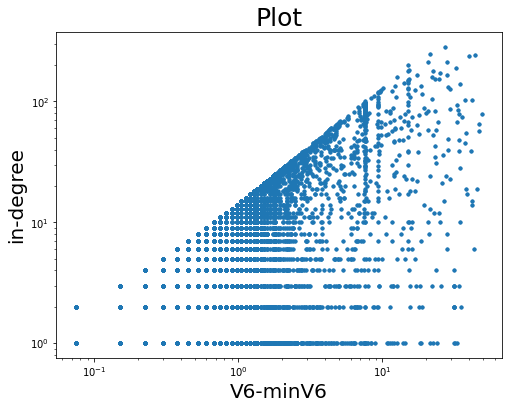

In [ ]:
import matplotlib.pyplot as plt

minV6 = df_merged_in['local_feature_6'].min()

df_plot = df_merged_in['local_feature_6']-minV6
print(df_plot)

fig = plt.figure(figsize=(8, 6))
plt.scatter(df_plot, df_merged_in['in_degree'],marker='.')
plt.plot(df_plot, df_merged_in['in_degree'],marker='.', linestyle = 'None')

plt.loglog(basex=10,basey=10)
plt.xlabel("V6-minV6",fontsize=20)
plt.ylabel("in-degree",fontsize=20)
plt.title("Plot",fontsize=25)
plt.show()
plt.show()

Dallo scatterplot è possibile notare una correlazione positiva tra V6-minV6 e l'indegree. Possiamo quindi trovare la funzione lineare tra queste 2 variabili.

*l'equazione ricavata precedentemente, legata alla normalizzazione era:*

$V6 = (INDEGREE - mean(INDEGREE))/StDev(INDEGREE)$ (0)

$V6-min(V6) = (x - 1) / sd(x)$ (1)

*Per trovare l'equazione lineare tra le due variabili è sufficiente trovare quei valori m e q che rendono valida l'equazione: y = mx + q. Per farlo ci bastano due punti noti.*
*Possiamo ragionare sul fatto che m non è altro che il differenziale di y diviso per il differenziale di x.*
*Quindi otteniamo che:*

$P0 (1, - 0.1219696)$

$P1 (1, - 0.1219696)$

$P2 (2, - 0.0469320914)$

$P3 (3, 2.81054170e-02)$

$m = Dy/Dx = p2y-p20/p2x-p20 = min(diffV6)$

*Ora ci serve q. Se*

$y = minV6$ (cioè -0.1219696)

*avremo che*

$y = mx +q$ 

*sarà:*

$minV6 = min(diffv6)* 1 + q$

$q = minV6/min(diffv6)$

*Date quindi le due equazioni:*

$V6 = (INDEGREE - mean(INDEGREE))/StDev(INDEGREE)$

$V6 = min(diffV6)X + minV6/min(diffV6)$

*avremo*

$(x - mean(x))/StDev(x) = min(diffV6)X + minV6/min(diffV6)$

*quindi trovando sd:*

$x/sd(x) - mean/sd = min(diff)*x + minV6/min(diffV6)$

$sd = 1/min(diffV6)$

*Dalla (1), avremo:*

$V6-min(V6) = (x - 1) / sd(x)$

$V6-min(V6) = (x - min(x))min(diffV6)$ 
*e sappiamo che min(x) in questo caso è 1*

*Troviamo X:*


$(x - min(x))min(diffV6) = (V6-min(V6))$

$(x - min(x)) = (V6-min(V6))/min(diffV6)$


$X = (V6-min(V6))/min(diffV6) + min(x)$

*poiché min(x)= 1*

$X = V6-min(V6)/min(diffV6) + 1$



*quindi avremo che:*

$y = V6*( 1/min(diffV6)) + 1 - min(V6)/min(diffV6)$


or in general:
$y = V6*( 1/min(diffV6)) + min(x) - min(V6)/min(diffV6)$




La formula trovata è applicabile alla variabile local_feature_6 e ci permette di ricavare la stessa colonna Indegree.

##Troviamo l'outdegree

*Ragionamento analogo può essere fatto per l'outdegree, tenendo sempre conto di tutte le considerazioni fatte sopra.* 

*Per fare ciò prendiamo i nodi presenti nella seconda colonna dell'edge list e vediamo quante volte sono contenuti nella prima colonna. Questo valore sarà l '**OUTDEGREE** della transazione*

*Una volta ottenuto l'OUTDEGREE è possibile identificare la colonna maggiormente correlata con questo.*

In [ ]:
print("dimensione df_edges",df_edges.shape)

df_out = df_edges['txId1'].value_counts().reset_index()
df_out.columns = ['txId', 'out_degree']
print("---------------------------------")
print("dimensione df_out",df_out.shape)
print("---------------------------------")
df_out.head()


dimensione df_edges (234355, 2)
---------------------------------
dimensione df_out (166345, 2)
---------------------------------


,txId,out_degree
0,2984918,472
1,89273,288
2,102570,122
3,3181,112
4,7952,99


In [ ]:
# Inseriamo l'OUTDEGREE di ogni nodo all'interno del dataset

df_features['txId'].head()

df_merged_out = df_out.merge(df_features, how='inner', on='txId')

print(df_merged_out.shape)
print("---------------------------------")

df_merged_out.head()


(166345, 168)
---------------------------------


,txId,out_degree,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
0,2984918,472,22,1.684981,-0.210553,-1.756361,-0.121970,97.419750,-0.113002,-0.061584,1.737325,1.704868,-0.049707,1.732900,-0.028741,-0.035391,99.358296,-0.013282,-0.057310,-0.140527,-0.171250,-0.175369,-0.775680,-1.371460,1.828567,1.107041,-0.080147,1.512162,-0.010763,-0.012107,1.828864,1.107130,-0.080147,1.51234,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.210772,-0.223886,-0.075256,-0.218857,0.037468,0.043444,-0.210158,-0.226564,-0.097895,-0.218953,0.036577,0.042345,6.068082,4.902787,-0.232553,5.752276,0.048767,0.052956,-0.039151,-0.091613,-0.161155,-0.160681,-0.249970,-0.899991,-0.039146,-0.091595,-0.161144,-0.160676,-0.249047,-0.900758,-0.017032,3.203811,0.051932,-0.013109,-0.200516,0.069613,-0.095403,-0.215319,-0.246766,-0.255728,-0.130046,-0.140359,-0.059135,-0.242078,-0.251674,-0.252588,-0.414378,-0.445666,-0.282165,4.641258,0.575546,1.7225

In [ ]:
#*Proviamo a vedere quale fra le tante features presenta un grado di correlazione maggiore.*

from scipy.stats import pearsonr
correlations_list = []

for column in df_merged_out.columns[3:]:
  df_plot = df_merged_out[column]
  corr, _ = pearsonr(df_plot, df_merged_out['out_degree'])
  correlations_list.append(corr)
  
print(correlations_list)
print("---------------------------------")

corr_df = pd.DataFrame(correlations_list, columns = ['values_corr'])
print(corr_df.head())
print("---------------------------------")


print(corr_df.sort_values(by='values_corr', ascending=False))
l_corr_max = [corr_df.sort_values(by='values_corr', ascending=False)['values_corr'][:3]]

print('The features with more correlation with this are:')
print(l_corr_max)


[0.0496425162728418, 0.1861697353559004, 0.05525099742031912, 0.03879870224729449, 0.660299553741548, 0.04315868430665339, 0.003136265693159338, 0.040563224884438885, 0.045258594781529465, 0.03236248888026052, 0.04212248101207957, 0.007015490141048684, 0.013374399182160579, 0.6655023654232397, 0.0596849782722715, -0.004728038569141588, 0.031508991018528776, 0.005292220981140249, -0.003013420737310003, -0.02579080867216309, -0.024029094310206923, 0.06077639855084131, 0.04537280243040104, 0.0022413714190086613, 0.05293189661328866, 0.0041897678750106625, 0.006396564679394751, 0.060748114214241054, 0.04534682698084229, 0.002242125337217547, 0.05290622295034897, 0.004143999015855365, 0.006354280645664435, 0.045046868500095934, 0.05723710695860262, 0.03699972502642181, 0.04630040764211702, -0.007168021503596301, -0.007429460664030266, -0.0029534532180148978, 0.0009716062178068998, 0.006258740491589638, -0.0020241820247258084, -0.00043920611178529276, -0.00112721590229079, -0.003631269063252

Abbiamo ottenuto che le features maggiormente correlate sono la local_feature_13 e la local_feature_7. Ordiniamo il dataset in base alla feature 7.



In [ ]:
df_merged_out = df_merged_out.sort_values(by='local_feature_7')
df_merged_out.head()

,txId,out_degree,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
140591,163867957,1,29,-0.170667,-0.134326,1.018602,-0.12197,-0.063725,-0.113002,-0.061584,-0.161275,-0.167123,-0.049707,-0.163581,-0.028741,-0.035391,-0.0632,-0.013282,-0.023932,-0.168770,-0.172908,-0.170782,-0.2433,-0.243452,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.413986,-0.488325,-0.232553,-0.467536,0.048767,0.052956,-0.039042,-0.172879,-0.163126,-0.160901,-0.196435,-0.196189,-0.039037,-0.172868,-0.163115,-0.160894,-0.196409,-0.196133,-0.017032,-0.030026,-0.01764,-0.015071,-0.140763,-0.140335,-0.092863,-0.264147,-0.250574,-0.263193,-0.169119,-0.167165,-0.058402,-0.262377,-0.255168,-0.259156,-0.187191,-0.185274,-0.293772,-0.761935

In [ ]:
feature_V7 = df_class_feature.sort_values(by='local_feature_7')['local_feature_7']

feature_V7 = np.array(feature_V7)
print(feature_V7[feature_V7 >0])
diff_feature_V7 = []
for idx,el in enumerate(feature_V7):

  if idx != 0:
    diff = feature_V7[idx] - feature_V7[idx-1]
    diff_feature_V7.append(diff) 

tr_diff_feature_V7 = []

for el in diff_feature_V7:
  el_tr = truncate(el,decimals = 7)
  tr_diff_feature_V7.append(el_tr)
  
tr_diff_feature_V7 = np.unique(tr_diff_feature_V7)
tr_diff_feature_V7 = tr_diff_feature_V7[1:]
print (tr_diff_feature_V7)

min_diff_V7 = tr_diff_feature_V7.min()
print(min_diff_V7)


[1.56755280e-02 1.56755280e-02 1.56755280e-02 ... 9.74197498e+01
 1.05935411e+02 2.60090707e+02]
[1.98500000e-02 3.97000000e-02 5.95500000e-02 7.94001000e-02
 9.92501000e-02 1.19100100e-01 1.38950100e-01 1.58800200e-01
 1.98500200e-01 2.18350200e-01 2.38200300e-01 2.58050300e-01
 2.77900300e-01 2.97750300e-01 3.17600400e-01 3.57300400e-01
 3.77150400e-01 3.97000500e-01 4.16850500e-01 4.76400600e-01
 4.96250600e-01 5.16100600e-01 5.35950600e-01 5.55800700e-01
 6.74900800e-01 7.54300900e-01 8.33701000e-01 8.73401100e-01
 9.72651200e-01 9.92501200e-01 1.01235120e+00 1.09175130e+00
 1.13145140e+00 1.27040160e+00 1.32995160e+00 1.46890180e+00
 1.90560240e+00 2.20335280e+00 2.89810360e+00 3.15615400e+00
 3.39435430e+00 3.59285450e+00 4.66475590e+00 8.51566080e+00
 4.21019037e+01 1.54155297e+02]
0.01985


140591      0.000000
114425      0.000000
156844      0.000000
90083       0.000000
73824       0.000000
             ...    
8          97.284974
3          97.364374
0          97.483474
7         105.999135
1         260.154432
Name: local_feature_7, Length: 166345, dtype: float64


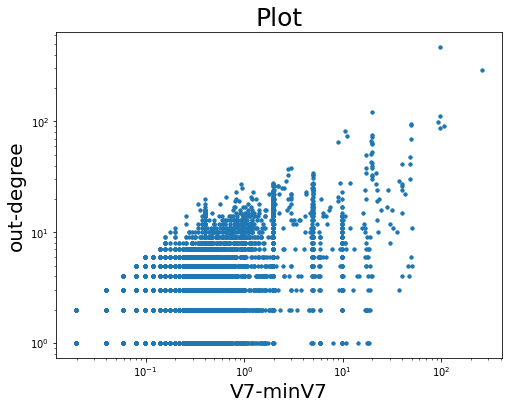

In [ ]:
import matplotlib.pyplot as plt

minV7 = df_merged_out['local_feature_7'].min()

df_plot = df_merged_out['local_feature_7']-minV7

print(df_plot)

fig = plt.figure(figsize=(8, 6))
plt.scatter(df_plot, df_merged_out['out_degree'],marker='.')
plt.plot(df_plot, df_merged_out['out_degree'],marker='.', linestyle = 'None')

plt.loglog(basex=10,basey=10)
plt.xlabel("V7-minV7",fontsize=20)
plt.ylabel("out-degree",fontsize=20)
plt.title("Plot",fontsize=25)
plt.show()
plt.show()

Consideriamo anche la local_feature 16 e verifichiamo le differenze


In [ ]:
df_merged_out = df_merged_out.sort_values(by='local_feature_16')
df_merged_out.head()

,txId,out_degree,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
140591,163867957,1,29,-0.170667,-0.134326,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.161275,-0.167123,-0.049707,-0.163581,-0.028741,-0.035391,-0.0632,-0.013282,-0.023932,-0.168770,-0.172908,-0.170782,-0.2433,-0.243452,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.413986,-0.488325,-0.232553,-0.467536,0.048767,0.052956,-0.039042,-0.172879,-0.163126,-0.160901,-0.196435,-0.196189,-0.039037,-0.172868,-0.163115,-0.160894,-0.196409,-0.196133,-0.017032,-0.030026,-0.01764,-0.015071,-0.140763,-0.140335,-0.092863,-0.264147,-0.250574,-0.263193,-0.169119,-0.167165,-0.058402,-0.262377,-0.255168,-0.259156,-0.187191,-0.185274,-0.293772,-0.76193

In [ ]:
feature_V16 = df_class_feature.sort_values(by='local_feature_16')['local_feature_16']

feature_V16 = np.array(feature_V16)
print(feature_V16[feature_V16 >0])
diff_feature_V16 = []
for idx,el in enumerate(feature_V16):

  if idx != 0:
    diff = feature_V16[idx] - feature_V16[idx-1]
    diff_feature_V16.append(diff) 

tr_diff_feature_V16 = []

for el in diff_feature_V16:
  el_tr = truncate(el,decimals = 7)
  tr_diff_feature_V16.append(el_tr)
  
tr_diff_feature_V16 = np.unique(tr_diff_feature_V16)
tr_diff_feature_V16 = tr_diff_feature_V16[1:]
print (tr_diff_feature_V16)

min_diff_V16 = tr_diff_feature_V16.min()
print(min_diff_V16)


[1.77786629e-02 1.77786629e-02 1.77786629e-02 ... 9.93582960e+01
 1.08043253e+02 2.65263236e+02]
[2.02446000e-02 4.04893000e-02 6.07339000e-02 8.09786000e-02
 1.01223200e-01 1.21467900e-01 1.41712500e-01 1.61957200e-01
 1.82201800e-01 2.02446500e-01 2.22691100e-01 2.63180500e-01
 2.83425100e-01 3.03669800e-01 3.23914400e-01 3.44159100e-01
 3.64403700e-01 3.84648400e-01 4.04893000e-01 4.25137700e-01
 4.65627000e-01 5.06116300e-01 5.26361000e-01 5.46605600e-01
 5.66850300e-01 6.88318200e-01 8.50275400e-01 8.90764700e-01
 9.91988000e-01 1.01223270e+00 1.03247730e+00 1.07296660e+00
 1.09321130e+00 1.15394520e+00 1.29565780e+00 1.35639180e+00
 1.49810430e+00 2.08519930e+00 2.24715650e+00 2.95571940e+00
 3.21889990e+00 3.46183580e+00 3.66428230e+00 4.75749360e+00
 8.68495650e+00 4.29389112e+01 1.57219983e+02]
0.0202446


140591      0.000000
81108       0.000000
81110       0.000000
143319      0.000000
124170      0.000000
             ...    
8          99.219049
3          99.300028
0          99.421496
7         108.106453
1         265.326436
Name: local_feature_16, Length: 166345, dtype: float64


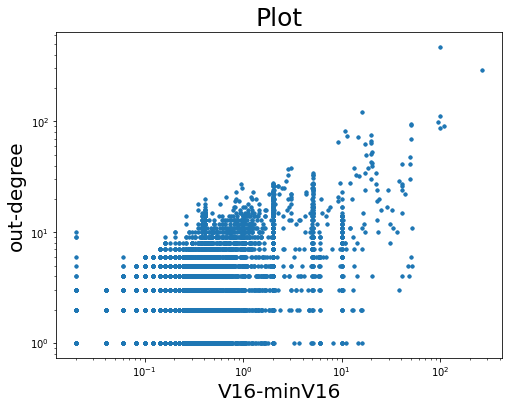

In [ ]:
import matplotlib.pyplot as plt

minV16 = df_merged_out['local_feature_16'].min()

df_plot = df_merged_out['local_feature_16']-minV16

print(df_plot)

fig = plt.figure(figsize=(8, 6))
plt.scatter(df_plot, df_merged_out['out_degree'],marker='.')
plt.plot(df_plot, df_merged_out['out_degree'],marker='.', linestyle = 'None')

plt.loglog(basex=10,basey=10)
plt.xlabel("V16-minV16",fontsize=20)
plt.ylabel("out-degree",fontsize=20)
plt.title("Plot",fontsize=25)
plt.show()
plt.show()

##Considerazioni 
Notiamo che i valori di V7 sono sempre maggiori o uguali ai valori di V16. Lo stesso vale per la V6 che presenta sempre valori maggiori o uguali alla V8. Ciò ci fa pensare che le colonne saranno rispettivamente: output, unique_output, input e unique_input.

La medesima formula trovata per la V6 ha validità anche per la V7. E' possibile quindi applicare la stessa formula a tutto il dataset tenendo in cosiderazione le variabili: minColonna, diffColonna e min(diffColonna) che possono essere applicate facilmente ad ogni Feature.

Importante sottolineare che l'equazione generale ottenuta 

*y=ElementoColonna∗(1/min(diffColonna))+min(x)−min(Colonna)/min(diffColonna)*

presentava un calcolo semplice nel caso della variabile Indegree perchè siamo a conoscenza del min(x) che era 1, ma non essendo a conoscenza di quale valore sia il min(x) per tutte le altre Features, avremo sempre un calcolo approssimativo se traduciamo il dataset con questa formula.

Se il valore minimo della feature non normalizzata è 1 allora avremo un matching corretto, altrimenti stiamo semplicemente ottenendo un laterale della retta. Comunque può essere utile calcolare il valore in quanto il laterale mi rappresenta solo uno spostamento parallelo della retta originale, senza alcuna modifica relativa allo slope della curva. 

## Test sul dataset de-anonymized

Isoliamo una transazione 208961542 e verifichiamo se gli input e gli output coincidono con quelli trovati su kaggle. Nota che l'address della transazione è 48c5e5c5d67787f8c219993b27db8019348f3c48feb60a8ed5b76d872ad080a9.

Controlleremo se tutti i valori combaciano perfettamente: fee, total_out, input e output (e rispettivi unique).


https://www.blockchain.com/search?search=48c5e5c5d67787f8c219993b27db8019348f3c48feb60a8ed5b76d872ad080a9

In [ ]:
fin = df_addresses[df_addresses['txId'] == 208961542].index
print(fin)
finx = df_addresses.at[86604,'hash']
print(finx)


Int64Index([86604], dtype='int64')
48c5e5c5d67787f8c219993b27db8019348f3c48feb60a8ed5b76d872ad080a9


In [ ]:
features_idx = df_class_feature[df_class_feature['txId'] == 208961542].index
print(features_idx)

a = np.array(df_class_feature.loc[88310])
print(a)
ab= df_class_feature.loc[88310]
print(ab)


Int64Index([88310], dtype='int64')
[208961542 2 20 -0.1576528367875754 0.04107577607044965 0.4636092255888361
 0.3282554504796349 0.3332759331909223 0.39017142211483097
 -0.06158379407303222 -0.16362262316514034 -0.16387545411298626
 -0.02182519822658965 -0.16371043764001114 0.9444416540703809
 1.2774927359827193 0.34169312743292546 -0.013281614870058885
 -0.05709119695768989 -0.1683748637112886 -0.17119485403623447
 -0.17453576249520147 -0.2297635307880316 -0.13983601816602664
 -0.1397318494003646 -0.1488814920361088 -0.08011869437534687
 -0.15565013711563358 0.9387341575466056 1.4222592193094656
 -0.1397336492254803 -0.14887678906239196 -0.08011816059096727
 -0.15565010588620834 0.9388170052621044 1.4222695014031816
 -0.02466883065625352 -0.031272390486630317 -0.0230451563960962
 -0.02621465517743091 0.001427813709709475 0.0014826437872997914
 -0.22721544644782224 -0.2383795598437666 -0.07349986880877835
 -0.2347623382772003 2.148071310682658 1.5552821937011372
 -0.22720332382768585 

In [ ]:
feature_V3 = df_class_feature.sort_values(by='local_feature_3')['local_feature_3']

feature_V3 = np.array(feature_V3)
print(feature_V3[feature_V3 >0])
diff_feature_V3 = []
for idx,el in enumerate(feature_V3):

  if idx != 0:
    diff = feature_V3[idx] - feature_V3[idx-1]
    diff_feature_V3.append(diff) 
  
diff_feature_V3 = np.unique(diff_feature_V3)

diff_feature_V3 = diff_feature_V3[diff_feature_V3 != 0]
print (diff_feature_V3)

min_diff_V3 = diff_feature_V3.min()
print(min_diff_V3)
minV3 = df_class_feature['local_feature_3'].min()

[4.77426898e-06 4.95167136e-05 6.17296863e-05 ... 7.06721167e+01
 7.11771821e+01 7.16819657e+01]
[6.30755448e-11 6.30756558e-11 6.30756836e-11 ... 5.08518647e+00
 5.80025679e+00 1.62735387e+01]
6.307554478723887e-11


In [ ]:
#Total Output 2.43038581 BTC (8 cifre decimali dopo la virgola) sono valori alla 10^8
V3 = ab['local_feature_3']

#m = 15853961614.9796
#q = 2742460603.92287

print(V3)

m= 1/min_diff_V3
q = minV3/ min_diff_V3
q = 1 - q
print(m,q)

total_out_value_V3 = m * V3 + q
print(total_out_value_V3)

-0.1576528367875754
15854004961.401697 2742467503.1010356
243038646.49176311


In [ ]:
feature_V4 = df_class_feature.sort_values(by='local_feature_4')['local_feature_4']

print(feature_V4.min())

feature_V4 = np.array(feature_V4)

diff_feature_V4 = []
for idx,el in enumerate(feature_V4):

  if idx != 0:
    diff = feature_V4[idx] - feature_V4[idx-1]
    diff_feature_V4.append(diff)
  
diff_feature_V4 = np.unique(diff_feature_V4)
print(diff_feature_V4)
diff_feature_V4 = diff_feature_V4[diff_feature_V4 != 0]

min_diff_V4 = diff_feature_V4.min()
print(min_diff_V4)
minV4 = df_class_feature['local_feature_4'].min()
print(minV4)

-0.21055257923974427
[0.00000000e+00 2.58850278e-06 2.58850278e-06 ... 3.32567213e+00
 4.28221192e+00 2.33595447e+01]
2.588502780509483e-06
-0.21055257923974427


In [ ]:
# Tasse fees della transaction # Fees 0.00097210 BTC

m = 386323.710952989
q = 81341.4537626213
V4 = ab['local_feature_4']


print(V4)
print(minV4)
m= 1/min_diff_V4
q = minV4/ min_diff_V4
print(q)
q = 1- q
print(m,q)
fee_V4 = m * V4 + q

print(fee_V4)

0.04107577607044965
-0.21055257923974427
-81341.45376436574
386323.71096127416 81342.45376436574
97211.00000651614


In [ ]:
V6 = ab['local_feature_6']
print(V6)
m= 1/min_diff_V6
q = minV6/ min_diff_V6
q = 1 - q
print(m,q)
#m = 13.3266685112665
#q = 2.62544842444139

input_count_V6 = m*V6 + q
print(input_count_V6)

0.3282554504796349
13.326669998334168 2.6254486058184314
7.000000669515049


In [ ]:
V7 = ab['local_feature_7']
print(V7)

m= 1/min_diff_V7
q = minV7/ min_diff_V7
q = 1 - q
print(m,q)
#m = 50.3777694891647
#q = 4.21030186142152

outputs_count_V7 = m * V7 + q
print (outputs_count_V7)

0.3332759331909223
50.377833753148614 4.210305956616471
21.00002551283422


In [ ]:
feature_V8 = df_class_feature.sort_values(by='local_feature_8')['local_feature_8']

feature_V8 = np.array(feature_V8)
print(feature_V8[feature_V8 >0])
diff_feature_V8 = []
for idx,el in enumerate(feature_V8):

  if idx != 0:
    diff = feature_V8[idx] - feature_V8[idx-1]
    diff_feature_V8.append(diff) 

tr_diff_feature_V8 = []

for el in diff_feature_V8:
  el_tr = truncate(el,decimals = 7)
  tr_diff_feature_V8.append(el_tr)
  
tr_diff_feature_V8 = np.unique(tr_diff_feature_V8)
tr_diff_feature_V8 = tr_diff_feature_V8[tr_diff_feature_V8 != 0]
print (tr_diff_feature_V8)

min_diff_V8 = tr_diff_feature_V8.min()
print(min_diff_V8)
minV8 = df_class_feature['local_feature_8'].min()

[ 0.05472247  0.05472247  0.05472247 ... 53.05565724 54.39745306
 54.56517754]
[0.0838622 0.1677244 0.2515867 0.3354489 0.4193111 0.5031734 0.5870356
 0.6708979 0.7547601 0.8386223 0.9224846 1.3417958 1.425658  3.0190405]
0.0838622


In [ ]:
V8 = ab['local_feature_8']
print(V8)

m= 1/min_diff_V8
q = minV8/ min_diff_V8
q = 1 - q
print(m,q)

#m = 11.9243179897452
#q = 2.34747189219164

V8 = ab['local_feature_8']
input_unique_count_V8 = m * V8 + q
print(input_unique_count_V8)

0.39017142211483097
11.92432347350773 2.3474725118678315
7.000002759283603


In [ ]:
feature_V16 = df_class_feature.sort_values(by='local_feature_16')['local_feature_16']

feature_V16 = np.array(feature_V16)
print(feature_V16[feature_V16 >0])
diff_feature_V16 = []
for idx,el in enumerate(feature_V16):

  if idx != 0:
    diff = feature_V16[idx] - feature_V16[idx-1]
    diff_feature_V16.append(diff) 

tr_diff_feature_V16 = []

for el in diff_feature_V16:
  el_tr = truncate(el,decimals = 7)
  tr_diff_feature_V16.append(el_tr)
  
tr_diff_feature_V16 = np.unique(tr_diff_feature_V16)
print(tr_diff_feature_V16)
tr_diff_feature_V16 = tr_diff_feature_V16[tr_diff_feature_V16 != 0]
print (tr_diff_feature_V16)

min_diff_V16 = tr_diff_feature_V16.min()
print(min_diff_V16)
minV16 = df_class_feature['local_feature_16'].min()

[1.77786629e-02 1.77786629e-02 1.77786629e-02 ... 9.93582960e+01
 1.08043253e+02 2.65263236e+02]
[0.00000000e+00 2.02446000e-02 4.04893000e-02 6.07339000e-02
 8.09786000e-02 1.01223200e-01 1.21467900e-01 1.41712500e-01
 1.61957200e-01 1.82201800e-01 2.02446500e-01 2.22691100e-01
 2.63180500e-01 2.83425100e-01 3.03669800e-01 3.23914400e-01
 3.44159100e-01 3.64403700e-01 3.84648400e-01 4.04893000e-01
 4.25137700e-01 4.65627000e-01 5.06116300e-01 5.26361000e-01
 5.46605600e-01 5.66850300e-01 6.88318200e-01 8.50275400e-01
 8.90764700e-01 9.91988000e-01 1.01223270e+00 1.03247730e+00
 1.07296660e+00 1.09321130e+00 1.15394520e+00 1.29565780e+00
 1.35639180e+00 1.49810430e+00 2.08519930e+00 2.24715650e+00
 2.95571940e+00 3.21889990e+00 3.46183580e+00 3.66428230e+00
 4.75749360e+00 8.68495650e+00 4.29389112e+01 1.57219983e+02]
[2.02446000e-02 4.04893000e-02 6.07339000e-02 8.09786000e-02
 1.01223200e-01 1.21467900e-01 1.41712500e-01 1.61957200e-01
 1.82201800e-01 2.02446500e-01 2.22691100e-01 2.

In [ ]:
V16 = ab['local_feature_16']
print(V16)

m= 1/min_diff_V16
q = minV16/ min_diff_V16
q = 1 - q
print(m,q)

#m = 49.3957564403755
#q = 4.121809499973
V16 = ab['local_feature_16']
input_unique_count_V16 = m * V16 + q
print(input_unique_count_V16)

0.34169312743292546
49.39588828625905 4.121817832626686
21.000053383485948


##Considerazioni finali

Il dataset trovato risulta combaciare con la formula precedentemente trovata e applicata ad alcune features confermando quindi la validità della formula. Ora sarebbe utile tradurre il dataset e cercare successivamente nuove correlazioni tra il dataset tradotto e le transazioni originali trovate.

Le features ottenute fin qui sono:
- local_feature_3: total_out_value_V3
- local_feature_4: fee_V4
- local_feature_6: input_count_V6
- local_feature_7: output_count_V7
- local_feature_8: input_unique_count_V8
- local_feature_16: output_unique_count_V16


# **4. Traduzione del dataset**

In questa sezione creeremo un dataset 'tradotto' per mezzo della formula ottenuta precedentemente. Il dataset ottenuto non sarà completamente corretto:  ogni colonna potrà presentare in più un valore Epsilon **costante** (positivo o negativo) che renderà la singola colonna diversa da quella originale (a meno che il valore minimo della feature originale non sia 1, valore che attualmente non conosciamo). Per questo motivo l'utilizzo di una correlazione è il metodo più interessante da utilizzare, in quanto l'aggiunta di un valore costante a una delle due variabili non inficierà in alcun modo sul risultato finale.

In [ ]:
# Scegliamo un ordine da seguire, il più ovvio è ordinare in base al transaction ID

df_class_feature = df_class_feature.sort_values(by= 'txId', ascending=True)

In [ ]:
# This function return two lists: 
# list_min is the list of each min of each column.
# list_min_diff is the list of each min diff of each column. The columns 1 and 2 are skipped

def find_list_of_min_diff(df_class_feature):
  list_min = []
  list_min_diff = []

  for column in df_class_feature.columns[3:]:
    a = column
    feature_column = df_class_feature.sort_values(by=a)[a]
    
    feature_column = np.array(feature_column)
    #print(feature_column[feature_column >0])
    diff_feature_column = []
    for idx,el in enumerate(feature_column):

      if idx != 0:
        diff = feature_column[idx] - feature_column[idx-1]
        diff_feature_column.append(diff) 
    diff_feature_column = np.unique(diff_feature_column)
    diff_feature_column = diff_feature_column[diff_feature_column != 0]
    #print(diff_feature_column)

    min_diff_column = diff_feature_column.min()
    
    min_column = df_class_feature[column].min()

    list_min.append(min_column)
    list_min_diff.append(min_diff_column)
  
  return list_min,list_min_diff

list_min,list_min_diff = find_list_of_min_diff(df_class_feature)


print(df_class_feature.shape)

print(len(list_min))
print(len(list_min_diff))
print(list_min)
print(list_min_diff)


(203769, 168)
165
165
[-0.17298263175632098, -0.21055257923974427, -1.756361477431697, -0.12196959975910054, -0.06372457323883694, -0.11300200928476245, -0.06158379407303222, -0.16364585597399806, -0.16946028553224987, -0.04970696439403985, -0.16594941341276534, -2.516704748133169, -2.486106024623408, -0.06319995329439422, -0.013281614870058885, -0.05740120981936867, -0.17115032523962578, -0.1729081406182527, -0.1762641385547161, -1.373657177393896, -1.37145982760274, -0.1397318592587936, -0.14891230631886504, -0.08014726965335221, -0.1556619811636361, -2.7009123548424703, -2.6895919044731067, -0.13973365908540558, -0.14890760539752332, -0.08014673584659182, -0.15566195120045412, -2.7007850388186303, -2.68931792469207, -0.02466883065625352, -0.031272390486630317, -0.0230451563960962, -0.02621465517743091, -6.996605816150668, -6.996013374946504, -0.22721544644782224, -0.2393683687143704, -0.07525553154622773, -0.23495151756654095, -3.7507099803843578, -3.727742256608096, -0.227203323827

In [ ]:
def m_q(df_class_feature, list_min, list_min_diff):
  
  list_min = np.array(list_min)
  list_min_diff = np.array(list_min_diff)
  m_list = 1 / list_min_diff

  q_list = list_min/ list_min_diff


  q_list = 1 - q_list
  
  print(len(m_list))
  print(len(q_list))


  return m_list,q_list


m_list, q_list = m_q(df_class_feature, list_min, list_min_diff)


165
165


In [ ]:
def apply_function(df_class_feature, m_list, q_list):
  print(df_class_feature.shape)
  df_translated = df_class_feature.copy()
  print(df_translated.shape)

  df_to_arr = np.array(df_class_feature.iloc[:,3:])


  new_df = m_list * df_to_arr + q_list


  df_translated.iloc[:,3:] = new_df

  return df_translated
  

df_translated = apply_function(df_class_feature, m_list, q_list)



(203769, 168)
(203769, 168)


Ricordiamo che le classi sono

1) Illecito, 
2) Lecito, 
3) Sconosciuto

In [ ]:
print(df_translated.columns)
#df_translated = df_translated.sort_values(by ='class')
df_translated.head()

l_min_max = []
for column in df_translated.columns:
  l_min_max.append([column, df_translated[column].min(),df_translated[column].max()])

for el in l_min_max:
  if el[2] < 2000:
    print(el)

print('---------------------------------------------')

for el in l_min_max:
  if el[1] > 1:
    print(el)

Index(['txId', 'class', 'time step', 'local_feature_3', 'local_feature_4',
       'local_feature_5', 'local_feature_6', 'local_feature_7',
       'local_feature_8', 'local_feature_9',
       ...
       'aggregate_feature_63', 'aggregate_feature_64', 'aggregate_feature_65',
       'aggregate_feature_66', 'aggregate_feature_67', 'aggregate_feature_68',
       'aggregate_feature_69', 'aggregate_feature_70', 'aggregate_feature_71',
       'aggregate_feature_72'],
      dtype='object', length=168)
['class', 1, 3]
['time step', 1, 49]
['local_feature_5', 1.0, 9.000000000000004]
['local_feature_6', 1.0000000000000004, 656.0000000000723]
['local_feature_8', 1.0000000000000002, 653.0000000000803]
['local_feature_9', 0.9999999999999999, 374.00000000000637]
['local_feature_17', 1.0, 691.0000000000084]
['aggregate_feature_19', 0.9999999999999996, 9.000000000000004]
['aggregate_feature_20', 0.9999999999999996, 9.000000000000004]
['aggregate_feature_25', 1.0, 675.0000000000272]
['aggregate_feature_2

# **5.1 Dataframe con molte illecite NO CLASSE 3**

In questa sezione creeremo un dataset con molte illecite, prelevando i time step dove la percentuale di illecite risulta essere elevata. Le transazioni corrispettive scaricate dal sito blockchain.com verranno poi salvate su un file .csv. Il file è già stato caricato ("transactions_illecite_from_hashes.csv") e salvato nella variabile df_real_transactions. 

Se non si vogliono apporre modifiche al dataset sarebbe bene non lanciare la sezione "Download delle transazioni".

I dataframe che otterremo saranno tutti dei sottoinsiemi dei dataset precedenti, i quali conterranno queste specifiche caratteristiche: 
- solo composti da classe illecita e lecita (no classe 3)
- transazioni relative ai time steps == 25 | 13 | 9 | 28 | 20 | 29 | 32 | 16 | 15 | 25 | 11 | 26 | 30 |21 | 31 | 38 | 35 | 18 | 17 | 24 | 49

I dataset ottenuti saranno:

- df_real_transactions che è il file caricato all'inizio e che qui viene creato
- df_addresses_times_illecite: che comprende gli indirizzi (hash) relativi alle transazioni
- df_class_feature_illecite: che è il dataset composto dalle sole transazioni selezionate
- df_translated_illecite: sono le transazioni tradotte




## Otteniamo il dataframe

In [ ]:
df_gr = df_class_feature[df_class_feature['class'] != 3]
group_extra = df_gr.groupby(['time step', 'class']).count()

group_extra = group_extra['txId'].reset_index().rename(columns={'txId': 'count'})#unstack()
group_extra.head()

gr_1 = group_extra[group_extra['class'] ==1]
gr_1.index = range(1,50)
gr_2 = group_extra[group_extra['class'] ==2]
gr_2.index = range(1,50)
#vedo la percentuale di classe 1 su classe 2

gr_percent = gr_1['count']/gr_2['count']
gr_percent = gr_percent.sort_values(ascending=False)
gr_percent.head(20)


13    0.561776
9     0.467925
28    0.427136
20    0.406250
29    0.389349
32    0.348624
16    0.318408
15    0.312102
25    0.247899
11    0.231858
26    0.228029
30    0.188209
21    0.184843
31    0.175497
38    0.172093
35    0.157032
18    0.154303
17    0.139045
24    0.138524
49    0.133333
Name: count, dtype: float64

In [ ]:
df_class_feature_ill = df_class_feature.loc[(df_class_feature['time step'] == 25) | (df_class_feature['time step'] == 13) | (df_class_feature['time step'] == 9) 
| (df_class_feature['time step'] == 28) | (df_class_feature['time step'] == 20) | (df_class_feature['time step'] == 29)| (df_class_feature['time step'] == 32)
| (df_class_feature['time step'] == 16) | (df_class_feature['time step'] == 15) | (df_class_feature['time step'] == 25) | (df_class_feature['time step'] == 11)
| (df_class_feature['time step'] == 26) | (df_class_feature['time step'] == 30) | (df_class_feature['time step'] == 21)
| (df_class_feature['time step'] == 31) | (df_class_feature['time step'] == 38) | (df_class_feature['time step'] == 35) | (df_class_feature['time step'] == 18) 
| (df_class_feature['time step'] == 17) | (df_class_feature['time step'] == 24) | (df_class_feature['time step'] == 49)]
print(df_class_feature_ill.shape)
df_class_feature_ill.head()

(69656, 168)


,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
60761,11597,3,11,0.177903,-0.102780,1.018602,-0.121970,0.253876,-0.113002,-0.061584,0.195364,0.184518,-0.049707,0.192660,-0.028741,-0.035391,0.260715,-0.013282,-0.056781,-0.083653,-0.125675,-0.127392,-0.772295,-0.758006,-0.139580,-0.148815,-0.080147,-0.155533,-0.010763,-0.012107,-0.139581,-0.148810,-0.080147,-0.155533,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.414008,-0.488343,-0.232553,-0.467557,0.048767,0.052956,-0.039151,-0.167977,-0.161304,-0.159826,-0.075177,-0.311471,-0.039146,-0.167966,-0.161292,-0.159819,-0.075151,-0.311419,-0.017032,-0.029942,-0.017609,-0.015060,0.098023,0.344612,-0.095403,-0.247086,-0.243509,-0.258062,0.009788,-0.035750,-0.059013,-0.250754,-0.250236,-0.255470,0.005695,-0.139964,-0.293835,1.519009,0.519406,0.126

In [ ]:
df_class_feature_ill = df_class_feature_ill.loc[(df_class_feature['class'] != 3) ]
print(df_class_feature_ill.shape)

(14997, 168)


In [ ]:
tx_ids_illecite = df_class_feature_ill['txId']
print(tx_ids_illecite)

print('----------------------')

df_addresses_times_illecite = df_addresses.loc[df_addresses['txId'].isin(tx_ids_illecite)]


df_addresses_times_illecite = df_addresses_times_illecite.sort_values(by = 'txId', ascending= True)
print(df_addresses_times_illecite)
print('----------------------')

58222         32496
61193        132791
58626        134715
58445        134767
59386        134785
            ...    
116299    402911317
115556    402915025
115821    402916803
115634    403109530
115973    403123184
Name: txId, Length: 14997, dtype: int64
----------------------
             txId                                               hash
61162       32496  3a994de126c8ced91f4e3eb55ed73b7f43e3575866aa54...
60980      132791  348878e01b698383b7ea25dc6b69599beeafda14628c57...
61149      134715  03f89160f7605bb60ee1ae27212a3d4189474540e13736...
61156      134767  f2b437700524451d8a71a683ecee3f7242c93d475f8d41...
61161      134785  a872a94ee24050cb9cc9258f3392217bd9405dbe4ba071...
...           ...                                                ...
114706  402911317  f3c265630cd082ff6797cebad4728e37f6898b393d6cae...
114906  402915025  671e1e25e1949867431c7e7f3f6c6548267f6de4399d8f...
114658  402916803  46413e3fa8ee628e5566ef9118ebef20f5a920b12b7038...
114709  403109530  df5c6af0

In [ ]:
tx_ids_illecite = df_addresses_times_illecite['txId']
print(tx_ids_illecite.shape)

print('----------------------')

df_class_feature_illecite = df_class_feature_ill.loc[df_class_feature_ill['txId'].isin(tx_ids_illecite)]
print(df_class_feature_illecite.shape)
#print('----------------------')
df_class_feature_illecite.head()

(14902,)
----------------------
(14902, 168)


,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
58222,32496,2,11,-0.169441,0.213110,1.573595,0.103143,9.861288,0.138585,-0.061584,-0.163639,-0.166303,-0.030155,-0.165042,-1.857464,-1.015677,10.059127,-0.013282,-0.057353,-0.171084,-0.172897,-0.176247,-0.873516,-1.362123,-0.139732,-0.148790,-0.080026,-0.155618,-2.037853,-1.083101,-0.139734,-0.148785,-0.080026,-0.155618,-2.037734,-1.082930,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227149,-0.227850,-0.049604,-0.231407,-2.888080,-2.973505,-0.227134,-0.232574,-0.062007,-0.232620,-2.895406,-1.472748,-0.136622,1.107890,1.817453,0.350224,-1.592751,-1.100799,-0.039151,-0.172770,-0.163111,-0.160929,-0.278546,-0.281806,-0.039146,-0.172759,-0.163100,-0.160923,-0.278506,-0.304626,-0.017032,-0.028976,-0.017506,-0.015037,-0.166942,-0.071393,-0.095403,-0.186772,-0.242287,-0.257112,-0.231997,-0.142143,-0.059135,-0.241929,-0.252380,-0.257404,-0.282542,-0.320148,-0.290024,3.195569,0.978

In [ ]:
# L'index order sarà molto utile quando faremo le correlazioni

index_order = df_class_feature_illecite.index.values.tolist()

df_addresses_times_illecite.index = index_order
df_addresses_times_illecite.head()

,txId,hash
58222,32496,3a994de126c8ced91f4e3eb55ed73b7f43e3575866aa54...
61193,132791,348878e01b698383b7ea25dc6b69599beeafda14628c57...
58626,134715,03f89160f7605bb60ee1ae27212a3d4189474540e13736...
58445,134767,f2b437700524451d8a71a683ecee3f7242c93d475f8d41...
59386,134785,a872a94ee24050cb9cc9258f3392217bd9405dbe4ba071...


## Traduciamolo

In [ ]:
df_translated = df_translated.sort_values(by= 'txId', ascending=True)
df_translated_illecite = df_translated.loc[df_translated['txId'].isin(tx_ids_illecite)]

print('----------------------')
print(df_translated_illecite.shape)
df_translated_illecite.head()

----------------------
(14902, 168)


,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
58222,32496,2,11,5.614652e+07,163672.000011,7.0,4.0,501.0,4.0,1.0,103414.167979,4.962383e+07,1.753388e+11,9.853204e+08,5.937909e+15,4.238224e+17,501.0,1.0,53296.001511,1.018533e+06,1.032351e+07,3.998716e+11,9.009740e+15,6.727674e+14,4.324417e+05,7.035790e+09,4.365112e+12,9.704418e+11,1.194461e+16,2.315197e+17,4.325073e+05,7.036259e+09,3.968281e+11,9.012209e+11,1.194447e+16,2.315049e+17,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.260654e+17,3.151392e+16,8.0,1294.0,1.155239e+14,1.277028e+14,3.107952e+16,2.717426e+16,8.0,1108.0,1.616251e+14,4.722013e+13,3.146307e+16,1.637609e+17,8.083573e+06,5.592584e+07,3.673474e+11,9.821539e+15,2.250318e+16,2.494104e+17,55719.636658,7.796695e+09,2.271510e+10,1.004584e+09,2.492703e+16,7.447743e+16,1.000061,7.795516e+09,2.372116e+10,9.964939e+08,1.246389e+16,7.283215e+16,1.0,5.857560e+07,1.694751e+09,1.944654e+13,1.629570e+17,1.359106e+17,1.0,9527.0,1.49279

# **5.2 Dataframe con molte illecite CON CLASSE 3**

In questa sezione creeremo un dataset con molte illecite, prelevando i time step dove la percentuale di illecite risulta essere elevata. Le transazioni corrispettive scaricate dal sito blockchain.com verranno poi salvate su un file .csv. Il file è già stato caricato ("transactions_illecite_from_hashes.csv") e salvato nella variabile df_real_transactions. 

Se non si vogliono apporre modifiche al dataset sarebbe bene non lanciare la sezione "Download delle transazioni".

I dataframe che otterremo saranno tutti dei sottoinsiemi dei dataset precedenti, i quali conterranno queste specifiche caratteristiche: 

- transazioni relative ai time steps == 25 | 13 | 9 | 28 | 20 | 29

I dataset ottenuti saranno:

- df_real_transactions_complete che è il file caricato all'inizio e che qui viene creato
- df_addresses_times_illecite_complete: che comprende gli indirizzi (hash) relativi alle transazioni
- df_class_feature_illecite_complete: che è il dataset composto dalle sole transazioni selezionate
- df_translated_illecite_complete: sono le transazioni tradotte




## Otteniamo il dataframe

In [ ]:
df_class_feature_ill = df_class_feature.loc[(df_class_feature['time step'] == 25) | (df_class_feature['time step'] == 13) | (df_class_feature['time step'] == 9) 
| (df_class_feature['time step'] == 28) | (df_class_feature['time step'] == 20) | (df_class_feature['time step'] == 29)]
print(df_class_feature_ill.shape)
df_class_feature_ill.head()

(22057, 168)


,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
120304,52635,3,29,-0.172544,-0.068081,0.463609,-0.046932,-0.024025,-0.029140,-0.061584,-0.163549,-0.169110,-0.047383,-0.165724,2.459222,2.415325,-0.022711,-0.013282,-0.057113,-0.170811,-0.172635,-0.175918,-1.083287,-0.807456,-0.139732,-0.148912,-0.080147,-0.155662,2.679386,2.665377,-0.139734,-0.148907,-0.080146,-0.155662,2.679448,2.665308,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239351,-0.075196,-0.234942,3.825646,3.814631,-0.227203,-0.243217,-0.097797,-0.235887,3.841835,3.830078,-0.378326,-0.447179,-0.205985,-0.426692,2.939462,2.937343,-0.039151,-0.168683,-0.159463,-0.158133,-0.196489,-0.755789,-0.039146,-0.168671,-0.159452,-0.158126,-0.196463,-0.755754,-0.017032,-0.029886,-0.017519,-0.014973,-0.140763,-0.140335,-0.095403,1.783927,1.469766,1.113958,-0.169123,-0.818721,-0.059013,-0.240567,-0.236837,-0.244406,-0.187676,-0.841929,-0.268272,0.175408,0.213710,-0.

In [ ]:
tx_ids_illecite = df_class_feature_ill['txId']
print(tx_ids_illecite)

print('----------------------')

df_addresses_times_illecite_complete = df_addresses.loc[df_addresses['txId'].isin(tx_ids_illecite)]


df_addresses_times_illecite_complete = df_addresses_times_illecite_complete.sort_values(by = 'txId', ascending= True)
print(df_addresses_times_illecite_complete)
print('----------------------')

120304        52635
116764        84810
48272        148681
119597       163032
86517        189229
            ...    
115385    403203785
115407    403234712
116210    403234715
116174    403235564
115353    403244581
Name: txId, Length: 22057, dtype: int64
----------------------
             txId                                               hash
117258      52635  bb5ffca6642f655477a200cd4770d5e54dc8a768a235f0...
119756      84810  725b645fd64e65a38e75054f5c7135066e2e20cf8c5392...
50825      148681  54a32a044045fd4180eec9dcd77d3c4336066ce6df14bf...
120094     163032  ac806d85080063bde7934ade161f25f9bc4bce6525c89f...
88475      189229  2d1ecf6c8466240e7c9cf70a41d458dcb4da2c17d51c10...
...           ...                                                ...
115780  403203785  ed0e66bab64e8b240b9cc57769c2f657c3f63452b840e2...
115806  403234712  0b3a5647f4fdf374a5f1eb84b804f9ad1e270760301cc1...
115807  403234715  f0a8ac1790aadb6479409d67a31c025242c7571c5ede6d...
115818  403235564  85074d8d

In [ ]:
tx_ids_illecite = df_addresses_times_illecite_complete['txId']
print(tx_ids_illecite.shape)

print('----------------------')

df_class_feature_illecite_complete = df_class_feature_ill.loc[df_class_feature_ill['txId'].isin(tx_ids_illecite)]
print(df_class_feature_illecite_complete.shape)
#print('----------------------')
df_class_feature_illecite_complete.head()

(22019,)
----------------------
(22019, 168)


,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
120304,52635,3,29,-0.172544,-0.068081,0.463609,-0.046932,-0.024025,-0.029140,-0.061584,-0.163549,-0.169110,-0.047383,-0.165724,2.459222,2.415325,-0.022711,-0.013282,-0.057113,-0.170811,-0.172635,-0.175918,-1.083287,-0.807456,-0.139732,-0.148912,-0.080147,-0.155662,2.679386,2.665377,-0.139734,-0.148907,-0.080146,-0.155662,2.679448,2.665308,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239351,-0.075196,-0.234942,3.825646,3.814631,-0.227203,-0.243217,-0.097797,-0.235887,3.841835,3.830078,-0.378326,-0.447179,-0.205985,-0.426692,2.939462,2.937343,-0.039151,-0.168683,-0.159463,-0.158133,-0.196489,-0.755789,-0.039146,-0.168671,-0.159452,-0.158126,-0.196463,-0.755754,-0.017032,-0.029886,-0.017519,-0.014973,-0.140763,-0.140335,-0.095403,1.783927,1.469766,1.113958,-0.169123,-0.818721,-0.059013,-0.240567,-0.236837,-0.244406,-0.187676,-0.841929,-0.268272,0.175408,0.213710,-0.

In [ ]:
# L'index order sarà molto utile quando faremo le correlazioni

index_order_complete = df_class_feature_illecite_complete.index.values.tolist()

df_addresses_times_illecite_complete.index = index_order_complete
df_addresses_times_illecite_complete.head()

,txId,hash
120304,52635,bb5ffca6642f655477a200cd4770d5e54dc8a768a235f0...
116764,84810,725b645fd64e65a38e75054f5c7135066e2e20cf8c5392...
48272,148681,54a32a044045fd4180eec9dcd77d3c4336066ce6df14bf...
119597,163032,ac806d85080063bde7934ade161f25f9bc4bce6525c89f...
86517,189229,2d1ecf6c8466240e7c9cf70a41d458dcb4da2c17d51c10...


## Traduciamolo

In [ ]:
df_translated = df_translated.sort_values(by= 'txId', ascending=True)
df_translated_illecite_complete = df_translated.loc[df_translated['txId'].isin(tx_ids_illecite)]

print('----------------------')
print(df_translated_illecite_complete.shape)
df_translated_illecite_complete.head()

----------------------
(22019, 168)


,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
120304,52635,3,29,6.946786e+06,55041.000004,5.0,2.0,3.0,2.0,1.0,1.502408e+06,5.498636e+06,2.083722e+10,2.449841e+08,4.481917e+16,1.412741e+18,3.0,1.0,315901.008957,5.238504e+06,2.493611e+08,8.305193e+12,5.230843e+15,4.064078e+16,1.504937e+06,1.352441e+07,1.081146e+10,3.855881e+09,9.692284e+16,7.717324e+17,1.505165e+06,1.352531e+07,9.828594e+08,3.580844e+09,9.692166e+16,7.716829e+17,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.260654e+17,3.151392e+16,1.0,3.0,2.682750e+11,3.336456e+11,2.729670e+17,2.717426e+17,1.0,3.0,4.419162e+11,1.410609e+11,2.741978e+17,5.458698e+17,1.040543e+06,1.442993e+06,4.760732e+09,4.910860e+14,1.041483e+17,8.313680e+17,1.392583e+06,2.626027e+11,5.737419e+12,7.881510e+11,2.689798e+16,4.032341e+16,1.392605e+06,2.626155e+11,5.998091e+12,7.881570e+11,1.344920e+16,4.032497e+16,1.0,7.811619e+06,1.530878e+09,5.618994e+13,1.648434e+17,1.319363e+17,1.0,251282.000005,3.0990

#**NO** 5.3 Download delle transazioni dal sito blockchain.com

e relativo upload su drive

In [ ]:
######### NO ###############

import pandas
import requests
import time

print(df_addresses_times_illecite['txId'].head())
print(df_addresses_times_illecite['hash'].shape)
print('----------------------------------------------------------')
data_transactions = []
s = 0
for el in df_addresses_times_illecite['hash']:
  s= s+1
  t = df_addresses_times_illecite.loc[df_addresses_times_illecite['hash'] == el].index[0]
  print(s)
  r = requests.get('https://blockchain.info/rawtx/' + el)
  r.raise_for_status() 
  data = r.json()
  data['txId'] = df_addresses_times_illecite['txId'][t]
  data_transactions.append(data)
  if s%150 == 0:
    time.sleep(3)
    print('ok')


df_transactions = pd.DataFrame(data_transactions)
print(df_transactions.shape)
print('----------------------------------------------------------')
print(df_transactions.head())
print('----------------------------------------------------------')
print(df_transactions['inputs'][0])
columns_transactions= df_transactions.columns
print(columns_transactions)



Streaming output truncated to the last 5000 lines.
17095
17096
17097
17098
17099
17100
ok
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17130
17131
17132
17133
17134
17135
17136
17137
17138
17139
17140
17141
17142
17143
17144
17145
17146
17147
17148
17149
17150
17151
17152
17153
17154
17155
17156
17157
17158
17159
17160
17161
17162
17163
17164
17165
17166
17167
17168
17169
17170
17171
17172
17173
17174
17175
17176
17177
17178
17179
17180
17181
17182
17183
17184
17185
17186
17187
17188
17189
17190
17191
17192
17193
17194
17195
17196
17197
17198
17199
17200
17201
17202
17203
17204
17205
17206
17207
17208
17209
17210
17211
17212
17213
17214
17215
17216
17217
17218
17219
17220
17221
17222
17223
17224
17225
17226
17227
17228
17229
17230
17231
17232
17233
17234
17235
17236
17237
17238
17239
17240
17241
17242
17243
17244
17245
17246
17247
17248
17249
17250
ok
17251
1

In [ ]:
#Upload 

df_transactions.to_csv('/content/drive/MyDrive/elliptic_bitcoin_dataset/transactions_illecite_from_hashes_1.csv')

# **6. Alla ricerca di nuove correlazioni**

Tre saranno le correlazioni che andremo ad esaminare:
1. la correlazione tra features dello stesso dataset. E' utile per comprendere quali features essendo ripetitive NON sono utili ai fini dell'addestramento. Se dovessero esserci alte correlazioni potremmo quindi non valutare queste features.

2. La correlazioni tra dataframe di transazioni illecite e lecite

3. la correlazione tra i dati presenti nel df_real_transaction (quindi le transazioni reali scaricate dal web) e i vari dataset che abbiamo.

I dataset che verranno considerati saranno quindi:
- df_merged_in (per trovare correlazioni tra le sole transazioni di cui conosciamo l'indegree, e quindi che sono presenti nella edge list)
- df_merged_out (per trovare correlazioni tra le transazioni di cui conosciamo l'outdegree, e quindi che sono presenti nella edge list)
- df_class_feature che presenta il nostro dataset originale (intero)
- df_translated che è il nostro dataset originale tradotto
- df_real_transaction che è il dataset scaricato da blockchain.com

## **6.1. Correlazioni tra features dello stesso dataset**



###Correlazione in df_merged_in - time step

In [ ]:
df_merged_in.head() ####df_merged è composto da solo quelle transazioni del dataframe che sono presenti nella edge list. In questo caso solo quelle che hanno in_degree

,txId,in_degree,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
74223,121591288,1,6,-0.172750,-0.132206,1.018602,-0.12197,-0.043875,-0.113002,-0.061584,-0.163406,-0.169224,-0.049707,-0.165710,-0.028741,-0.035391,-0.042955,-0.013282,-0.057310,-0.170918,-0.172648,-0.175989,-1.373657,-1.371460,-0.139732,-0.148912,-0.080147,-0.155662,-0.010763,-0.012107,-0.139734,-0.148908,-0.080147,-0.155662,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.414031,-0.488362,-0.232553,-0.467579,0.048767,0.052956,-0.039151,-0.172895,-0.163126,-0.160933,0.923473,0.923011,-0.039146,-0.172884,-0.163114,-0.160926,0.923516,0.923110,-0.017032,-0.030026,-0.017640,-0.015071,-0.140763,-0.140335,-0.095403,-0.263699,-0.249827,-0.263021,1.133527,1.135947,-0.059013,-0.262013,-0.254746,-0.258833,1.125590,1.128038,-0.293897,-0.580966,-0.47

Calcolando la correlazione tra il time step e tutte le features di df_merged_out otteniamo una corrispondenza con la aggregate 8

In [ ]:
#Cerchiamo una correlazione tra il time step e le altre features...quindi verifichiamo quale feature ha maggiore correlazione con esso

from scipy.stats import pearsonr
correlations_list = []

for column in df_merged_in.columns[1:]:
  df_plot = df_merged_in[column]
  corr, _ = pearsonr(df_plot, df_merged_in['time step'])
  correlations_list.append(corr)
  
print(correlations_list)

corr_df = pd.DataFrame(correlations_list, columns = ['values_corr'])
print(corr_df.head())
print("---------------------------------")

#corr_df.loc[corr_df['values_corr'].idxmax()]
corr_df = corr_df.sort_values(by='values_corr', ascending=False)
lista = range(93, 165)
print(corr_df['values_corr'])
corr_df.drop(lista)

[0.007571594763206146, 1.0, -0.027061787906329633, 0.1561031801622149, 0.5820096212815328, 0.004239495935123036, 0.0014617295772748095, 0.008038666480503347, -0.02460002590633753, -0.027506205712931116, -0.026597152609192595, 0.0007846262770887097, -0.02754167875662157, 0.0013874230957590038, 0.0017019148404527596, 0.0010792287397134947, 0.0032041821550955357, 0.0021501924830273174, -0.027567674144515348, -0.03778998444684707, -0.038964475561135775, 0.032454019353361216, 0.03480360145562502, 0.00637354173524466, -0.026241307262092887, -0.04544104327563787, -0.01646014218024785, -0.006195717836158845, -0.00490930625235992, 0.006354593702747942, -0.026257782046769054, -0.04544051312807008, -0.016478296881047384, -0.006205694567645229, -0.004909912008317519, 0.05569905558791578, 0.0629894874833415, 0.02089965538069838, 0.0572042797093851, -0.003085952543835879, -0.0023968729563802844, 0.0846040393513102, 0.06465029435337855, -0.043045419822623915, 0.07384933789515846, 0.027117782624435448

,values_corr
1,1.000000
4,0.582010
3,0.156103
41,0.084604
47,0.083079
50,0.077136
44,0.073849
48,0.071343
42,0.064650
36,0.062989


In [ ]:
print(corr_df.head(10).index)
print('--------------------')
print(df_merged_in.columns[corr_df.head(4).index+1])
print('--------------------')
print(corr_df.iloc[0].values, df_merged_in.columns[1+1])
print(corr_df.iloc[1].values, df_merged_in.columns[102+1])
print(corr_df.iloc[2].values, df_merged_in.columns[104+1])
print(corr_df.iloc[3].values, df_merged_in.columns[101+1])
print(corr_df.iloc[4].values, df_merged_in.columns[137+1])


Int64Index([1, 102, 104, 101, 137, 140, 138, 4, 116, 113], dtype='int64')
--------------------
Index(['time step', 'aggregate_feature_8', 'aggregate_feature_10',
       'aggregate_feature_7'],
      dtype='object')
--------------------
[1.] time step
[1.] aggregate_feature_8
[0.99978148] aggregate_feature_10
[0.99788483] aggregate_feature_7
[0.88382811] aggregate_feature_43


74223    0.328418
96540    1.313282
96539    2.823374
96538    0.131511
96537    1.444662
           ...   
2        2.363803
869      0.525489
216      2.692254
175      0.394011
131      0.394011
Name: aggregate_feature_8, Length: 148447, dtype: float64


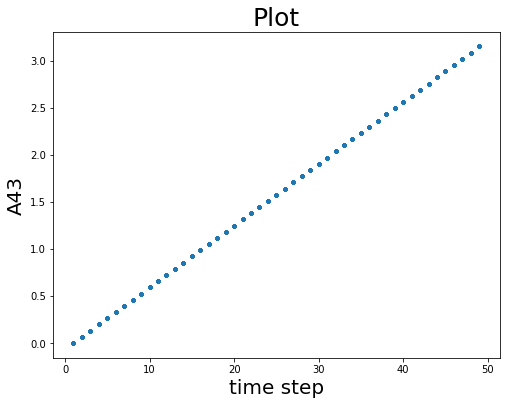

In [ ]:
import matplotlib.pyplot as plt

minA43 = df_merged_in['aggregate_feature_8'].min()

df_plots = df_merged_in['aggregate_feature_8']-minA43

print(df_plots)

fig = plt.figure(figsize=(8, 6))
plt.scatter(df_merged_in['time step'],df_plots,marker='.')
plt.plot(df_merged_in['time step'],df_plots, marker='.', linestyle = 'None')

#plt.loglog(basex=10,basey=10)
plt.xlabel("time step",fontsize=20)
plt.ylabel("A43",fontsize=20)
plt.title("Plot",fontsize=25)
plt.show()
plt.show()

Tagliamo il dataset df_translated in modo da avere solo le transazioni di df_merged_in

In [ ]:
txId_mergIn = df_merged_in['txId'].values
print(df_merged_in.shape)
df_merged_in_translated = df_translated[df_translated['txId'].isin(txId_mergIn)]
print(df_merged_in_translated.shape)

(148447, 168)
(148447, 168)


In [ ]:
df_merged_in.head(2)

,txId,in_degree,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
74223,121591288,1,6,-0.172750,-0.132206,1.018602,-0.12197,-0.043875,-0.113002,-0.061584,-0.163406,-0.169224,-0.049707,-0.165710,-0.028741,-0.035391,-0.042955,-0.013282,-0.057310,-0.170918,-0.172648,-0.175989,-1.373657,-1.37146,-0.139732,-0.148912,-0.080147,-0.155662,-0.010763,-0.012107,-0.139734,-0.148908,-0.080147,-0.155662,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.414031,-0.488362,-0.232553,-0.467579,0.048767,0.052956,-0.039151,-0.172895,-0.163126,-0.160933,0.923473,0.923011,-0.039146,-0.172884,-0.163114,-0.160926,0.923516,0.923110,-0.017032,-0.030026,-0.01764,-0.015071,-0.140763,-0.140335,-0.095403,-0.263699,-0.249827,-0.263021,1.133527,1.135947,-0.059013,-0.262013,-0.254746,-0.258833,1.125590,1.128038,-0.293897,-0.580966,-0.4753

In [ ]:
df_merged_in = df_merged_in.sort_values(by='txId', ascending=True)
df_merged_in.head(5)

,txId,in_degree,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
134716,1076,1,48,-0.168500,0.270909,-0.091383,-0.046932,-0.043875,-0.029140,-0.061584,-0.163591,-0.164980,-0.009283,-0.163653,2.459222,2.415325,-0.042955,-0.013282,-0.056177,-0.166629,-0.167811,-0.170957,0.887058,0.884557,-0.139732,-0.148911,-0.080146,-0.155661,2.679386,2.665377,-0.139734,-0.148906,-0.080145,-0.155661,2.679448,2.665308,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.414031,-0.488060,-0.231855,-0.467405,-2.841929,-2.831431,-0.039151,-0.172893,-0.163123,-0.160930,0.923473,0.923011,-0.039146,-0.172882,-0.163112,-0.160923,0.923516,0.923110,-0.017032,-0.030026,-0.017640,-0.015071,-0.140763,-0.140335,-0.095403,-0.264392,-0.250540,-0.263720,1.133527,1.135947,-0.059013,-0.262387,-0.255130,-0.259213,1.125590,1.128038,-0.293682,-0.740730,-0.668631,-0.

In [ ]:
df_merged_in['aggregate_feature_8']


134716    1.591817
87540     0.672513
100717   -1.493861
117264    1.591686
47340     1.591719
            ...   
64616     0.278567
144232    0.278665
56286     0.278665
109415    0.278665
62166     0.278665
Name: aggregate_feature_8, Length: 148447, dtype: float64

In [ ]:
df_merged_in_translated = df_merged_in_translated.sort_values(by='txId', ascending=True)
df_merged_in_translated['aggregate_feature_8']

199861    335755.000006
133793    307528.000005
2945      241010.000004
199340    335751.000006
199081    335752.000006
              ...      
115729    295432.000005
115407    295435.000005
116210    295435.000005
116174    295435.000005
115353    295435.000005
Name: aggregate_feature_8, Length: 148447, dtype: float64

In [ ]:
fin = df_addresses[df_addresses['txId'] == 1076].index
print(fin)
finx = df_addresses.at[198804,'hash']
print(finx)


Int64Index([198804], dtype='int64')
184ebe6e3076b138838b0ad974659984de40027a6ebfafd9b800bf124e1cbee6


https://www.blockchain.com/btc/tx/184ebe6e3076b138838b0ad974659984de40027a6ebfafd9b800bf124e1cbee6

Included in Block
485956

2 blocchi in ingresso, la media è 485936
2 blocchi in output, la media è 485963+485960/2 = 485961

In [ ]:
fin = df_addresses[df_addresses['txId'] == 3181].index
print(fin)
finx = df_addresses.at[133946,'hash']
print(finx)


Int64Index([133946], dtype='int64')
4862642fd5523f72a35e2ead4e176679fa3357af3c5ddbbb1b8c2973535cc68c


https://www.blockchain.com/btc/tx/4862642fd5523f72a35e2ead4e176679fa3357af3c5ddbbb1b8c2973535cc68c

Included in Block
457729

In [ ]:
485956 - 457729

28227

In [ ]:
335755 - 307528

28227

Ok, è il numero di blocco ma vale solo per le transazioni del dataset merged_in

###Correlazione in df_merged_out - time step

In [ ]:
df_merged_out.head() ####df_merged è composto da solo quelle transazioni del dataframe che sono presenti nella edge list. In questo caso solo quelle che hanno in_degree

,txId,out_degree,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
140591,163867957,1,29,-0.170667,-0.134326,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.161275,-0.167123,-0.049707,-0.163581,-0.028741,-0.035391,-0.0632,-0.013282,-0.023932,-0.168770,-0.172908,-0.170782,-0.2433,-0.243452,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.413986,-0.488325,-0.232553,-0.467536,0.048767,0.052956,-0.039042,-0.172879,-0.163126,-0.160901,-0.196435,-0.196189,-0.039037,-0.172868,-0.163115,-0.160894,-0.196409,-0.196133,-0.017032,-0.030026,-0.01764,-0.015071,-0.140763,-0.140335,-0.092863,-0.264147,-0.250574,-0.263193,-0.169119,-0.167165,-0.058402,-0.262377,-0.255168,-0.259156,-0.187191,-0.185274,-0.293772,-0.76193

Calcolando la correlazione tra il time step e tutte le features di df_merged_out otteniamo una corrispondenza con la aggregate 43

In [ ]:
#Cerchiamo una correlazione tra il time step e le altre features...quindi verifichiamo quale feature ha maggiore correlazione con esso

from scipy.stats import pearsonr
correlations_list = []

for column in df_merged_out.columns[1:]:
  df_plot = df_merged_out[column]
  corr, _ = pearsonr(df_plot, df_merged_out['time step'])
  correlations_list.append(corr)
  
print(correlations_list)

corr_df = pd.DataFrame(correlations_list, columns = ['values_corr'])
print(corr_df.head())
print("---------------------------------")

#corr_df.loc[corr_df['values_corr'].idxmax()]
corr_df = corr_df.sort_values(by='values_corr', ascending=False)
lista = range(93, 165)
print(corr_df['values_corr'])
corr_df.drop(lista)

[-0.002252966878630782, 0.999999999999974, -0.02699000073179751, 0.16586867833644947, 0.572927397563777, -0.0028136701852472237, 0.0016391488546297983, 0.0025704554427366166, -0.012131111595348607, -0.02776207942916561, -0.026462301369709146, 0.004456870302947488, -0.027608510062022477, 0.01230853019786089, 0.014992936218066955, 0.0010945853950500828, 0.004576763125335562, -0.0006978096901340423, -0.027459779060500625, -0.03746622545742104, -0.03929745090890406, 0.03043716468963375, 0.03279615340370471, 0.00695877180328482, -0.023570997231624147, -0.04386263680520394, -0.013860042606488003, -0.002354603813804928, 1.6410575924517834e-05, 0.0069390942666831875, -0.023589416477619914, -0.04386280105393688, -0.01387957407316144, -0.0022707548273207204, 0.00010807504229046888, 0.024962461630845974, 0.031354073952660655, 0.0178733057198144, 0.025610049235416432, -0.007522537803384391, -0.007256606054748315, 0.08450359930824378, 0.07007031598810656, -0.03399048932867796, 0.07661497422171654, 

,values_corr
1,1.000000
4,0.572927
3,0.165869
41,0.084504
47,0.082922
50,0.078563
44,0.076615
48,0.074503
42,0.070070
84,0.064499


In [ ]:
print(corr_df.head(10).index)
print('--------------------')
print(df_merged_out.columns[corr_df.head(4).index+1])
print('--------------------')
print(corr_df.iloc[0].values, df_merged_out.columns[1+1])
print(corr_df.iloc[1].values, df_merged_out.columns[137+1])
print(corr_df.iloc[2].values, df_merged_out.columns[102+1])
print(corr_df.iloc[3].values, df_merged_out.columns[104+1])
print(corr_df.iloc[4].values, df_merged_out.columns[101+1])


Int64Index([1, 137, 102, 104, 101, 140, 138, 152, 116, 4], dtype='int64')
--------------------
Index(['time step', 'aggregate_feature_43', 'aggregate_feature_8',
       'aggregate_feature_10'],
      dtype='object')
--------------------
[1.] time step
[0.99999999] aggregate_feature_43
[0.9932389] aggregate_feature_8
[0.99109595] aggregate_feature_10
[0.97960135] aggregate_feature_7


140591    1.691241
81108     0.543666
81110     1.087211
143319    1.087211
124170    0.423117
            ...   
8         1.449605
3         1.993061
0         1.268363
7         0.543785
1         0.000150
Name: aggregate_feature_43, Length: 166345, dtype: float64


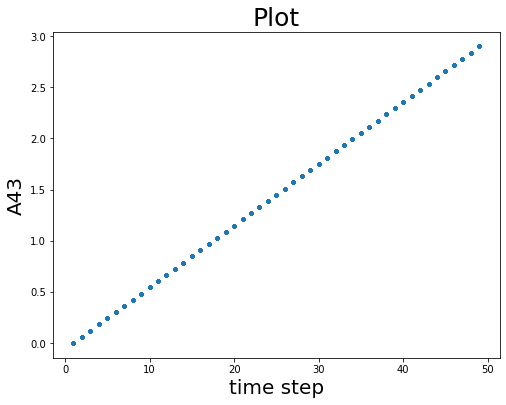

In [ ]:
import matplotlib.pyplot as plt

minA43 = df_merged_out['aggregate_feature_43'].min()

df_plots = df_merged_out['aggregate_feature_43']-minA43

print(df_plots)

fig = plt.figure(figsize=(8, 6))
plt.scatter(df_merged_out['time step'],df_plots,marker='.')
plt.plot(df_merged_out['time step'],df_plots, marker='.', linestyle = 'None')

#plt.loglog(basex=10,basey=10)
plt.xlabel("time step",fontsize=20)
plt.ylabel("A43",fontsize=20)
plt.title("Plot",fontsize=25)
plt.show()
plt.show()

Tagliamo il dataset df_translated in modo da avere solo le transazioni di df_merged_out

In [ ]:
txId_mergOut = df_merged_out['txId'].values
print(df_merged_out.shape)
df_merged_out_translated = df_translated[df_translated['txId'].isin(txId_mergOut)]
print(df_merged_out_translated.shape)

(166345, 168)
(166345, 168)


In [ ]:
df_merged_out.head(2)

,txId,out_degree,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
140591,163867957,1,29,-0.170667,-0.134326,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.161275,-0.167123,-0.049707,-0.163581,-0.028741,-0.035391,-0.0632,-0.013282,-0.023932,-0.168770,-0.172908,-0.170782,-0.2433,-0.243452,-0.139731,-0.148912,-0.080147,-0.155661,-0.010763,-0.012107,-0.139733,-0.148907,-0.080147,-0.155661,-0.010669,-0.012005,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.413986,-0.488325,-0.232553,-0.467536,0.048767,0.052956,-0.039042,-0.172879,-0.163126,-0.160901,-0.196435,-0.196189,-0.039037,-0.172868,-0.163115,-0.160894,-0.196409,-0.196133,-0.017032,-0.030026,-0.01764,-0.015071,-0.140763,-0.140335,-0.092863,-0.264147,-0.250574,-0.263193,-0.169119,-0.167165,-0.058402,-0.262377,-0.255168,-0.259156,-0.187191,-0.185274,-0.293772,-0.76193

In [ ]:
df_merged_out = df_merged_out.sort_values(by='txId', ascending=True)
df_merged_out.head(5)

,txId,out_degree,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
43713,1076,1,48,-0.168500,0.270909,-0.091383,-0.046932,-0.043875,-0.029140,-0.061584,-0.163591,-0.164980,-0.009283,-0.163653,2.459222,2.415325,-0.042955,-0.013282,-0.056177,-0.166629,-0.167811,-0.170957,0.887058,0.884557,-0.139732,-0.148911,-0.080146,-0.155661,2.679386,2.665377,-0.139734,-0.148906,-0.080145,-0.155661,2.679448,2.665308,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239368,-0.075256,-0.234952,0.037468,0.043444,-0.227203,-0.243236,-0.097895,-0.235896,0.036577,0.042345,-0.414031,-0.488060,-0.231855,-0.467405,-2.841929,-2.831431,-0.039151,-0.172893,-0.163123,-0.160930,0.923473,0.923011,-0.039146,-0.172882,-0.163112,-0.160923,0.923516,0.923110,-0.017032,-0.030026,-0.017640,-0.015071,-0.140763,-0.140335,-0.095403,-0.264392,-0.250540,-0.263720,1.133527,1.135947,-0.059013,-0.262387,-0.255130,-0.259213,1.125590,1.128038,-0.293682,-0.740730,-0.668631,-0.

In [ ]:
df_merged_out['aggregate_feature_43']

43713     1.464704
5984     -1.071992
3         0.619009
20        1.464524
47        1.464465
            ...   
22308     0.256675
123454    0.256705
30617     0.256675
82106     0.256705
28620     0.256705
Name: aggregate_feature_43, Length: 166345, dtype: float64

In [ ]:
df_merged_out_translated = df_merged_out_translated.sort_values(by='txId', ascending=True)
df_merged_out_translated['aggregate_feature_43']

199861    485961.000017
31635     401284.000014
133793    457731.000016
198375    485955.000017
199340    485953.000017
              ...      
115729    445636.000015
116522    445637.000015
115322    445636.000015
115385    445637.000015
115353    445637.000015
Name: aggregate_feature_43, Length: 166345, dtype: float64

In [ ]:
df_merged_out_translated.head(15)

,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
199861,1076,3,48,7.107188e+07,1.860010e+05,4.0,2.0,2.0,2.0,1.0,8.542834e+05,7.040269e+07,3.625237e+11,2.493892e+09,4.481917e+16,1.412741e+18,2.0,1.0,1.342283e+06,6.972945e+07,4.658935e+09,1.274754e+14,4.072542e+16,1.625631e+17,8.557159e+05,7.057189e+07,6.267374e+10,1.832741e+10,9.692284e+16,7.717324e+17,8.558457e+05,7.057659e+07,5.697608e+09,1.702013e+10,9.692166e+16,7.716829e+17,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.260654e+17,3.151392e+16,1.000000,1.000000,1.000000e+00,1.000000e+00,1.364835e+17,1.358713e+17,1.000000,1.000000,1.000000e+00,1.000000e+00,1.370989e+17,2.729349e+17,1.250000e+02,1.069600e+04,1.250483e+08,2.139314e+12,0.000000e+00,0.000000e+00,1.342491e+06,1.658874e+08,4.403061e+09,7.528243e+08,5.379857e+16,1.612937e+17,1.342512e+06,1.659017e+08,4.603246e+09,7.528636e+08,2.689970e+16,1.612999e+17,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.648434e+17,1.319363e+17,1

In [ ]:
fin = df_addresses[df_addresses['txId'] == 1076].index
print(fin)
finx = df_addresses.at[198804,'hash']
print(finx)


Int64Index([198804], dtype='int64')
184ebe6e3076b138838b0ad974659984de40027a6ebfafd9b800bf124e1cbee6


https://www.blockchain.com/btc/tx/184ebe6e3076b138838b0ad974659984de40027a6ebfafd9b800bf124e1cbee6

Included in Block
485956

In [ ]:
fin = df_addresses[df_addresses['txId'] == 2534].index
print(fin)
finx = df_addresses.at[31662,'hash']
print(finx)


Int64Index([31662], dtype='int64')
399d1ccee79ad4b28771d96f8d63887539da56d36a97a41f5af39f362c3a952c


https://www.blockchain.com/btc/tx/399d1ccee79ad4b28771d96f8d63887539da56d36a97a41f5af39f362c3a952c

Included in Block
401280

Ok, crediamo che sia la media dei blocchi di output presenti nel dataset

In [ ]:
#Cerchiamo una correlazione tra il time step e le altre features...quindi verifichiamo quale feature ha maggiore correlazione con esso

from scipy.stats import pearsonr
correlations_list = []

for column in df_class_feature.columns[1:]:
  df_plot = df_class_feature[column]
  corr, _ = pearsonr(df_plot, df_class_feature['time step'])
  correlations_list.append(corr)
  
print(correlations_list)

corr_df = pd.DataFrame(correlations_list, columns = ['values_corr'])
print(corr_df.head())
print("---------------------------------")

#corr_df.loc[corr_df['values_corr'].idxmax()]
corr_df = corr_df.sort_values(by='values_corr', ascending=False)
lista = range(93, 165)
print(corr_df['values_corr'])
corr_df.drop(lista)

[-0.02734949690623785, 0.9999999999999957, -0.026173398560892427, 0.15512410261158896, 0.5731546594253202, -0.0017163775585868077, 0.0008021766631153985, 0.0032631518102726135, -0.015631403542158057, -0.026855809488657786, -0.025788538827095656, 0.000831302336456557, -0.02690167344707189, 0.017825713017434387, 0.019232431970464918, 0.00026250027328812275, 0.004470217806438562, -0.00024370050147543574, -0.02664858976861414, -0.0360970090986959, -0.03757072538025754, 0.03154616500274626, 0.03347833933703677, -0.0038895724192452765, -0.033907132638518876, -0.047087519513491605, -0.025635923312200173, 0.007887850371191166, 0.009753342142835991, -0.003907797657840054, -0.03392318899397454, -0.0470877836402097, -0.025653508778946954, 0.007922268374968186, 0.009799839672421099, 0.022839589621332052, 0.028849579946036853, 0.015055598966747394, 0.023341885056536296, -0.004973544998319547, -0.0045943990535004305, 0.07385099149645641, 0.05872735279844287, -0.0372644902246638, 0.06564277775919408,

,values_corr
1,1.000000
4,0.573155
3,0.155124
41,0.073851
47,0.072164
50,0.067260
44,0.065643
48,0.062568
42,0.058727
84,0.051696


In [ ]:
print(corr_df.head(10).index)
print('--------------------')
print(df_class_feature.columns[corr_df.head(4).index+1])
print('--------------------')
print(corr_df.iloc[0].values, df_class_feature.columns[1+1])
print(corr_df.iloc[1].values, df_class_feature.columns[102+1])
print(corr_df.iloc[2].values, df_class_feature.columns[104+1])
print(corr_df.iloc[3].values, df_class_feature.columns[101+1])
print(corr_df.iloc[4].values, df_class_feature.columns[137+1])


Int64Index([1, 102, 104, 101, 137, 140, 138, 116, 4, 152], dtype='int64')
--------------------
Index(['time step', 'aggregate_feature_8', 'aggregate_feature_10',
       'aggregate_feature_7'],
      dtype='object')
--------------------
[1.] time step
[0.99444809] aggregate_feature_8
[0.99257882] aggregate_feature_10
[0.98242997] aggregate_feature_7
[0.91185909] aggregate_feature_43


### Considerazioni finali

Le features ottenute sono:
- local_feature_3: total_out_value_V3
- local_feature_4: fee_V4
- local_feature_6: input_count_V6
- local_feature_7: output_count_V7
- local_feature_8: input_unique_count_V8
- local_feature_16: output_unique_count_V16


In aggiunta in questa sezione abbiamo trovato una correlazione tra le aggregate_feature_8 e la aggregate_feature_43 con il time step. Probabilmente sono legate al numero di blocco su cui è stata registrata la transazione.

## **6.2. Correlazione con il dataset scaricato**

Ricordiamo che il dataset caricato inizialmente (df_real_transactions) è il dataset df_class_feature_illecite_complete ma preso da blockchain.com

Per comodità valutiamo anche il dataset tradotto df_translated_illecite_complete.

###Pulizia dataframe

In [ ]:
print(df_class_feature_illecite_complete.columns)
df_class_feature_illecite_complete.head()

Index(['txId', 'class', 'time step', 'local_feature_3', 'local_feature_4',
       'local_feature_5', 'local_feature_6', 'local_feature_7',
       'local_feature_8', 'local_feature_9',
       ...
       'aggregate_feature_63', 'aggregate_feature_64', 'aggregate_feature_65',
       'aggregate_feature_66', 'aggregate_feature_67', 'aggregate_feature_68',
       'aggregate_feature_69', 'aggregate_feature_70', 'aggregate_feature_71',
       'aggregate_feature_72'],
      dtype='object', length=168)


,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
120304,52635,3,29,-0.172544,-0.068081,0.463609,-0.046932,-0.024025,-0.029140,-0.061584,-0.163549,-0.169110,-0.047383,-0.165724,2.459222,2.415325,-0.022711,-0.013282,-0.057113,-0.170811,-0.172635,-0.175918,-1.083287,-0.807456,-0.139732,-0.148912,-0.080147,-0.155662,2.679386,2.665377,-0.139734,-0.148907,-0.080146,-0.155662,2.679448,2.665308,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239351,-0.075196,-0.234942,3.825646,3.814631,-0.227203,-0.243217,-0.097797,-0.235887,3.841835,3.830078,-0.378326,-0.447179,-0.205985,-0.426692,2.939462,2.937343,-0.039151,-0.168683,-0.159463,-0.158133,-0.196489,-0.755789,-0.039146,-0.168671,-0.159452,-0.158126,-0.196463,-0.755754,-0.017032,-0.029886,-0.017519,-0.014973,-0.140763,-0.140335,-0.095403,1.783927,1.469766,1.113958,-0.169123,-0.818721,-0.059013,-0.240567,-0.236837,-0.244406,-0.187676,-0.841929,-0.268272,0.175408,0.213710,-0.

In [ ]:
df_real_transactions_complete.head()

,Unnamed: 0,hash,ver,vin_sz,vout_sz,size,weight,fee,relayed_by,lock_time,tx_index,double_spend,time,block_index,block_height,inputs,out,txId
0,0,bb5ffca6642f655477a200cd4770d5e54dc8a768a235f0...,1,2,3,697,2788,55040,0.0.0.0,0,940927903180696,False,1484139449,447650,447650,"[{'sequence': 4294967295, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 5239100, ...",52635
1,1,725b645fd64e65a38e75054f5c7135066e2e20cf8c5392...,1,1,16,843,3372,58157,0.0.0.0,0,2297589237589681,False,1484142477,447653,447653,"[{'sequence': 4294967295, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 7538548, ...",84810
2,2,54a32a044045fd4180eec9dcd77d3c4336066ce6df14bf...,1,1,1155,39285,157140,200000,0.0.0.0,0,7794375663073681,False,1460680166,407341,407341,"[{'sequence': 4294967295, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 144757, '...",148681
3,3,ac806d85080063bde7934ade161f25f9bc4bce6525c89f...,1,2,2,372,1488,40000,0.0.0.0,447653,4811404393102913,False,1484143412,447654,447654,"[{'sequence': 4294967294, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 432423, '...",163032
4,4,2d1ecf6c8466240e7c9cf70a41d458dcb4da2c17d51c10...,1,1,1406,47719,190876,980000,0.0.0.0,0,7863655947754733,False,1473709565,429507,429507,"[{'sequence': 4294967295, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 10932, 's...",189229


In [ ]:
df_translated_illecite_complete.head()

,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
120304,52635,3,29,6.946786e+06,55041.000004,5.0,2.0,3.0,2.0,1.0,1.502408e+06,5.498636e+06,2.083722e+10,2.449841e+08,4.481917e+16,1.412741e+18,3.0,1.0,315901.008957,5.238504e+06,2.493611e+08,8.305193e+12,5.230843e+15,4.064078e+16,1.504937e+06,1.352441e+07,1.081146e+10,3.855881e+09,9.692284e+16,7.717324e+17,1.505165e+06,1.352531e+07,9.828594e+08,3.580844e+09,9.692166e+16,7.716829e+17,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.260654e+17,3.151392e+16,1.0,3.0,2.682750e+11,3.336456e+11,2.729670e+17,2.717426e+17,1.0,3.0,4.419162e+11,1.410609e+11,2.741978e+17,5.458698e+17,1.040543e+06,1.442993e+06,4.760732e+09,4.910860e+14,1.041483e+17,8.313680e+17,1.392583e+06,2.626027e+11,5.737419e+12,7.881510e+11,2.689798e+16,4.032341e+16,1.392605e+06,2.626155e+11,5.998091e+12,7.881570e+11,1.344920e+16,4.032497e+16,1.0,7.811619e+06,1.530878e+09,5.618994e+13,1.648434e+17,1.319363e+17,1.0,251282.000005,3.0990

Porto txId in prima posizione

In [ ]:
col = df_real_transactions_complete.columns.tolist()
print(col)

['Unnamed: 0', 'hash', 'ver', 'vin_sz', 'vout_sz', 'size', 'weight', 'fee', 'relayed_by', 'lock_time', 'tx_index', 'double_spend', 'time', 'block_index', 'block_height', 'inputs', 'out', 'txId']


In [ ]:
df_real_transactions_complete = df_real_transactions_complete[['txId','hash', 'ver', 'vin_sz', 'vout_sz', 'size', 'weight', 'fee', 'relayed_by', 'lock_time', 'tx_index', 'double_spend', 'time', 'block_index', 'block_height', 'inputs', 'out']]

df_real_transactions_complete.index = index_order_complete
df_real_transactions_complete.head()

,txId,hash,ver,vin_sz,vout_sz,size,weight,fee,relayed_by,lock_time,tx_index,double_spend,time,block_index,block_height,inputs,out
120304,52635,bb5ffca6642f655477a200cd4770d5e54dc8a768a235f0...,1,2,3,697,2788,55040,0.0.0.0,0,940927903180696,False,1484139449,447650,447650,"[{'sequence': 4294967295, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 5239100, ..."
116764,84810,725b645fd64e65a38e75054f5c7135066e2e20cf8c5392...,1,1,16,843,3372,58157,0.0.0.0,0,2297589237589681,False,1484142477,447653,447653,"[{'sequence': 4294967295, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 7538548, ..."
48272,148681,54a32a044045fd4180eec9dcd77d3c4336066ce6df14bf...,1,1,1155,39285,157140,200000,0.0.0.0,0,7794375663073681,False,1460680166,407341,407341,"[{'sequence': 4294967295, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 144757, '..."
119597,163032,ac806d85080063bde7934ade161f25f9bc4bce6525c89f...,1,2,2,372,1488,40000,0.0.0.0,447653,4811404393102913,False,1484143412,447654,447654,"[{'sequence': 4294967294, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 432423, '..."
86517,189229,2d1ecf6c8466240e7c9cf70a41d458dcb4da2c17d51c10...,1,1,1406,47719,190876,980000,0.0.0.0,0,7863655947754733,False,1473709565,429507,429507,"[{'sequence': 4294967295, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 10932, 's..."


In [ ]:
#droppiamo la colonna relayed_by perchè è un indirizzo ip e non è utile
print(df_real_transactions_complete.columns)
print('----------------------')
df_real_transactions_complete = df_real_transactions_complete.drop('relayed_by', 1)
print(df_real_transactions_complete.columns)

Index(['txId', 'hash', 'ver', 'vin_sz', 'vout_sz', 'size', 'weight', 'fee',
       'relayed_by', 'lock_time', 'tx_index', 'double_spend', 'time',
       'block_index', 'block_height', 'inputs', 'out'],
      dtype='object')
----------------------
Index(['txId', 'hash', 'ver', 'vin_sz', 'vout_sz', 'size', 'weight', 'fee',
       'lock_time', 'tx_index', 'double_spend', 'time', 'block_index',
       'block_height', 'inputs', 'out'],
      dtype='object')


In [ ]:
#Notiamo che la colonna 'ver' è sempre 1. La colonna 'double spend' sempre 0
print(np.sum(df_real_transactions_complete['ver']==1))
print(np.sum(df_real_transactions_complete['double_spend']==0))


#verifichiamo se esiste una colonna nel dataframe originale che presenta sempre lo stesso valore
for col in df_class_feature.columns:
  
  su = np.sum(df_class_feature[col] == df_class_feature[col][48272])
  if su == len(df_class_feature['txId']):
    print(su, df_class_feature[col])

22019
22019


In [ ]:
#possiamo skipparle entrambe in quanto non esiste una colonna con sempre lo stesso valore

df_real_transactions_complete = df_real_transactions_complete.drop(['ver', 'double_spend'], 1)
print(df_real_transactions_complete.columns)

Index(['txId', 'hash', 'vin_sz', 'vout_sz', 'size', 'weight', 'fee',
       'lock_time', 'tx_index', 'time', 'block_index', 'block_height',
       'inputs', 'out'],
      dtype='object')


In [ ]:
#rendiamo tutto dello stesso tipo

df_class_feature_illecite_complete[df_class_feature_illecite_complete.columns[1:]] = df_class_feature_illecite_complete[df_class_feature_illecite_complete.columns[1:]].astype(np.float64)

df_class_feature_illecite_complete.head()


,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
120304,52635,3.0,29.0,-0.172544,-0.068081,0.463609,-0.046932,-0.024025,-0.029140,-0.061584,-0.163549,-0.169110,-0.047383,-0.165724,2.459222,2.415325,-0.022711,-0.013282,-0.057113,-0.170811,-0.172635,-0.175918,-1.083287,-0.807456,-0.139732,-0.148912,-0.080147,-0.155662,2.679386,2.665377,-0.139734,-0.148907,-0.080146,-0.155662,2.679448,2.665308,-0.024669,-0.031272,-0.023045,-0.026215,0.001428,0.001483,-0.227215,-0.239351,-0.075196,-0.234942,3.825646,3.814631,-0.227203,-0.243217,-0.097797,-0.235887,3.841835,3.830078,-0.378326,-0.447179,-0.205985,-0.426692,2.939462,2.937343,-0.039151,-0.168683,-0.159463,-0.158133,-0.196489,-0.755789,-0.039146,-0.168671,-0.159452,-0.158126,-0.196463,-0.755754,-0.017032,-0.029886,-0.017519,-0.014973,-0.140763,-0.140335,-0.095403,1.783927,1.469766,1.113958,-0.169123,-0.818721,-0.059013,-0.240567,-0.236837,-0.244406,-0.187676,-0.841929,-0.268272,0.175408,0.213710

In [ ]:
df_real_transactions_complete.head()

,txId,hash,vin_sz,vout_sz,size,weight,fee,lock_time,tx_index,time,block_index,block_height,inputs,out
120304,52635,bb5ffca6642f655477a200cd4770d5e54dc8a768a235f0...,2,3,697,2788,55040,0,940927903180696,1484139449,447650,447650,"[{'sequence': 4294967295, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 5239100, ..."
116764,84810,725b645fd64e65a38e75054f5c7135066e2e20cf8c5392...,1,16,843,3372,58157,0,2297589237589681,1484142477,447653,447653,"[{'sequence': 4294967295, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 7538548, ..."
48272,148681,54a32a044045fd4180eec9dcd77d3c4336066ce6df14bf...,1,1155,39285,157140,200000,0,7794375663073681,1460680166,407341,407341,"[{'sequence': 4294967295, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 144757, '..."
119597,163032,ac806d85080063bde7934ade161f25f9bc4bce6525c89f...,2,2,372,1488,40000,447653,4811404393102913,1484143412,447654,447654,"[{'sequence': 4294967294, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 432423, '..."
86517,189229,2d1ecf6c8466240e7c9cf70a41d458dcb4da2c17d51c10...,1,1406,47719,190876,980000,0,7863655947754733,1473709565,429507,429507,"[{'sequence': 4294967295, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 10932, 's..."


In [ ]:
print(df_real_transactions.columns)

df_real_transactions_complete[df_real_transactions_complete.columns[2:-2]] = df_real_transactions_complete[df_real_transactions_complete.columns[2:-2]].astype(np.float64)
df_real_transactions_complete.head()

Index(['hash', 'ver', 'vin_sz', 'vout_sz', 'size', 'weight', 'fee',
       'relayed_by', 'lock_time', 'tx_index', 'double_spend', 'time',
       'block_index', 'block_height', 'inputs', 'out', 'txId'],
      dtype='object')


,txId,hash,vin_sz,vout_sz,size,weight,fee,lock_time,tx_index,time,block_index,block_height,inputs,out
120304,52635,bb5ffca6642f655477a200cd4770d5e54dc8a768a235f0...,2.0,3.0,697.0,2788.0,55040.0,0.0,9.409279e+14,1.484139e+09,447650.0,447650.0,"[{'sequence': 4294967295, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 5239100, ..."
116764,84810,725b645fd64e65a38e75054f5c7135066e2e20cf8c5392...,1.0,16.0,843.0,3372.0,58157.0,0.0,2.297589e+15,1.484142e+09,447653.0,447653.0,"[{'sequence': 4294967295, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 7538548, ..."
48272,148681,54a32a044045fd4180eec9dcd77d3c4336066ce6df14bf...,1.0,1155.0,39285.0,157140.0,200000.0,0.0,7.794376e+15,1.460680e+09,407341.0,407341.0,"[{'sequence': 4294967295, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 144757, '..."
119597,163032,ac806d85080063bde7934ade161f25f9bc4bce6525c89f...,2.0,2.0,372.0,1488.0,40000.0,447653.0,4.811404e+15,1.484143e+09,447654.0,447654.0,"[{'sequence': 4294967294, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 432423, '..."
86517,189229,2d1ecf6c8466240e7c9cf70a41d458dcb4da2c17d51c10...,1.0,1406.0,47719.0,190876.0,980000.0,0.0,7.863656e+15,1.473710e+09,429507.0,429507.0,"[{'sequence': 4294967295, 'witness': '', 'scri...","[{'type': 0, 'spent': True, 'value': 10932, 's..."


In [ ]:
df_translated_illecite_complete[df_translated_illecite_complete.columns[1:]] = df_translated_illecite_complete[df_translated_illecite_complete.columns[1:]].astype(np.float64)
df_translated_illecite_complete.head()


,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
120304,52635,3.0,29.0,6.946786e+06,55041.000004,5.0,2.0,3.0,2.0,1.0,1.502408e+06,5.498636e+06,2.083722e+10,2.449841e+08,4.481917e+16,1.412741e+18,3.0,1.0,315901.008957,5.238504e+06,2.493611e+08,8.305193e+12,5.230843e+15,4.064078e+16,1.504937e+06,1.352441e+07,1.081146e+10,3.855881e+09,9.692284e+16,7.717324e+17,1.505165e+06,1.352531e+07,9.828594e+08,3.580844e+09,9.692166e+16,7.716829e+17,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.260654e+17,3.151392e+16,1.0,3.0,2.682750e+11,3.336456e+11,2.729670e+17,2.717426e+17,1.0,3.0,4.419162e+11,1.410609e+11,2.741978e+17,5.458698e+17,1.040543e+06,1.442993e+06,4.760732e+09,4.910860e+14,1.041483e+17,8.313680e+17,1.392583e+06,2.626027e+11,5.737419e+12,7.881510e+11,2.689798e+16,4.032341e+16,1.392605e+06,2.626155e+11,5.998091e+12,7.881570e+11,1.344920e+16,4.032497e+16,1.0,7.811619e+06,1.530878e+09,5.618994e+13,1.648434e+17,1.319363e+17,1.0,251282.000005,3.

In [ ]:
# Infine controlliamo se block_index e block_height sono la stessa cosa

if df_real_transactions_complete['block_height'].equals(df_real_transactions_complete['block_index']):
  print('sono uguali, droppane una')

sono uguali, droppane una


In [ ]:
#drop di block height
df_real_transactions_complete = df_real_transactions_complete.drop(['block_height'], 1)
print(df_real_transactions_complete.columns)

Index(['txId', 'hash', 'vin_sz', 'vout_sz', 'size', 'weight', 'fee',
       'lock_time', 'tx_index', 'time', 'block_index', 'inputs', 'out'],
      dtype='object')


### Correlazione tra dataset scaricato e elliptic

In [ ]:
from scipy.stats import pearsonr
correlations_list = []

for co in df_real_transactions_complete.columns[2:-2]: #non consideriamo 'txId', 'hash', 'inputs', 'out'
  df_real = df_real_transactions_complete[co]
  correlation = []

  for column in df_class_feature_illecite_complete.columns[1:]: #non consideriamo 'txId'
    df_plot = df_class_feature_illecite_complete[column]
    corr, _ = pearsonr(df_real,df_plot)
    correlation.append(corr)
  correlations_list.append(correlation)
print(correlations_list)
print("---------------------------------")

c = np.array(correlations_list)
c = c.T
print(c.shape)
corr_df = pd.DataFrame(c, columns = df_real_transactions_complete.columns[2:-2])
print(corr_df.head())
print("---------------------------------")

for c in corr_df.columns:
  l_corr_max = [corr_df[c].sort_values(ascending=False)[:3]]
  print(c)
  print(corr_df[c].sort_values(ascending=False)[:6])
  print('---------')
#print('The features with more correlation with this are:')
#print(l_corr_max)


[[-0.013036133612662947, -0.0036201633330618403, 0.0016213884518870147, 0.7928752018083096, 0.13315108017900512, 1.0, 0.0021075619750974936, 0.9877145911994765, 0.14966331156275658, -0.01196825055346669, -0.00930620891445137, 0.02024420317200113, -0.011663522031183395, 0.009790101224656522, 0.008015172453002374, 0.0020982536578283044, 0.0006166662680695993, 0.06547955418286298, -0.0008617207519493173, -0.0036699910094050124, 0.001714657344368581, -0.033574833315553325, -0.033285535000515926, -0.01240491310156054, -0.008394963929630657, -0.0010210256281061208, -0.011754517345865812, 0.0026583926913840918, -0.005888484686921196, -0.012404915391796162, -0.008395568244267309, -0.0010219071874568988, -0.011755481589405635, 0.002659313781119427, -0.005882778522851811, -0.004522250668495942, 0.0001775829271604872, 0.002216262013793233, -9.816905950723286e-05, -0.004284256446378351, -0.006671924958619484, -0.028855205936538973, -0.025478781705941388, 0.0026421157453691223, -0.02813211312161068

###Considerazioni

- vin_sz: è correlato alla 6 e alla 8. Già lo sapevamo.
- vout_sz: alla 7 e alla 16. Già lo sapevamo.
- size: non ha correlazioni.
- fee: correlata con la 4. Già lo sapevamo.
- lock_time: nessuna correlazione.
- tx_index: nessuna correlazione.
- **time: correlazione con Time Step, con la feature 103, 105, 102.**
- **block_index: correlato con Time Step, con la feature 103, 105, 102.** 

### Input e output

### Puliamo i dataset

In [ ]:
inp_df = pd.DataFrame.from_dict(df_real_transactions_complete[['txId','inputs']])

print(inp_df.columns)
print(inp_df['inputs'])
print(inp_df['txId'])



Index(['txId', 'inputs'], dtype='object')
120304    [{'sequence': 4294967295, 'witness': '', 'scri...
116764    [{'sequence': 4294967295, 'witness': '', 'scri...
48272     [{'sequence': 4294967295, 'witness': '', 'scri...
119597    [{'sequence': 4294967294, 'witness': '', 'scri...
86517     [{'sequence': 4294967295, 'witness': '', 'scri...
                                ...                        
115385    [{'sequence': 4294967295, 'witness': '', 'scri...
115407    [{'sequence': 4294967295, 'witness': '', 'scri...
116210    [{'sequence': 4294967295, 'witness': '', 'scri...
116174    [{'sequence': 4294967295, 'witness': '', 'scri...
115353    [{'sequence': 4294967295, 'witness': '', 'scri...
Name: inputs, Length: 22019, dtype: object
120304        52635
116764        84810
48272        148681
119597       163032
86517        189229
            ...    
115385    403203785
115407    403234712
116210    403234715
116174    403235564
115353    403244581
Name: txId, Length: 22019, dtype: i

In [ ]:
out_df = pd.DataFrame.from_dict(df_real_transactions_complete[['txId','out']])


print(out_df.columns)
print(out_df['out'])
print(out_df['txId'])


Index(['txId', 'out'], dtype='object')
120304    [{'type': 0, 'spent': True, 'value': 5239100, ...
116764    [{'type': 0, 'spent': True, 'value': 7538548, ...
48272     [{'type': 0, 'spent': True, 'value': 144757, '...
119597    [{'type': 0, 'spent': True, 'value': 432423, '...
86517     [{'type': 0, 'spent': True, 'value': 10932, 's...
                                ...                        
115385    [{'type': 0, 'spent': True, 'value': 10620, 's...
115407    [{'type': 0, 'spent': False, 'value': 4980000,...
116210    [{'type': 0, 'spent': False, 'value': 4980000,...
116174    [{'type': 0, 'spent': False, 'value': 4980000,...
115353    [{'type': 0, 'spent': True, 'value': 10540000,...
Name: out, Length: 22019, dtype: object
120304        52635
116764        84810
48272        148681
119597       163032
86517        189229
            ...    
115385    403203785
115407    403234712
116210    403234715
116174    403235564
115353    403244581
Name: txId, Length: 22019, dtype: int64


Esaminiamo una transazione, in particolare la prima transazione (riga 48272).

Di seguito il link della transazione parsata

https://blockchain.info/rawtx/54a32a044045fd4180eec9dcd77d3c4336066ce6df14bfbe2e89cc25058c87dd


e il link della transazione non parsata

https://www.blockchain.com/btc/tx/54a32a044045fd4180eec9dcd77d3c4336066ce6df14bfbe2e89cc25058c87dd

In [ ]:
print(df_real_transactions_complete['hash'][48272])

54a32a044045fd4180eec9dcd77d3c4336066ce6df14bfbe2e89cc25058c87dd


**Esempio di transazione di input.
Il seguente è un nostro input (della riga con index 1). Vediamo cosa è utile e cosa no**
```
[
  {'sequence': '4294967295',
   'witness': '', 
   'script': 
'004730440220694f9ae164429b0908026e899a2668598dc0db245a5612b535ee445732913356022014a8ef83deac454a41cb604859b44068779ca7395174096c282f44174b96c56d01473044022003ca7134f8e527506f82b13645c9644bcfe394eb174b4c502c956f5c2661e20602203bcd118159133e4003e90041ffd276b7a9ac598ef609ee1e6da868b160020daf014752210259164aa39670d2b2f5c309cdacd6295b6cf32f0947585ffd3cdb3565398e8ad821025d948f743aa67671322eeb4220925c761c4255dc1cf20d9ae6d2cfa688353bbd52ae',
   'index': '0', 
   'prev_out': 
      {'spent': 'True',
       'script': 'a9149cf64c8195f83c966708428064c51baf09cf721587',
       'spending_outpoints': [{'tx_index': '4149325595560685', 'n': '0'}],
       'tx_index': '860839364700239', 
       'value': '14568225', 
       'addr': '3FzxPcYJxiYwFxaFjTEx7as3tui83MPxbJ', 
       'n': '1', 
       'type': '0'}
       }, 
   {'sequence': '4294967295', 
    'witness': '', 
    'script':   '00483045022100cb6ae6564bf0d4307b3fd67b2e8eac16926921c39892e2ea0e4b08a432aa1e3202201468c583f79cc74a5212cfba21799eaa85250980f53123e0f553a5a2c5bd251001483045022100a3657daa09b3d1ee39610d4621a9a9a5d0d14454a600c9fe0844a748cb631816022047b9ab97e859b4c91eea65e6369f2ea7b6209f5f8108d952092cc78924ec9d99014752210259164aa39670d2b2f5c309cdacd6295b6cf32f0947585ffd3cdb3565398e8ad821025d948f743aa67671322eeb4220925c761c4255dc1cf20d9ae6d2cfa688353bbd52ae', 
    'index': '1', 
    'prev_out': 
        {'spent': 'True', 
         'script': 'a9149cf64c8195f83c966708428064c51baf09cf721587',
         'spending_outpoints': [{'tx_index': '4149325595560685', 'n': '1'}],
         'tx_index': '5107211930004728', 
         'value': '22180000', 
         'addr': '3FzxPcYJxiYwFxaFjTEx7as3tui83MPxbJ', 
         'n': '0', 
         'type': '0'}
  }      
]
```

- Sequence: è l'inizio di ogni row, potrebbe essere rappresentativo della transazione vista globalmente. 
- Witness: è sempre un campo vuoto (possiamo cancellarlo, essendo la signature relativa alla autenticità possiamo al più verificare che non sia differente nelle illecite).
- Script: è una stringa probabilmente non utile nel nostro caso, convertendolo in decimale esce un numero gigantesco. 
- Index: rappresenta l'indice attuale delle transazioni tra i vari inputs, mi rappresenta quindi quale sequence fra le liste delle sequence, stiamo considerando. Ovviamente l'ultimo indice ci dice quante sono le transazioni di input, ma è un dato che abbiamo già nel dataset "vin_sz" (quindi possiamo cancellarlo).
- prev_out: qui ci riferiamo ai vari utxo disponibili per la transazione. 
-- Spent ci indica se è stato effettivamente speso il valore che abbiamo.
-- Script è ancora una stringa non utile (è uguale se i due input sono dello stesso utente, se no diverso).
-- Spending outpoints invece ci fornisce il numero di utxo (n) che stiamo considerando e tx_index è un numero identificativo della transazione considerata (quindi non utile). Nota che n è ripetitivo di index e diverso per ogni utxo presente fra gli input. mentre tx index è ovviamente uguale per ogni input essendo l'indice della intera transazione.
-- Tx_index che non è in spending outpoints invece indica ogni input ricevente (diverso quindi per ogni utxo). **Non utile in quanto è diverso per ogni input**(a meno che non abbiano preso solo il valore del più grande e/ o del più piccolo)
-- Value è il valore ricevuto per ogni input
-- addr l'indirizzo del mittente di quella transazione 
-- n invece ci dice il numero di transazione per chi aveva inviato il denaro
-- type non so

Ricapitolando, teniamo solo le info utili:
Sequence, prev_out composto da solo: spending outpoints che ha il tx index che è uguale per tutti gli utxo. Value è utile, magari il valor medio, moda e mediana, dv standard, di questi e il più grande e più piccolo possono essere utili. O i valori mediati per ogni input stesso di ingresso. Possiamo confrontarli utilizzando addr per ogni ingresso. 

n dubito serva ma può essere utile fare un check 
spent da controllare anche se non vi sono valori binari true e false nel dataset.
witness solo per il check per vedere se 

###Correlazione input - features

In [ ]:
inp_df.head()

,txId,inputs
120304,52635,"[{'sequence': 4294967295, 'witness': '', 'scri..."
116764,84810,"[{'sequence': 4294967295, 'witness': '', 'scri..."
48272,148681,"[{'sequence': 4294967295, 'witness': '', 'scri..."
119597,163032,"[{'sequence': 4294967294, 'witness': '', 'scri..."
86517,189229,"[{'sequence': 4294967295, 'witness': '', 'scri..."


In [ ]:
list_row = []
for i, el in inp_df.inputs.iteritems(): #prima riga del dataframe
  
  d = dict()

  for idx,seq in enumerate(el): # posso avere più input

    if idx == 0: #accedo alla prima sequence
      d['sequence'] = [seq['sequence']]
      prev_out = seq['prev_out']
      d['spent'] = [prev_out['spent']]
      d['tx_index'] = [prev_out['tx_index']]
      d['value'] = [prev_out['value']]
      d['addr'] = [prev_out['addr']]
      d['n'] = [prev_out['n']]
      d['spending_outpoints_tx_index'] = [prev_out['spending_outpoints'][0]['tx_index']]

    else:
      d['sequence'].append(seq['sequence'])
      prev_out = seq['prev_out']
      d['spent'].append(prev_out['spent'])
      d['tx_index'].append(prev_out['tx_index'])
      d['value'].append(prev_out['value'])
      d['addr'].append(prev_out['addr'])
      d['n'].append(prev_out['n'])
      d['spending_outpoints_tx_index'].append(prev_out['spending_outpoints'][0]['tx_index'])
    
  d['txId'] = inp_df.txId[i]
  #d['index_row'] = i
  list_row.append(d)






In [ ]:
list_row[2]

{'addr': ['13pucx6gHP2vyBLc88QfcGivjkhK63PeVg'],
 'n': [0],
 'sequence': [4294967295],
 'spending_outpoints_tx_index': [7794375663073681],
 'spent': [True],
 'txId': 148681,
 'tx_index': [4777118039715349],
 'value': [2488180304]}

In [ ]:
input_dataframe = pd.DataFrame(list_row)
input_dataframe.index = index_order_complete
input_dataframe.head()



,sequence,spent,tx_index,value,addr,n,spending_outpoints_tx_index,txId
120304,"[4294967295, 4294967295]","[True, True]","[108283871788103, 98596847994895]","[1502406, 5500000]","[3Ae8YQRDQtWYZ4EHqehK7mDc62hNFQ71ZM, 3KgGnb5xC...","[0, 0]","[940927903180696, 940927903180696]",52635
116764,[4294967295],[True],[6566110039640514],[220467605],[3L9AAz43W3invNmfLr3vULUjAstLMQVcKs],[4],[2297589237589681],84810
48272,[4294967295],[True],[4777118039715349],[2488180304],[13pucx6gHP2vyBLc88QfcGivjkhK63PeVg],[0],[7794375663073681],148681
119597,"[4294967294, 4294967294]","[True, True]","[1454173879850296, 2685416969734162]","[1384465, 111317]","[1GniCh2VLa1GxdS4vc9DRMvujpzsGoH6rp, 1KxYCTTvB...","[1, 4]","[4811404393102913, 4811404393102913]",163032
86517,[4294967295],[True],[4216825133279221],[36780019],[33uVuTnQyaCTeK8MwZdaxgLNJCECwvxZQE],[785],[7863655947754733],189229


non vi saranno valori spent false, ma controlliamo

In [ ]:
for idx,el in input_dataframe.spent.iteritems():
  for men in el:
    if men != True:
      print(idx)

drop della colonna spent

In [ ]:
input_dataframe = input_dataframe.drop('spent',1)
input_dataframe.columns

Index(['sequence', 'tx_index', 'value', 'addr', 'n',
       'spending_outpoints_tx_index', 'txId'],
      dtype='object')

controlliamo se sequence è sempre composto da un solo valore ripetitivo

In [ ]:
for idx,el in input_dataframe.sequence.iteritems():
  for men in el:
    if men != el[0]:
      print(idx)

ok, accorpiamo i valori presenti all'interno

In [ ]:
for idx,el in input_dataframe.sequence.iteritems():
  input_dataframe.sequence[idx] = el[0]

input_dataframe.head()  

,sequence,tx_index,value,addr,n,spending_outpoints_tx_index,txId
120304,4294967295,"[108283871788103, 98596847994895]","[1502406, 5500000]","[3Ae8YQRDQtWYZ4EHqehK7mDc62hNFQ71ZM, 3KgGnb5xC...","[0, 0]","[940927903180696, 940927903180696]",52635
116764,4294967295,[6566110039640514],[220467605],[3L9AAz43W3invNmfLr3vULUjAstLMQVcKs],[4],[2297589237589681],84810
48272,4294967295,[4777118039715349],[2488180304],[13pucx6gHP2vyBLc88QfcGivjkhK63PeVg],[0],[7794375663073681],148681
119597,4294967294,"[1454173879850296, 2685416969734162]","[1384465, 111317]","[1GniCh2VLa1GxdS4vc9DRMvujpzsGoH6rp, 1KxYCTTvB...","[1, 4]","[4811404393102913, 4811404393102913]",163032
86517,4294967295,[4216825133279221],[36780019],[33uVuTnQyaCTeK8MwZdaxgLNJCECwvxZQE],[785],[7863655947754733],189229


In [ ]:
#controlliamo se spending_outpoints_tx_index è sempre composto da un solo valore ripetitivo

for idx,el in input_dataframe.spending_outpoints_tx_index.iteritems():
  for men in el:
    if men != el[0]:
      print(idx)

In [ ]:
for idx,el in input_dataframe.spending_outpoints_tx_index.iteritems():
  input_dataframe.spending_outpoints_tx_index[idx] = el[0]

input_dataframe.head()

,sequence,tx_index,value,addr,n,spending_outpoints_tx_index,txId
120304,4294967295,"[108283871788103, 98596847994895]","[1502406, 5500000]","[3Ae8YQRDQtWYZ4EHqehK7mDc62hNFQ71ZM, 3KgGnb5xC...","[0, 0]",940927903180696,52635
116764,4294967295,[6566110039640514],[220467605],[3L9AAz43W3invNmfLr3vULUjAstLMQVcKs],[4],2297589237589681,84810
48272,4294967295,[4777118039715349],[2488180304],[13pucx6gHP2vyBLc88QfcGivjkhK63PeVg],[0],7794375663073681,148681
119597,4294967294,"[1454173879850296, 2685416969734162]","[1384465, 111317]","[1GniCh2VLa1GxdS4vc9DRMvujpzsGoH6rp, 1KxYCTTvB...","[1, 4]",4811404393102913,163032
86517,4294967295,[4216825133279221],[36780019],[33uVuTnQyaCTeK8MwZdaxgLNJCECwvxZQE],[785],7863655947754733,189229


In [ ]:
l = input_dataframe.tx_index[109361]
print(len(l))
print([[x,l.count(x)] for x in set(l)])

15
[[6700332535688836, 1], [6632784844814309, 1], [1622943055701478, 1], [2011139206633447, 1], [1962712515468197, 1], [6698865099972807, 1], [4465983696588650, 1], [2957486682540971, 1], [4127463154926129, 1], [2223739094619698, 1], [5546832873664819, 1], [5272293112761171, 1], [7108757076402867, 1], [7123541299794706, 1], [273805098255964, 1]]


In [ ]:
l = input_dataframe.addr[109361]
print(len(l))
print([[x,l.count(x)] for x in set(l)])

15
[['37xoRLyuoDZfuajJaejqwJ9q7toLmEjkop', 1], ['39CVKNRRdie7KPpMNGV5fdNKX3ArKhS1VJ', 1], ['37sCAZsJWgcFWh19MrNcEDDM7qhgY2NcUc', 1], ['3FTcKnWDKwgFhn3igoMcEnJkeJ4Lkccbfu', 1], ['3Ps7qDLvqHwddhwcd5Q4LDqAHdy8YdngVA', 1], ['3LhmqMdoH79ncYjPL2CKKs1zwgQf3Z2pFJ', 1], ['3HrUTrTaAeP7r1mbDW5iDDNKQBckbfE1q4', 1], ['339prHmntDv1RFC4yN47BBjXtVxeWUf8z9', 1], ['3E1RUgX9KK49q16gVmdc2dX2sU73masMzU', 1], ['3QCuRzf782SPmXEfBxJ8LkWpTyNGSLW8ih', 1], ['3H6r4e2fsJBiSCUdPQciTAJL6TFASewxQg', 1], ['3GyJKEowKHHrVqsLtcybhS8VDiinksRh6s', 1], ['3Fp9BzT4VT8fFnHrQoq4PgWn4FAFk4bcaw', 1], ['3JjVcn7xHjg2FgZfoptce4kDEbvEg7R5g2', 1], ['3GsK5dpxMTHQ1jvQUniMR2cKJkFTbay9Zk', 1]]


In [ ]:
from scipy import stats
l = input_dataframe.value[109361]
print(len(l))
tot = [[x,l.count(x)] for x in set(l)]
tot = np.array(tot)
print(np.unique(tot[:,0]))
max = tot[:,0].max()
min = tot[:,0].min()
print(min, max)
print(np.mean(tot[:,0]))
print(np.std(tot[:,0]))
print(np.median(tot[:,0]))
print(np.var(tot[:,0]))
print(np.average(tot[:,0]))

print(stats.mode((tot[:,0])))
print('------------------------------')
min_max = [min,max]
print(np.mean(min_max))
print(np.std(min_max))
print(np.median(min_max))
print(np.var(min_max)) #forse local_feature 22, aggregate feature 5, aggregate_feature_22       
print(np.average(min_max))
print(stats.mode((min_max)))

15
[  4000000   5659592   6732000   9535058   9706817  10784085  12444017
  15347680  17278844  17537174  21691042  28760033  35200000 208048281
 301193700]
4000000 301193700
46927888.2
83624683.46481845
15347680.0
6993087684591079.0
46927888.2
ModeResult(mode=array([4000000]), count=array([1]))
------------------------------
152596850.0
148596850.0
152596850.0
2.20810238299225e+16
152596850.0
ModeResult(mode=array([4000000]), count=array([1]))


### Creiamo nuove features - Input

In [ ]:
from scipy import stats
import statistics as st
input_dataframe_features = input_dataframe[['txId','sequence','spending_outpoints_tx_index']].copy()
input_dataframe_features.head()

input_dataframe_features['min_tx_index'] = [np.min(x) for x in input_dataframe.tx_index.values]
input_dataframe_features['max_tx_index'] = [np.max(x) for x in input_dataframe.tx_index.values]
input_dataframe_features['mean_tx_index'] = [np.mean(x) for x in input_dataframe.tx_index.values]
input_dataframe_features['std_tx_index'] = [np.std(x) for x in input_dataframe.tx_index.values]
input_dataframe_features['median_tx_index'] = [np.median(x) for x in input_dataframe.tx_index.values]
input_dataframe_features['var_tx_index'] = [np.var(x) for x in input_dataframe.tx_index.values]
input_dataframe_features['mode_tx_index'] = [stats.mode(x)[0][0] for x in input_dataframe.tx_index.values]
input_dataframe_features['mode_count_tx_index'] = [stats.mode(x)[1][0] for x in input_dataframe.tx_index.values]

inp_df_ft = input_dataframe_features[['min_tx_index','max_tx_index']].values.tolist()
input_dataframe_features['mean_mM_tx_index'] = [np.mean(x) for x in inp_df_ft]
input_dataframe_features['std_mM_tx_index'] = [np.std(x) for x in inp_df_ft]
input_dataframe_features['var_mM_tx_index'] = [np.var(x) for x in inp_df_ft]

input_dataframe_features['min_value'] = [np.min(x) for x in input_dataframe.value.values]
input_dataframe_features['max_value'] = [np.max(x) for x in input_dataframe.value.values]
input_dataframe_features['mean_value'] = [np.mean(x) for x in input_dataframe.value.values]
input_dataframe_features['std_value'] = [np.std(x) for x in input_dataframe.value.values]
input_dataframe_features['median_value'] = [np.median(x) for x in input_dataframe.value.values]
input_dataframe_features['var_value'] = [np.var(x) for x in input_dataframe.value.values]
input_dataframe_features['mode_value'] = [stats.mode(x)[0][0] for x in input_dataframe.value.values]
input_dataframe_features['mode__count_value'] = [stats.mode(x)[1][0] for x in input_dataframe.value.values]

inp_df_ft = input_dataframe_features[['min_value','max_value']].values.tolist()
input_dataframe_features['mean_mM_value'] = [np.mean(x) for x in inp_df_ft]
input_dataframe_features['std_mM_value'] = [np.std(x) for x in inp_df_ft]
input_dataframe_features['var_mM_value'] = [np.var(x) for x in inp_df_ft]


input_dataframe_features.head(5)

,txId,sequence,spending_outpoints_tx_index,min_tx_index,max_tx_index,mean_tx_index,std_tx_index,median_tx_index,var_tx_index,mode_tx_index,mode_count_tx_index,mean_mM_tx_index,std_mM_tx_index,var_mM_tx_index,min_value,max_value,mean_value,std_value,median_value,var_value,mode_value,mode__count_value,mean_mM_value,std_mM_value,var_mM_value
120304,52635,4294967295,940927903180696,98596847994895,108283871788103,1.034404e+14,4.843512e+12,1.034404e+14,2.345961e+25,98596847994895,1,1.034404e+14,4.843512e+12,2.345961e+25,1502406,5500000,3.501203e+06,1998797.0,3.501203e+06,3.995189e+12,1502406,1,3.501203e+06,1998797.0,3.995189e+12
116764,84810,4294967295,2297589237589681,6566110039640514,6566110039640514,6.566110e+15,0.000000e+00,6.566110e+15,0.000000e+00,6566110039640514,1,6.566110e+15,0.000000e+00,0.000000e+00,220467605,220467605,2.204676e+08,0.0,2.204676e+08,0.000000e+00,220467605,1,2.204676e+08,0.0,0.000000e+00
48272,148681,4294967295,7794375663073681,4777118039715349,4777118039715349,4.777118e+15,0.000000e+00,4.777118e+15,0.000000e+00,4777118039715349,1,4.777118e+15,0.000000e+00,0.000000e+00,2488180304,2488180304,2.488180e+09,0.0,2.488180e+09,0.000000e+00,2488180304,1,2.488180e+09,0.0,0.000000e+00
119597,163032,4294967294,4811404393102913,1454173879850296,2685416969734162,2.069795e+15,6.156215e+14,2.069795e+15,3.789899e+29,1454173879850296,1,2.069795e+15,6.156215e+14,3.789899e+29,111317,1384465,7.478910e+05,636574.0,7.478910e+05,4.052265e+11,111317,1,7.478910e+05,636574.0,4.052265e+11
86517,189229,4294967295,7863655947754733,4216825133279221,4216825133279221,4.216825e+15,0.000000e+00,4.216825e+15,0.000000e+00,4216825133279221,1,4.216825e+15,0.000000e+00,0.000000e+00,36780019,36780019,3.678002e+07,0.0,3.678002e+07,0.000000e+00,36780019,1,3.678002e+07,0.0,0.000000e+00


In [ ]:
from scipy.stats import pearsonr
correlations_list = []

for co in input_dataframe_features.columns[1:]: #non consideriamo 'txId'
  inp = input_dataframe_features[co]
  correlation = []

  for column in df_class_feature_illecite_complete.columns[1:]: #non consideriamo 'txId'
    df_plot = df_class_feature_illecite_complete[column]
    corr, _ = pearsonr(inp,df_plot)
    correlation.append(corr)
  correlations_list.append(correlation)
print(correlations_list)
print("---------------------------------")

c = np.array(correlations_list)
c = c.T
print(c.shape)
corr_df = pd.DataFrame(c, columns = input_dataframe_features.columns[1:])
print(corr_df.head())
print("---------------------------------")

for c in corr_df.columns:
  l_corr_max = [corr_df[c].sort_values(ascending=False)[:3]]
  print(c)
  print(corr_df[c].sort_values(ascending=False)[:8])
  print('---------')
#print('The features with more correlation with this are:')
#print(l_corr_max)


[[-0.0031864858640255167, -0.008792967489109876, 0.0007511266847643235, 0.0007556999258160286, -0.004152936478916706, 0.0007828082521714301, 0.0001974728739753736, 0.0007021062350496829, 0.0005860141886415613, 0.0006952340373789728, 0.0007227057557567942, 0.0004845770396665458, 0.0007040291228121076, 0.00028463461273463584, 0.0003334896902147902, 0.000197187732348627, 0.00013122119121213716, 0.0005614808077235617, 0.000722479948669124, 0.0006777735496155963, 0.0006974313443313448, -0.005342824030771973, -0.005736690389406975, 0.0008384851255674341, 0.0008856496147350357, 0.000395264923576643, 0.0009098284237234038, 0.00011647346414346977, 0.00014137445133090238, 0.0008384806606739838, 0.0008856175208783587, 0.0003952530428463296, 0.0009098064544623371, 0.0001146564715948502, 0.00013951878839193012, 0.0003070661552847687, 0.00019215953486061529, 8.2804649413923e-05, 0.00019739645289714038, -9.482956013633777e-05, -9.497630457613862e-05, 0.001800540138602015, 0.001832790649897757, 0.0003

### Considerazioni

Correlazioni rilevanti:     
- **min_value**: correlato con **local_feature_10** (ulteriore correlazione con la 13 e la 10)
- **max_value**: correlato con **local_feature_11** (ulteriore correlazione con la 3 (è il total output),la 19 e la 13)
- **mean_value**: correlato con **local_feature_13** (ulteriore correlazione con la 10 (è il min_value),la 11 (è il max_value) e la 19
- **std_value**: correlata solo con la **local_feature_12**
- **median_value**: *?




### Correlazione output - features

In [ ]:
out_df.head()

,txId,out
120304,52635,"[{'type': 0, 'spent': True, 'value': 5239100, ..."
116764,84810,"[{'type': 0, 'spent': True, 'value': 7538548, ..."
48272,148681,"[{'type': 0, 'spent': True, 'value': 144757, '..."
119597,163032,"[{'type': 0, 'spent': True, 'value': 432423, '..."
86517,189229,"[{'type': 0, 'spent': True, 'value': 10932, 's..."


In [ ]:
out_df['out'][108968]

[{'addr': '1Dt18mM75hhUPBeWV97xdG9u56DeGzGwfJ',
  'n': 0,
  'script': '76a9148d46d5d02a6b9d1e720858e9af89c0cff422690b88ac',
  'spending_outpoints': [{'n': 45, 'tx_index': 4321953961002000}],
  'spent': True,
  'tx_index': 7828267074673249,
  'type': 0,
  'value': 543673575},
 {'addr': '18a5CvfoVmuVhsyGzTuSG2Qna1eS5HMPfL',
  'n': 1,
  'script': '76a914530a1e2e1d8c2fead41e5f8fcf4ced7412c163b988ac',
  'spending_outpoints': [{'n': 0, 'tx_index': 1492617474424059}],
  'spent': True,
  'tx_index': 7828267074673249,
  'type': 0,
  'value': 289516973},
 {'addr': '1NgvuyFv9Qo4S5cXieg5UPqGnzd884ZyR9',
  'n': 2,
  'script': '76a914ede7de5652c04bb23daea30762fa0a08ce866a4588ac',
  'spending_outpoints': [{'n': 0, 'tx_index': 257046484969355}],
  'spent': True,
  'tx_index': 7828267074673249,
  'type': 0,
  'value': 179973173},
 {'addr': '1FnaiTCqX8YKGHKaVNWSi8U55vp6RnFBF1',
  'n': 3,
  'script': '76a914a2309f737ec866fa695a3f3f173e8f7ceb2815f588ac',
  'spending_outpoints': [{'n': 4, 'tx_index': 78460

In [ ]:
list_row = []
for i, el in out_df.out.iteritems(): #prima riga del dataframe
  
  
  d = dict()


  for idx,out in enumerate(el): # posso avere più input

    
    if idx == 0: #accedo alla prima sequence
      if 'addr' not in out.keys():
        out['addr']= ['no_add']   
      
      d['addr'] = [out['addr']]
      d['spent'] = [out['spent']]
      sp_out = out['spending_outpoints']
      d['tx_index'] = [out['tx_index']]
      d['type'] = [out['type']]
      d['value'] = [out['value']]    
      if len(sp_out) == 0:
        d['spending_outpoints_tx_index'] = [0]
        d['spending_outpoints_n'] = [-1]
      else:
        d['spending_outpoints_tx_index'] = [sp_out[0]['tx_index']]
        d['spending_outpoints_n'] = [sp_out[0]['n']]

    else:
      if 'addr' not in out.keys():
        out['addr']= ['no_add']  
      d['addr'].append(out['addr'])
      d['spent'].append(out['spent'])
      sp_out = out['spending_outpoints']
      d['tx_index'].append(out['tx_index'])
      d['type'].append(out['type'])
      d['value'].append(out['value'])
      if len(sp_out) == 0:
        d['spending_outpoints_tx_index'].append(0)
        d['spending_outpoints_n'].append(-1)
      else:
        d['spending_outpoints_tx_index'].append(sp_out[0]['tx_index'])
        d['spending_outpoints_n'].append(sp_out[0]['n'])

  d['txId'] = out_df.txId[i]
  #d['index_row'] = i
  list_row.append(d)

In [ ]:
out_dataframe = pd.DataFrame(list_row)
out_dataframe.index = index_order_complete
out_dataframe.head()



,addr,spent,tx_index,type,value,spending_outpoints_tx_index,spending_outpoints_n,txId
120304,"[147TAtqz6fB3mbXhGsBof8KPHCVrCuoDYZ, 3JnFBLxDC...","[True, True, True]","[940927903180696, 940927903180696, 94092790318...","[0, 0, 0]","[5239100, 315900, 1392366]","[7026799746998326, 8614013420507908, 836904906...","[344, 9, 0]",52635
116764,"[1k6CgnKLBLioALfetMCi7uwhntnGL3nvw, 15MFenJqAW...","[True, True, True, True, True, True, True, Tru...","[2297589237589681, 2297589237589681, 229758923...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[7538548, 1641447, 1173201, 1865000, 1220729, ...","[6182100141004498, 4582069381453918, 824171561...","[32, 13, 0, 118, 0, 1, 68, 4, 103, 0, 1, 0, 6,...",84810
48272,"[1KanoiBupPiZfkwqB7rfLXAzPnoTshAVmb, 16yLHLoey...","[True, True, True, True, True, True, True, Tru...","[7794375663073681, 7794375663073681, 779437566...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[144757, 1236639, 29165, 253916, 232329, 20738...","[2331849850299923, 6932815886561074, 691247493...","[87, 111, 157, 39, 1, 372, 17, 17, 7, 104, 0, ...",148681
119597,"[1D1EpDaPmHCR9ES7HV5ttGy3aP6aD39hjY, 1MZWetn2c...","[True, True]","[4811404393102913, 4811404393102913]","[0, 0]","[432423, 1023359]","[7666013781332593, 5123098128838067]","[26, 2]",163032
86517,"[1KsVtUWZ7SUSAGX23K5AJ28xSrNRggUCj8, 34zdE8yNB...","[True, True, True, True, True, True, True, Fal...","[7863655947754733, 7863655947754733, 786365594...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10932, 11071, 10065, 10214, 13292, 15256, 214...","[811958942484526, 54498196929237, 719976788360...","[3, 9, 1, 2, 5, 174, 65, -1, 3, 2, 80, 9, 0, -...",189229


In [ ]:
for idx,el in out_dataframe.tx_index.iteritems():
  for men in el:
    if men != el[0]:
      print(idx)

ok, accorpiamo i valori presenti all'interno

In [ ]:
for idx,el in out_dataframe.tx_index.iteritems():
  out_dataframe.tx_index[idx] = el[0]

out_dataframe.head()  

,addr,spent,tx_index,type,value,spending_outpoints_tx_index,spending_outpoints_n,txId
120304,"[147TAtqz6fB3mbXhGsBof8KPHCVrCuoDYZ, 3JnFBLxDC...","[True, True, True]",940927903180696,"[0, 0, 0]","[5239100, 315900, 1392366]","[7026799746998326, 8614013420507908, 836904906...","[344, 9, 0]",52635
116764,"[1k6CgnKLBLioALfetMCi7uwhntnGL3nvw, 15MFenJqAW...","[True, True, True, True, True, True, True, Tru...",2297589237589681,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[7538548, 1641447, 1173201, 1865000, 1220729, ...","[6182100141004498, 4582069381453918, 824171561...","[32, 13, 0, 118, 0, 1, 68, 4, 103, 0, 1, 0, 6,...",84810
48272,"[1KanoiBupPiZfkwqB7rfLXAzPnoTshAVmb, 16yLHLoey...","[True, True, True, True, True, True, True, Tru...",7794375663073681,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[144757, 1236639, 29165, 253916, 232329, 20738...","[2331849850299923, 6932815886561074, 691247493...","[87, 111, 157, 39, 1, 372, 17, 17, 7, 104, 0, ...",148681
119597,"[1D1EpDaPmHCR9ES7HV5ttGy3aP6aD39hjY, 1MZWetn2c...","[True, True]",4811404393102913,"[0, 0]","[432423, 1023359]","[7666013781332593, 5123098128838067]","[26, 2]",163032
86517,"[1KsVtUWZ7SUSAGX23K5AJ28xSrNRggUCj8, 34zdE8yNB...","[True, True, True, True, True, True, True, Fal...",7863655947754733,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[10932, 11071, 10065, 10214, 13292, 15256, 214...","[811958942484526, 54498196929237, 719976788360...","[3, 9, 1, 2, 5, 174, 65, -1, 3, 2, 80, 9, 0, -...",189229


In [ ]:
for el in out_dataframe['type']:

  if np.sum(el)!= 0:
    print(np.sum(el))

    #sono tutti 0, type è inutile

Considerazione: non sappiamo se spent indica che l'UTXO dell'input è stato speso durante la transazione stessa, o se attualmente quello rappresenta il flag dell'UTXO per indicare se l'utente possiede ancora o meno quella moneta.

In [ ]:
lista = []
for idx,el in out_dataframe['spent'].iteritems():

  if np.sum(el)!= len(el):
    print('len', len(el), 'spesi',np.sum(el), 'differenza', len(el)-np.sum(el))
    lista.append(idx)

df_no_spent = out_dataframe.loc[lista]

print(out_dataframe.shape)
print(df_no_spent.shape)

#sono tutti 0, type è inutile


len 1155 spesi 1132 differenza 23
len 1406 spesi 1284 differenza 122
len 2546 spesi 2359 differenza 187
len 2438 spesi 2314 differenza 124
len 4902 spesi 4854 differenza 48
len 301 spesi 280 differenza 21
len 2318 spesi 1957 differenza 361
len 1650 spesi 1395 differenza 255
len 13 spesi 12 differenza 1
len 11 spesi 10 differenza 1
len 501 spesi 466 differenza 35
len 210 spesi 196 differenza 14
len 501 spesi 478 differenza 23
len 1119 spesi 987 differenza 132
len 249 spesi 230 differenza 19
len 504 spesi 459 differenza 45
len 251 spesi 250 differenza 1
len 251 spesi 246 differenza 5
len 786 spesi 723 differenza 63
len 67 spesi 65 differenza 2
len 96 spesi 95 differenza 1
len 109 spesi 108 differenza 1
len 500 spesi 474 differenza 26
len 528 spesi 481 differenza 47
len 2000 spesi 1799 differenza 201
len 301 spesi 271 differenza 30
len 251 spesi 250 differenza 1
len 251 spesi 249 differenza 2
len 301 spesi 269 differenza 32
len 16 spesi 15 differenza 1
len 529 spesi 496 differenza 33
len 

In [ ]:
l = out_dataframe.value[109361]
print(len(l))
tot = [[x,l.count(x)] for x in set(l)]
tot = np.array(tot)
print(np.unique(tot[:,0]))
max = tot[:,0].max()
min = tot[:,0].min()
print(min, max)
print(np.mean(tot[:,0]))
print(np.std(tot[:,0]))
print(np.median(tot[:,0]))
print(np.var(tot[:,0]))
print(np.average(tot[:,0]))

print(stats.mode((tot[:,0])))
print('------------------------------')
min_max = [min,max]
print(np.mean(min_max))
print(np.std(min_max))
print(np.median(min_max))
print(np.var(min_max)) #forse local_feature 22, aggregate feature 5, aggregate_feature_22       
print(np.average(min_max))

251
[   970470    973572    976179    977381    977985    980717    983889
    992012    992917    993035    997643    998550   1009052   1012438
   1013017   1013492   1015450   1016403   1016772   1018320   1018397
   1020380   1021298   1024893   1025428   1029028   1029078   1035741
   1035958   1038550   1038789   1040434   1048622   1048725   1049501
   1051339   1058583   1060655   1064416   1069008   1071098   1073589
   1073770   1077435   1079536   1079628   1080188   1081369   1082985
   1083312   1083345   1088689   1090896   1093751   1096015   1098863
   1100275   1100697   1104810   1107278   1107424   1111168   1112810
   1112878   1113836   1114791   1115094   1116722   1122304   1123835
   1123991   1127578   1128630   1132039   1144530   1145056   1151120
   1151677   1155922   1156525   1159899   1165995   1169503   1174483
   1177303   1178677   1182669   1194566   1220360   1223187   1224506
   1226026   1226329   1234503   1235334   1236535   1240816   1247973
  

### Creiamo nuove features - Output

In [ ]:
from scipy import stats
import statistics as st
out_dataframe_features = out_dataframe[['txId','tx_index']].copy()
out_dataframe_features.head()

out_dataframe_features['min_spending_outpoints_tx_index'] = [np.min(x) for x in out_dataframe.spending_outpoints_tx_index.values]
out_dataframe_features['max_spending_outpoints_tx_index'] = [np.max(x) for x in out_dataframe.spending_outpoints_tx_index.values]
out_dataframe_features['mean_spending_outpoints_tx_index'] = [np.mean(x) for x in out_dataframe.spending_outpoints_tx_index.values]
out_dataframe_features['std_spending_outpoints_tx_index'] = [np.std(x) for x in out_dataframe.spending_outpoints_tx_index.values]
out_dataframe_features['median_spending_outpoints_tx_index'] = [np.median(x) for x in out_dataframe.spending_outpoints_tx_index.values]
out_dataframe_features['var_spending_outpoints_tx_index'] = [np.var(x) for x in out_dataframe.spending_outpoints_tx_index.values]
out_dataframe_features['mode_spending_outpoints_tx_index'] = [stats.mode(x)[0][0] for x in out_dataframe.spending_outpoints_tx_index.values]
out_dataframe_features['mode_count_spending_outpoints_tx_index'] = [stats.mode(x)[1][0] for x in out_dataframe.spending_outpoints_tx_index.values]

out_df_ft = out_dataframe_features[['min_spending_outpoints_tx_index','max_spending_outpoints_tx_index']].values.tolist()
out_dataframe_features['mean_mM_spending_outpoints_tx_index'] = [np.mean(x) for x in out_df_ft]
out_dataframe_features['std_mM_spending_outpoints_tx_index'] = [np.std(x) for x in out_df_ft]
out_dataframe_features['var_mM_spending_outpoints_tx_index'] = [np.var(x) for x in out_df_ft]

out_dataframe_features['min_value'] = [np.min(x) for x in out_dataframe.value.values]
out_dataframe_features['max_value'] = [np.max(x) for x in out_dataframe.value.values]
out_dataframe_features['mean_value'] = [np.mean(x) for x in out_dataframe.value.values]
out_dataframe_features['std_value'] = [np.std(x) for x in out_dataframe.value.values]
out_dataframe_features['median_value'] = [np.median(x) for x in out_dataframe.value.values]
out_dataframe_features['var_value'] = [np.var(x) for x in out_dataframe.value.values]
out_dataframe_features['mode_value'] = [stats.mode(x)[0][0] for x in out_dataframe.value.values]
out_dataframe_features['mode_value'] = [stats.mode(x)[1][0] for x in out_dataframe.value.values]

out_df_ft = out_dataframe_features[['min_value','max_value']].values.tolist()
out_dataframe_features['mean_mM_value'] = [np.mean(x) for x in out_df_ft]
out_dataframe_features['std_mM_value'] = [np.std(x) for x in out_df_ft]
out_dataframe_features['var_mM_value'] = [np.var(x) for x in out_df_ft]


out_dataframe_features['spent_true'] = [np.sum(x) for x in out_dataframe.spent.values]
out_dataframe_features['spent_false'] = [len(x)-np.sum(x) for x in out_dataframe.spent.values]

out_dataframe_features.head()

,txId,tx_index,min_spending_outpoints_tx_index,max_spending_outpoints_tx_index,mean_spending_outpoints_tx_index,std_spending_outpoints_tx_index,median_spending_outpoints_tx_index,var_spending_outpoints_tx_index,mode_spending_outpoints_tx_index,mode_count_spending_outpoints_tx_index,mean_mM_spending_outpoints_tx_index,std_mM_spending_outpoints_tx_index,var_mM_spending_outpoints_tx_index,min_value,max_value,mean_value,std_value,median_value,var_value,mode_value,mean_mM_value,std_mM_value,var_mM_value,spent_true,spent_false
120304,52635,940927903180696,7026799746998326,8614013420507908,8.003287e+15,6.976857e+14,8.369049e+15,4.867653e+29,7026799746998326,1,7.820407e+15,7.936068e+14,6.298118e+29,315900,5239100,2.315789e+06,2.113292e+06,1392366.0,4.466004e+12,1,2777500.0,2461600.0,6.059475e+12,3,0
116764,84810,2297589237589681,52433443913507,8722130325513329,4.988543e+15,2.640166e+15,4.519009e+15,6.970478e+30,4455949414684604,2,4.387282e+15,4.334848e+15,1.879091e+31,110000,174400000,1.377559e+07,4.166897e+07,1196965.0,1.736303e+15,1,87255000.0,87145000.0,7.594251e+15,16,0
48272,148681,7794375663073681,0,8980918423687480,4.503982e+15,2.747154e+15,4.650079e+15,7.546855e+30,0,23,4.490459e+15,4.490459e+15,2.016422e+31,13022,131236944,2.154096e+06,8.193671e+06,384318.0,6.713625e+13,17,65624983.0,65611961.0,4.304929e+15,1132,23
119597,163032,4811404393102913,5123098128838067,7666013781332593,6.394556e+15,1.271458e+15,6.394556e+15,1.616605e+30,5123098128838067,1,6.394556e+15,1.271458e+15,1.616605e+30,432423,1023359,7.278910e+05,2.954680e+05,727891.0,8.730134e+10,1,727891.0,295468.0,8.730134e+10,2,0
86517,189229,7863655947754733,0,9000450296850481,4.004820e+15,2.541906e+15,4.197847e+15,6.461288e+30,0,122,4.500225e+15,4.500225e+15,2.025203e+31,10000,13418189,2.546232e+04,3.573901e+05,12547.5,1.277277e+11,3,6714094.5,6704094.5,4.494488e+13,1284,122


In [ ]:
from scipy.stats import pearsonr
correlations_list = []

for co in out_dataframe_features.columns[1:]: #non consideriamo 'txId'
  inp = out_dataframe_features[co]
  correlation = []

  for column in df_class_feature_illecite_complete.columns[1:]: #non consideriamo 'txId'
    df_plot = df_class_feature_illecite_complete[column]
    corr, _ = pearsonr(inp,df_plot)
    correlation.append(corr)
  correlations_list.append(correlation)
print(correlations_list)
print("---------------------------------")

c = np.array(correlations_list)
c = c.T
print(c.shape)
corr_df = pd.DataFrame(c, columns = out_dataframe_features.columns[1:])
print(corr_df.head())
print("---------------------------------")

for c in corr_df.columns:
  l_corr_max = [corr_df[c].sort_values(ascending=False)[:3]]
  print(c)
  print(corr_df[c].sort_values(ascending=False)[:6])
  print('---------')
#print('The features with more correlation with this are:')
#print(l_corr_max)


[[0.001831295562945338, 0.002100156180687895, 0.011044605059691674, 0.012161920220876758, 0.005304963371711641, 0.01299112609390553, 0.011681064747591619, 0.013532466156496427, 0.0011231449999321136, 0.011425169393997348, 0.011073954364805762, -0.0062224555576759055, 0.011339304636076398, -0.00382822258568051, -0.0036587678865138665, 0.01168387348566479, -0.0020737499266675757, -0.01433091121470819, 0.011529722544128743, 0.012326992939360128, 0.01094389984258983, -0.0036658736488387146, -0.0033352804499003266, -0.001885004955359181, -0.004291099294348192, -0.005364802021632762, -0.003349485598207772, -0.002934410723174015, -0.0023128732686962025, -0.0018840537549727233, -0.00428654587551248, -0.00536163510491687, -0.0033446004668108943, -0.0027265144898117977, -0.0020904574288407377, -0.0041371791590774035, -0.010128304973517997, -0.009001980562453608, -0.010165615368550499, 0.01649272767811921, 0.016143427434956316, -0.011463236062037214, -0.007463863755353685, 0.011843560907421509, -

### Considerazioni

Correlazioni rilevanti:     

- **min_value**: correlato con **local_feature_18** 
- **max_value**: correlato con **local_feature_19** 
- **mean_value**: correlato con **local_feature_21**
- **std_value**: correlato con **local_feature_20**



###Considerazioni finali

Le features ottenute fino ad ora sono:

- local_feature_3: total_out_value_V3
- local_feature_4: fee_V4
- local_feature_6: input_count_V6
- local_feature_7: output_count_V7
- local_feature_8: input_unique_count_V8
- local_feature_16: output_unique_count_V16

- aggregate_feature_8 e la aggregate_feature_43 con il time step. Probabilmente sono legate al numero di blocco su cui è stata registrata la transazione.

- time: correlazione con Time Step, con la feature 103, 105, 102.
- block_index: correlato con Time Step, con la feature 103, 105, 102.

INPUT

- min_value: correlato con local_feature_10
- max_value: correlato con local_feature_11
- mean_value: correlato con local_feature_13
- std_value: correlata solo con la local_feature_12

OUTPUT

- min_value: correlato con local_feature_18
- max_value: correlato con local_feature_19
- mean_value: correlato con local_feature_21
- std_value: correlato con local_feature_20

###Features 17 e 72

Nota: abbiamo notato che le colonne 17 e 72 presentano un alto numero di valori uguali. Esaminiamoli qua sotto


In [ ]:
#verifichiamo se le colonne 17 e la 72 sono di per sè utili. Come? controllando dove risultano differenti nel dataset completo

print(np.sum(df_class_feature_illecite_complete['local_feature_17'] == df_class_feature_illecite_complete['local_feature_17'][48272]))
print(len(df_class_feature_illecite_complete['local_feature_17']))

df_loc_feat_17 = df_class_feature_illecite_complete[df_class_feature_illecite_complete['local_feature_17'] != df_class_feature_illecite_complete['local_feature_17'][48272]]
df_loc_feat_17.head(6)

22006
22019


,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
120251,70231793,2.0,29.0,0.954655,0.048298,-1.201369,-0.046932,-0.024025,-0.113002,0.242712,-0.099110,0.904484,9.178823,0.410280,-2.516705,-2.486106,-0.042955,0.159894,0.854401,0.477331,0.308749,0.713737,-0.629483,-0.807456,-0.132669,-0.144406,-0.080147,-0.149678,-0.010763,-0.012107,-0.132801,-0.144484,-0.080147,-0.149788,-0.010669,-0.012005,0.154053,0.136162,-0.023045,0.147961,0.001428,0.001483,-0.223809,-0.236161,-0.075256,-0.231618,0.037468,0.043444,-0.225746,-0.241811,-0.097895,-0.234448,0.036577,0.042345,4.359991,3.482175,-0.232553,4.113292,0.048767,0.052956,-0.010941,-0.165908,-0.160659,-0.150773,-1.166303,-1.165444,-0.011453,-0.165897,-0.160581,-0.150868,-1.166292,-1.165425,-0.017032,0.055563,0.056606,0.104046,1.840410,1.841764,-0.075909,-0.261490,-0.249896,-0.258374,0.959005,0.961363,-0.040929,-0.260446,-0.254667,-0.256034,-1.324092,-1.322635,1.712435,2.519217,1.818610,3.618818,0.

In [ ]:
#verifichiamo se le colonne 17 e la 72 sono di per sè utili. Come? controllando dove risultano differenti nel dataset completo

print(np.sum(df_class_feature['local_feature_17'] == df_class_feature['local_feature_17'][48272]))
print(len(df_class_feature['local_feature_17']))

df_loc_feat_17 = df_class_feature[df_class_feature['local_feature_17'] != df_class_feature['local_feature_17'][48272]]
df_loc_feat_17.head(10)

203463
203769


,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
157253,65253,3,40,-0.132250,35.538120,2.128587,4.605393,19.786301,-0.113002,19.109072,-0.163588,-0.150377,-0.018698,-0.165285,-0.003056,-0.113408,20.039742,0.506244,-0.057392,-0.168353,-0.172644,-0.176168,0.178786,0.883399,-0.136453,-0.146820,-0.080147,-0.152883,-0.010763,-0.012107,-0.136549,-0.146876,-0.080147,-0.152963,-0.010669,-0.012005,0.105136,0.090335,-0.023045,0.100288,0.001428,0.001483,-0.132482,-0.150171,-0.075256,-0.142226,0.037468,0.043444,-0.224298,-0.240395,-0.097895,-0.233009,0.036577,0.042345,0.792668,0.515245,-0.232553,0.690299,0.048767,0.052956,-0.039151,-0.171685,-0.163048,-0.160918,-0.062904,0.230406,-0.039146,-0.171674,-0.163037,-0.160911,-0.062921,0.220069,-0.017032,-0.027100,-0.017492,-0.015056,-0.070926,-0.499425,-0.095403,-0.182867,-0.244574,-0.261153,-0.194817,-0.131625,-0.059135,-0.176171,-0.250056,-0.257600,-0.224522,-0.110097,-0.293897,3.225929,0.227648,0.0971

Potrebbe essere il numero massimo di transazioni di uno stesso account (in output?)

In [ ]:
print(np.sum(df_translated['local_feature_17'] == df_translated['local_feature_17'][108968]))
print(len(df_translated['local_feature_17']))
print(df_translated['local_feature_17'][108968])
asd = np.round(df_translated['local_feature_7'] - df_translated['local_feature_16'] + df_translated['local_feature_17'][108968])
print(asd)
df_loc_feat_17_tran = df_translated[np.round(df_translated['local_feature_17']) != asd]
print(df_loc_feat_17_tran.shape)
df_loc_feat_17_tran.head(5)

#solo 300 sono diversi!!!!!!!

203463
203769
1.0
199861    1.0
31635     1.0
133793    1.0
2945      1.0
198375    1.0
         ... 
115385    1.0
115407    1.0
116210    1.0
116174    1.0
115353    1.0
Length: 203769, dtype: float64
(120, 168)


,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
157253,65253,3,40,6.457748e+08,1.381056e+07,8.0,64.0,1001.0,1.0,64.0,9.000015e+05,2.998989e+08,2.780905e+11,7.213101e+08,2.264093e+16,6.838837e+17,994.0,4.0,1.000100e+04,4.313843e+07,2.417665e+08,2.312094e+12,2.796633e+16,1.624797e+17,1.199454e+11,1.200447e+11,1.000000e+00,6.160640e+13,4.846142e+16,3.858662e+17,1.164906e+11,1.165771e+11,1.000000e+00,5.555572e+13,4.846083e+16,3.858414e+17,3.466659e+09,3.466660e+09,1.0,2.651784e+16,1.260654e+17,3.151392e+16,10014.0,10014.0,1.0,3.340793e+15,1.364835e+17,1.358713e+17,296.0,296.0,1.0,4.161296e+13,1.370989e+17,2.729349e+17,3.516215e+07,3.516215e+07,1.000000e+00,1.390570e+16,5.207414e+16,4.156840e+17,1.055164e+04,7.545738e+10,1.220780e+11,4.125977e+09,3.010658e+16,1.113862e+17,1.000061,7.546331e+10,1.276156e+11,4.122504e+09,1.505298e+16,1.106405e+17,1.0,1.631752e+08,1.865761e+09,8.693038e+12,1.698758e+17,1.112362e+17,1.0,10006.0,1.080810e+14,1.8

In [ ]:
#verifichiamo la colonna 72 sono di per sè utili. 

print(np.sum(df_class_feature['local_feature_72'] == df_class_feature['local_feature_72'][108968]))
print(len(df_class_feature['local_feature_72']))

df_loc_feat_17 = df_class_feature[df_class_feature['local_feature_72'] != df_class_feature['local_feature_72'][108968]]
df_loc_feat_17.head(5)

198868
203769


,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
3188,11108,3,1,-0.137586,-0.184668,-1.201369,-0.12197,-0.043875,-0.113002,-0.061584,-0.127429,-0.133751,-0.049707,-0.129773,-0.028741,-0.035391,-0.042955,-0.013282,-0.003952,-0.138560,-0.139821,-0.134358,0.887058,0.884557,-0.139564,-0.148805,-0.080147,-0.155520,-0.010763,-0.012107,-0.139566,-0.148800,-0.080147,-0.155520,-0.010669,-0.012005,-0.024530,-0.031142,-0.023045,-0.026079,0.001428,0.001483,-0.226837,-0.239012,-0.075256,-0.234581,0.037468,0.043444,-0.226829,-0.242870,-0.097895,-0.235524,0.036577,0.042345,-0.288031,-0.383568,-0.232553,-0.346677,0.048767,0.052956,-0.038480,-0.172741,-0.163066,-0.160680,-1.316342,-1.315388,-0.038476,-0.172730,-0.163055,-0.160674,-1.316333,-1.315375,-0.017017,-0.029960,-0.017570,-0.015001,2.146899,2.148396,-0.092415,-0.262615,-0.249047,-0.261598,-1.471764,-1.470277,-0.054370,-0.261799,-0.254890,-0.258254,-1.499972,-1.498585,-0.057942,-0.240245,-0.168005

In [ ]:
print(np.sum(df_translated['local_feature_72'] == df_translated['local_feature_72'][108968]))
print(len(df_translated['local_feature_72']))
print(df_translated['local_feature_72'][108968])
df_loc_feat_72_tran = df_translated[df_translated['local_feature_72'] != df_translated['local_feature_72'][108968]]
df_loc_feat_72_tran.head(5)

198868
203769
1.0


,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
3188,11108,3,1,5.611787e+08,10001.000001,2.0,1.0,2.0,1.0,1.0,5.611887e+08,5.611869e+08,1.000061,3.928222e+10,2.240958e+16,7.063706e+17,2.0,1.0,5.861940e+07,5.025581e+08,3.024349e+10,1.006544e+15,4.072542e+16,1.625631e+17,6.143350e+09,6.148425e+09,1.0,3.155345e+12,4.846142e+16,3.858662e+17,6.140566e+09,6.145115e+09,1.0,2.928504e+12,4.846083e+16,3.858414e+17,3.709594e+06,3.709595e+06,1.0,2.837613e+13,1.260654e+17,3.151392e+16,41.0,41.0,1.0,1.334582e+13,1.364835e+17,1.358713e+17,39.0,39.0,1.0,5.360313e+12,1.370989e+17,2.729349e+17,3.671647e+06,3.671647e+06,1.0,1.452039e+15,5.207414e+16,4.156840e+17,6.133921e+09,9.642396e+09,9.340233e+10,7.110079e+10,0.000000e+00,0.000000e+00,6.130307e+09,9.643118e+09,9.775193e+10,7.108655e+10,2.000000e+00,0.000000e+00,3.677900e+04,3.709596e+06,8.815446e+08,4.042219e+13,3.296869e+17,2.638726e+17,41.0,223.0,2.749110e+13,1.552634e+14,0.000000e+00,0.000000e+00,4

### Altre correlazioni - Local Feature 9 

In [ ]:
df_9 = df_translated.loc[df_translated['local_feature_9'] == 374.00000000000637]

df_9.head()

,txId,class,time step,local_feature_3,local_feature_4,local_feature_5,local_feature_6,local_feature_7,local_feature_8,local_feature_9,local_feature_10,local_feature_11,local_feature_12,local_feature_13,local_feature_14,local_feature_15,local_feature_16,local_feature_17,local_feature_18,local_feature_19,local_feature_20,local_feature_21,local_feature_22,local_feature_23,local_feature_24,local_feature_25,local_feature_26,local_feature_27,local_feature_28,local_feature_29,local_feature_30,local_feature_31,local_feature_32,local_feature_33,local_feature_34,local_feature_35,local_feature_36,local_feature_37,local_feature_38,local_feature_39,local_feature_40,local_feature_41,local_feature_42,local_feature_43,local_feature_44,local_feature_45,local_feature_46,local_feature_47,local_feature_48,local_feature_49,local_feature_50,local_feature_51,local_feature_52,local_feature_53,local_feature_54,local_feature_55,local_feature_56,local_feature_57,local_feature_58,local_feature_59,local_feature_60,local_feature_61,local_feature_62,local_feature_63,local_feature_64,local_feature_65,local_feature_66,local_feature_67,local_feature_68,local_feature_69,local_feature_70,local_feature_71,local_feature_72,local_feature_73,local_feature_74,local_feature_75,local_feature_76,local_feature_77,local_feature_78,local_feature_79,local_feature_80,local_feature_81,local_feature_82,local_feature_83,local_feature_84,local_feature_85,local_feature_86,local_feature_87,local_feature_88,local_feature_89,local_feature_90,local_feature_91,local_feature_92,local_feature_93,local_feature_94,local_feature_95,aggregate_feature_1,aggregate_feature_2,aggregate_feature_3,aggregate_feature_4,aggregate_feature_5,aggregate_feature_6,aggregate_feature_7,aggregate_feature_8,aggregate_feature_9,aggregate_feature_10,aggregate_feature_11,aggregate_feature_12,aggregate_feature_13,aggregate_feature_14,aggregate_feature_15,aggregate_feature_16,aggregate_feature_17,aggregate_feature_18,aggregate_feature_19,aggregate_feature_20,aggregate_feature_21,aggregate_feature_22,aggregate_feature_23,aggregate_feature_24,aggregate_feature_25,aggregate_feature_26,aggregate_feature_27,aggregate_feature_28,aggregate_feature_29,aggregate_feature_30,aggregate_feature_31,aggregate_feature_32,aggregate_feature_33,aggregate_feature_34,aggregate_feature_35,aggregate_feature_36,aggregate_feature_37,aggregate_feature_38,aggregate_feature_39,aggregate_feature_40,aggregate_feature_41,aggregate_feature_42,aggregate_feature_43,aggregate_feature_44,aggregate_feature_45,aggregate_feature_46,aggregate_feature_47,aggregate_feature_48,aggregate_feature_49,aggregate_feature_50,aggregate_feature_51,aggregate_feature_52,aggregate_feature_53,aggregate_feature_54,aggregate_feature_55,aggregate_feature_56,aggregate_feature_57,aggregate_feature_58,aggregate_feature_59,aggregate_feature_60,aggregate_feature_61,aggregate_feature_62,aggregate_feature_63,aggregate_feature_64,aggregate_feature_65,aggregate_feature_66,aggregate_feature_67,aggregate_feature_68,aggregate_feature_69,aggregate_feature_70,aggregate_feature_71,aggregate_feature_72
55121,68390129,3,10,5.016511e+08,990001.000066,3.0,374.0,2.0,1.0,374.0,1.000002e+04,3.062779e+07,2.926737e+10,9.398018e+07,2.315465e+16,7.241974e+17,2.0,1.0,1.650359e+06,4.999997e+08,3.395023e+10,8.997740e+14,0.0,0.0,1.794241e+11,1.795726e+11,1.0,9.215586e+13,4.846142e+16,3.858662e+17,1.794503e+11,1.795835e+11,1.0,8.558196e+13,4.846083e+16,3.858414e+17,1.017690e+06,1.017691e+06,1.0,7.784704e+12,1.260654e+17,3.151392e+16,71128.000001,71128.000001,1.0,2.373121e+16,1.364835e+17,1.358713e+17,304.0,304.0,1.0,4.274144e+13,1.370989e+17,2.729349e+17,9.009719e+07,9.009719e+07,1.0,3.563106e+16,5.207414e+16,4.156840e+17,1.077553e+10,1.796755e+11,4.518824e+12,8.574882e+11,5.379857e+16,1.612937e+17,1.077570e+10,1.796886e+11,4.724244e+12,8.575158e+11,2.689970e+16,1.612999e+17,1.0,1.017691e+06,2.442645e+08,1.098055e+13,3.296869e+17,2.638726e+17,17.0,71128.000001,1.074132e+16,4.215994e+16,1.877310e+17,1.

0.9999999999999999
199861    0.0
31635     0.0
133793    0.0
2945      0.0
198375    0.0
         ... 
115385    0.0
115407    0.0
116210    0.0
116174    0.0
115353    0.0
Name: local_feature_9, Length: 203769, dtype: float64


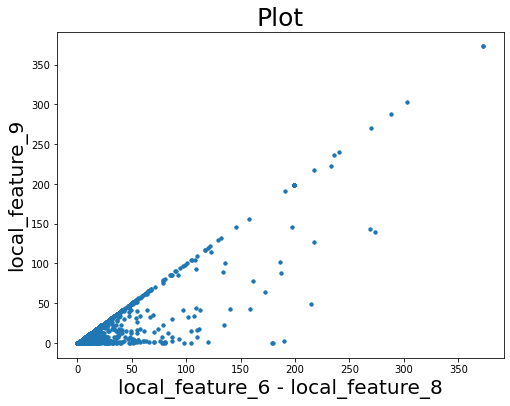

In [ ]:
import matplotlib.pyplot as plt
#axes.set_xlim([min(df_plot),max(df_merged['count'])])
#axes.set_ylim([min(df_plot),max(df_merged['count'])])

minV5 = df_translated['local_feature_9'].min()
print(minV5)
df_plot = df_translated['local_feature_9']-minV5

print(df_plot)
fig = plt.figure(figsize=(8, 6))
plt.scatter(df_translated['local_feature_6']- df_translated['local_feature_6'].min()-df_translated['local_feature_8'] + df_translated['local_feature_8'].min(),df_plot,marker='.')
plt.plot(df_translated['local_feature_6']- df_translated['local_feature_6'].min()-df_translated['local_feature_8'] + df_translated['local_feature_8'].min(),df_plot, marker='.', linestyle = 'None')

#plt.loglog(basex=10,basey=10)
plt.xlabel("local_feature_6 - local_feature_8",fontsize=20)
plt.ylabel("local_feature_9",fontsize=20)
plt.title("Plot",fontsize=25)
plt.show()
plt.show()

### Altre correlazioni - Local Feature 5

199861    3.0
31635     5.0
133793    0.0
2945      1.0
198375    2.0
         ... 
115385    4.0
115407    1.0
116210    1.0
116174    1.0
115353    1.0
Name: local_feature_5, Length: 203769, dtype: float64


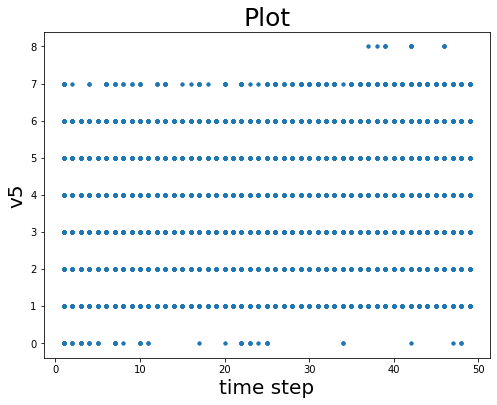

In [ ]:
import matplotlib.pyplot as plt
#axes.set_xlim([min(df_plot),max(df_merged['count'])])
#axes.set_ylim([min(df_plot),max(df_merged['count'])])

minV5 = df_translated['local_feature_5'].min()

df_plot = df_translated['local_feature_5']-minV5

print(df_plot)

fig = plt.figure(figsize=(8, 6))
plt.scatter(df_translated['time step'],df_plot,marker='.')
plt.plot(df_translated['time step'],df_plot, marker='.', linestyle = 'None')

#plt.loglog(basex=10,basey=10)
plt.xlabel("time step",fontsize=20)
plt.ylabel("v5",fontsize=20)
plt.title("Plot",fontsize=25)
plt.show()
plt.show()

###Considerazioni finali

Le features ottenute fino ad ora sono:

- local_feature_3: total_out_value_V3
- local_feature_4: fee_V4
- local_feature_6: input_count_V6
- local_feature_7: output_count_V7
- local_feature_8: input_unique_count_V8
- local_feature_16: output_unique_count_V16

- aggregate_feature_8 e la aggregate_feature_43 con il time step. Probabilmente sono legate al numero di blocco su cui è stata registrata la transazione.

- time: correlazione con Time Step, con la feature 103, 105, 102.
- block_index: correlato con Time Step, con la feature 103, 105, 102.

INPUT

- min_value: correlato con local_feature_10
- max_value: correlato con local_feature_11
- mean_value: correlato con local_feature_13
- std_value: correlata solo con la local_feature_12

OUTPUT

- min_value: correlato con local_feature_18
- max_value: correlato con local_feature_19
- mean_value: correlato con local_feature_21
- std_value: correlato con local_feature_20

----------------------------------------------------------------------
In aggiunta in questa sezione abbiamo trovato la differenza tra input e input unique (local feature 9) e differenza tra output e output unique (local 17).

La feature 5 sembrerebbe una divisione del time step in 9 sottografi. Vedremo meglio nella sezione Graphs.

## **6.3. Correlazione tra illecite features - lecite features**



### Analisi delle distribuzioni delle features 

Prenderemo più time step per avere un campione maggiore, useremo quindi df_class_feature_illecite.
Per ogni feature, troviamo le sue caratteristiche (distribuzione pattern costanti etc) e li confrontiamo

In [ ]:
# separiamo le lecite dalle illecite (drop delle unknown già fatto)
print(df_class_feature_illecite.shape)

df_class_feature_illecite_1 = df_class_feature_illecite[df_class_feature_illecite['class'] != 2]
df_class_feature_illecite_2 = df_class_feature_illecite[df_class_feature_illecite['class'] != 1]

print(df_class_feature_illecite_1.shape)
print(df_class_feature_illecite_2.shape)


In [ ]:
# applichiamo lo stesso al dataset tradotto
print(df_translated_illecite.shape)
df_translated_illecite_1 = df_translated_illecite[df_translated_illecite['class'] != 2]
df_translated_illecite_2 = df_translated_illecite[df_translated_illecite['class'] != 1]

print(df_translated_illecite_1.shape)
print(df_translated_illecite_2.shape)

In [ ]:
print(df_class_feature_illecite.describe())

In [ ]:
print(df_translated_illecite.describe())

In [ ]:
# Non utile, non fornisce informazioni

#import matplotlib.pyplot as plt
#plt.figure(figsize=(50,50))
#df_class_feature_illecite[df_class_feature_illecite.columns[10:20]].boxplot()

In [ ]:
# Questa cella e la prossima sono riassunte insieme nella successiva.
# Possono essere utili per visualizzare la distribuzione di una feature, relativa ad una 
# singola classe.

#fig = plt.figure(figsize = (15,20))
#ax = fig.gca()
#df_class_feature_illecite_1[df_class_feature_illecite_1.columns[1:10]].hist(ax = ax)

In [ ]:
#fig = plt.figure(figsize = (15,20))
#ax = fig.gca()
#df_class_feature_illecite_2[df_class_feature_illecite_2.columns[1:10]].hist(ax = ax)

In [ ]:
for el in df_class_feature_illecite.columns:

  fig = plt.figure(figsize = (20,10))
  plt.title(el)
  ax = fig.gca()
  df_class_feature_illecite.groupby('class')[el].hist(ax = ax,alpha=0.8, range=[df_class_feature_illecite[el].min(), df_class_feature_illecite[el].max()])


In [ ]:
for el in df_translated_illecite.columns:
  fig = plt.figure(figsize = (20,10))
  plt.title(el)
  ax = fig.gca()
  df_translated_illecite.groupby('class')[el].hist(ax = ax,alpha=0.8, range=[df_translated_illecite[el].min(), df_translated_illecite[el].max()])


In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_class_feature_illecite[df_class_feature_illecite.columns[1:96]], alpha=0.2, figsize=(150, 150), diagonal='kde')

###Features selection

La features selection ci permette di identificare quali, fra le features, possono avere maggiore impatto su un possibile addestramento e quali invece sono ripetitive. Per fare ciò abbiamo applicato la correlazione e successivamento abbiamo scremato in base al p-value

In [ ]:
# pearson's correlation feature selection for numeric input and numeric output
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# generate dataset


In [ ]:
#creo X e y

y = df_class_feature_illecite['class']
#X = df_class_feature_illecite.drop(columns='class')

print(y.shape)
    
print(df_class_feature_illecite.shape)
print(type(df_class_feature_illecite['class'][48272]))
df_class_feature_illecite = df_class_feature_illecite.astype('float64')
print(type(df_class_feature_illecite['class'][48272]))

In [ ]:
# define feature selection
fs = SelectKBest(score_func=f_regression, k=10)
# apply feature selection
#print(np.sum(X.isna()))
#X_pippo = np.array(X).astype('float64')
#y_pippo = np.array(y).astype('float64')


#X_selected = fs.fit_transform(X_pippo)#, y_pippo)
#print(X_selected.shape)
#print(X_selected)

In [ ]:
data = df_class_feature_illecite.iloc[:,1:96]
#data = df_class_feature_illecite.copy()
print(data.columns)
print(data.shape)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings

label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')
data['class'].unique()

In [ ]:
corr = data.corr()
print(corr.shape)
corr.head()


In [ ]:
#f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper traingle
#
#mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
#sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [ ]:
import seaborn as sns

# Increase the size of the heatmap.
plt.figure(figsize=(36, 26))


print(corr.shape)
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr, vmin=-1, vmax=1)#, annot=True,cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
col = corr.columns
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
          print(corr.iloc[i,j], col[i],col[j])
          if columns[j]:
            columns[j] = False

selected_columns = data.columns[columns]
print(selected_columns)
data_sec = data[selected_columns] #data_sec è il dataset dopo aver tolto le ridondanti
print(selected_columns.shape)
print(data_sec.shape)
print(data_sec.columns)

In [ ]:
columns = np.full((corr.shape[0],), True, dtype=bool)
col = corr.columns
corr_sorted = corr.sort_values(by = 'class', ascending = False)

corr_sorted.head(96)

indici_corr_classe = corr_sorted.index


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


In [ ]:
print(type(selected_columns))
selected_columns_data = selected_columns[1:].values
np.random.seed(123)
#import statsmodels.formula.api as sm
import statsmodels.regression.linear_model as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = np.max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.05
data_modeled, selected_columns_data_modeled = backwardElimination(data_sec.iloc[:,1:96].values, data_sec.iloc[:,0].values, SL, selected_columns_data)

In [ ]:
result = pd.DataFrame()
result['class'] = data_sec.iloc[:,0]
data_modeled.shape

In [ ]:
result.shape

In [ ]:
data_third = pd.DataFrame(data = data_modeled, columns = selected_columns_data_modeled)
result.index = data_third.index

In [ ]:
data_third.shape

In [ ]:
data_third.head() #data_third è il dataset dopo aver applicato la regressione

In [ ]:
r = (result['class'] == 0.)

In [ ]:
print(result['class']==0.)

In [ ]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data_third.columns:
    plt.subplot(6, 5, j+1)
    j += 1
    sns.distplot(data_third[i][result['class']==0.], color='g', label = 'illecit')
    sns.distplot(data_third[i][result['class']==1.], color='r', label = 'lecit')
    plt.legend(loc='best')
fig.suptitle('Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_third.values, result.values, test_size = 0.2)

In [ ]:
svc = SVC()              # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)

In [ ]:
prediction = svc.predict(x_test)

In [ ]:
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

Test con tutte le 96 features

In [ ]:
data_test = df_class_feature_illecite.iloc[:,2:96]

label_encoder = LabelEncoder()       
result['class'] = label_encoder.fit_transform(df_class_feature_illecite.iloc[:,1]).astype('float64') 

np.random.seed(123)   
x_train, x_test, y_train, y_test = train_test_split(data_test.values, result.values, test_size = 0.2)      
svc = SVC()
svc.fit(x_train, y_train)                        
prediction = svc.predict(x_test)                 
cm = confusion_matrix(y_test, prediction)        
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]                
print(accuracy)

Test con il data_sec, cioè con il dataset dopo aver tolto le ridondanti

In [ ]:
label_encoder = LabelEncoder()       
result['class'] = label_encoder.fit_transform(df_class_feature_illecite.iloc[:,1]).astype('float64')    
print(data_sec.columns)
np.random.seed(123)
x_train, x_test, y_train, y_test = train_test_split(data_sec.iloc[:,1:].values, result.values, test_size = 0.2)      
svc = SVC()
svc.fit(x_train, y_train)                        
prediction = svc.predict(x_test)                 
cm = confusion_matrix(y_test, prediction)        
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]                
print(accuracy)

Analisi del data_sec

In [ ]:
data_sec.index = data_third.index
result.index = data_third.index
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data_sec.columns:
    if j<24:
      plt.subplot(6, 4, j+1)
      j += 1
      sns.distplot(data_sec[i][result['class']==0.], color='g', label = 'illecit')
      sns.distplot(data_sec[i][result['class']==1.], color='r', label = 'lecit')
      plt.legend(loc='best')
    
    if j %24 ==0:
      fig.suptitle('Data Analysis')
      fig.tight_layout()
      fig.subplots_adjust(top=0.95)
      plt.show()
      
      fig = plt.figure(figsize = (20, 25))
      j = j-24
      plt.subplot(6, 4, j+1)
      j += 1
      sns.distplot(data_sec[i][result['class']==0.], color='g', label = 'illecit')
      sns.distplot(data_sec[i][result['class']==1.], color='r', label = 'lecit')
      plt.legend(loc='best')

    

fig.suptitle('Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [ ]:
###Considerazioni finali

Le features ottenute fino ad ora sono:

- local_feature_3: total_out_value_V3
- local_feature_4: fee_V4
- local_feature_6: input_count_V6
- local_feature_7: output_count_V7
- local_feature_8: input_unique_count_V8
- local_feature_16: output_unique_count_V16

- aggregate_feature_8 e la aggregate_feature_43 con il time step. Probabilmente sono legate al numero di blocco su cui è stata registrata la transazione.

- time: correlazione con Time Step, con la feature 103, 105, 102.
- block_index: correlato con Time Step, con la feature 103, 105, 102.

INPUT

- min_value: correlato con local_feature_10
- max_value: correlato con local_feature_11
- mean_value: correlato con local_feature_13
- std_value: correlata solo con la local_feature_12

OUTPUT

- min_value: correlato con local_feature_18
- max_value: correlato con local_feature_19
- mean_value: correlato con local_feature_21
- std_value: correlato con local_feature_20

In [ ]:
#dataset composto dalle sole features che conosciamo

print(df_class_feature_illecite.columns)

l = ['time step', 'local_feature_3', 'local_feature_4',
       'local_feature_6', 'local_feature_7','local_feature_8','local_feature_16',
       'local_feature_10','local_feature_11', 'local_feature_12', 'local_feature_13','local_feature_18', 'local_feature_19', 'local_feature_20','local_feature_21', 'aggregate_feature_8', 'aggregate_feature_43']
data_known = df_class_feature_illecite[l]

label_encoder = LabelEncoder()       
result['class'] = label_encoder.fit_transform(df_class_feature_illecite.iloc[:,1]).astype('float64')    

np.random.seed(123)
x_train, x_test, y_train, y_test = train_test_split(data_known.values, result.values, test_size = 0.20)      
svc = SVC()
svc.fit(x_train, y_train)                        
prediction = svc.predict(x_test)                 
cm = confusion_matrix(y_test, prediction)        
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]                
print(accuracy)

### Considerazioni

La feature selection non ha aiutato moltissimo, ma questo può essere causato dal fatto che i campioni utilizzati (quasi 15000) risultano essere pochi. Inoltre le classi sono poco bilanciate.

Un metodo alternativo e approcciabile in seconda istanza può essere l'utilizzo del graph per trovare le features più rilevanti. Per maggiori informazioni fare riferimento al seguente paper https://arxiv.org/pdf/2102.05373.pdf

#**Usiamo networkx**

In [ ]:
df_class_time1 = df_translated.loc[df_translated['time step'] == 25]
print(df_class_time1.shape)
#non usiamo df_class_time1 ma direttamente tx_translated_time25 perchè così abbiamo i valori corretti 

df_class_time1_v5_1 = tx_translated_time25.loc[np.round(tx_translated_time25['local_feature_5']) == 1]
df_class_time1_v5_2 = tx_translated_time25.loc[np.round(tx_translated_time25['local_feature_5']) == 2]
df_class_time1_v5_3 = tx_translated_time25.loc[np.round(tx_translated_time25['local_feature_5']) == 3]
df_class_time1_v5_4 = tx_translated_time25.loc[np.round(tx_translated_time25['local_feature_5']) == 4]
df_class_time1_v5_5 = tx_translated_time25.loc[np.round(tx_translated_time25['local_feature_5']) == 5]
df_class_time1_v5_6 = tx_translated_time25.loc[np.round(tx_translated_time25['local_feature_5']) == 6]
df_class_time1_v5_7 = tx_translated_time25.loc[np.round(tx_translated_time25['local_feature_5']) == 7]
#df_class_time1_v5_4 = df_class_time1.loc[np.round(df_class_time1['local_feature_5']) == 8] non presente
#df_class_time1_v5_4 = df_class_time1.loc[np.round(df_class_time1['local_feature_5']) == 9] non presente
df_class_time1_v5_1.head(25)

print(df_class_time1_v5_1.shape)

df_class_time1_v5_1_2 = df_class_time1.sort_values(by='local_feature_5')[:473]
print(df_class_time1_v5_1_2.shape)

In [ ]:
df_class_time1_v5_2.head(25)

df_class_2_time1 è composto solo dalla classe 2 e time step 1

al fine di caricare il dataset come grafo è meglio ridurre il tutto e valutare le cose singolarmente


In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

In [ ]:
from networkx.drawing.nx_agraph import graphviz_layout

tx_ids_v5_1 = df_class_time1_v5_1['txId']
#print(tx_ids_v5_1)

#print('----------------------')
tx_edges_v5_1 = df_edges.loc[df_edges['txId1'].isin(tx_ids_v5_1)]
#print(tx_edges_v5_1)
#print('----------------------')

graph = nx.from_pandas_edgelist(tx_edges_v5_1, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
#print(graph.nodes)
colors = []

for n in graph:
    colors.append('blue')
print(len(colors))

#pos = graphviz_layout(graph, prog="dot")

#pos = nx.spring_layout(graph, prog="dot")
#nx.draw(graph, with_labels=False, pos=pos, node_size=100, linewidths=0.25)# node_color=colors, )
#------------------------------------------------------------------------------------------------

tx_ids_v5_2 = df_class_time1_v5_2['txId']
print()
#print(tx_ids_v5_2)

#print('----------------------')
tx_edges_v5_2 = df_edges.loc[df_edges['txId1'].isin(tx_ids_v5_2)]
#print(tx_edges_v5_1)
#print('----------------------')

graph2 = nx.from_pandas_edgelist(tx_edges_v5_2, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
#print(graph.nodes)

G = nx.compose(graph,graph2)

sh = len(G)- len(colors)
if sh > 0:
  for n in range(sh):
      colors.append('green')
  print(len(colors))

#pos = graphviz_layout(graph, prog="dot")

#pos = nx.spring_layout(graph, prog="dot")
#nx.draw(graph, with_labels=False, pos=pos, node_size=100, linewidths=0.25)# node_color=colors, )
#------------------------------------------------------------------------------------------------
tx_ids_v5_3 = df_class_time1_v5_3['txId']
print()
#print(tx_ids_v5_3)

#print('----------------------')
tx_edges_v5_3 = df_edges.loc[df_edges['txId1'].isin(tx_ids_v5_3)]
#print(tx_edges_v5_3)
#print('----------------------')

graph3 = nx.from_pandas_edgelist(tx_edges_v5_3, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
#print(graph.nodes)

H = nx.compose(G,graph3)

sh = len(H)- len(colors)
if sh > 0:
  for n in range(sh):
      colors.append('yellow')
  print(len(colors))

#pos = graphviz_layout(graph, prog="dot")

#pos = nx.spring_layout(graph, prog="dot")
#nx.draw(graph, with_labels=False, pos=pos, node_size=100, linewidths=0.25)# node_color=colors, )

#'lightblue', 'lightgreen', 'lightgreen'
#------------------------------------------------------------------------------------------------

tx_ids_v5_4 = df_class_time1_v5_4['txId']
print()
#print(tx_ids_v5_4)

#print('----------------------')
tx_edges_v5_4 = df_edges.loc[df_edges['txId1'].isin(tx_ids_v5_4)]
#print(tx_edges_v5_4)
#print('----------------------')

graph4 = nx.from_pandas_edgelist(tx_edges_v5_4, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
#print(graph.nodes)


Z = nx.compose(H,graph4)

sh = len(Z)- len(colors)
if sh > 0:
  for n in range(sh):
      colors.append('lightblue')
  print(len(colors))



#pos = graphviz_layout(graph, prog="dot")

#pos = nx.spring_layout(graph, prog="dot")
#nx.draw(graph, with_labels=False, pos=pos, node_size=100, linewidths=0.25)# node_color=colors, )

#'lightblue', 'lightgreen', 'lightgreen'
#------------------------------------------------------------------------------------------------

tx_ids_v5_5 = df_class_time1_v5_5['txId']
print()
#print(tx_ids_v5_5)

#print('----------------------')
tx_edges_v5_5 = df_edges.loc[df_edges['txId1'].isin(tx_ids_v5_5)]
#print(tx_edges_v5_5)
#print('----------------------')

graph5 = nx.from_pandas_edgelist(tx_edges_v5_5, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
#print(graph.nodes)

D = nx.compose(Z,graph5)
sh = len(D)- len(colors)
if sh > 0:
  for n in range(sh):
      colors.append('lightgreen')
  print(len(colors))

#pos = graphviz_layout(graph, prog="dot")

#pos = nx.spring_layout(graph, prog="dot")
#nx.draw(graph, with_labels=False, pos=pos, node_size=100, linewidths=0.25)# node_color=colors, )


#------------------------------------------------------------------------------------------------

tx_ids_v5_6 = df_class_time1_v5_6['txId']
print()
#print(tx_ids_v5_6)

#print('----------------------')
tx_edges_v5_6 = df_edges.loc[df_edges['txId1'].isin(tx_ids_v5_6)]
#print(tx_edges_v5_6)
#print('----------------------')

graph6 = nx.from_pandas_edgelist(tx_edges_v5_6, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
#print(graph.nodes)
L = nx.compose(D,graph6)
sh = len(L)- len(colors)
if sh > 0:
  for n in range(sh):
      colors.append('whitesmoke')
  print(len(colors))

#pos = graphviz_layout(graph, prog="dot")

#pos = nx.spring_layout(graph, prog="dot")
#nx.draw(graph, with_labels=False, pos=pos, node_size=100, linewidths=0.25)# node_color=colors, )


#------------------------------------------------------------------------------------------------
tx_ids_v5_7 = df_class_time1_v5_7['txId']
#print(tx_ids_v5_7)

#print('----------------------')
tx_edges_v5_7 = df_edges.loc[df_edges['txId1'].isin(tx_ids_v5_7)]
#print(tx_edges_v5_7)
#print('----------------------')

graph7 = nx.from_pandas_edgelist(tx_edges_v5_7, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
print(graph7.nodes)







F = nx.compose(L,graph7)


sh = len(F)- len(colors)
if sh > 0:
  for n in range(sh):
      colors.append('red')
  print(len(colors))

pos = graphviz_layout(F, prog="dot")
plt.figure(figsize=(122,122)) 
#pos = nx.spring_layout(graph, prog="dot")
nx.draw(F, with_labels=True, pos=pos, node_size=150, linewidths=0.20, node_color=colors)




In [ ]:
tx_ids_v5_test = df_class_time1_v5_7['txId']
#print(tx_ids_v5_7)

#print('----------------------')
tx_edges_v5_test = df_edges.loc[df_edges['txId1'].isin(tx_ids_v5_test)]
#print(tx_edges_v5_7)
#print('----------------------')

graph_test = nx.from_pandas_edgelist(tx_edges_v5_test, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())
print(graph_test.nodes)



pos = graphviz_layout(graph_test, prog="dot")
plt.figure(figsize=(72,102)) 
#pos = nx.spring_layout(graph, prog="dot")
nx.draw(graph_test, with_labels=True, pos=pos, node_size=150, linewidths=0.20)


In [ ]:
#7916230 --> ? (7)
fin = df_addresses[df_addresses['txId'] == 7916230].index
print(fin)
finx = df_addresses.at[109322,'hash']
print(finx)

df_check = df_translated.loc[df_translated['txId'] == 7916230]
df_check.head()



https://www.blockchain.com/btc/tx/f8a0a3b0b54d8c974b67773e73431d63a2e10c6138f762cec3587eb240c2c48a


Received Time
2016-11-19 01:02
Size
11470 bytes
Weight
45,880
Included in Block
439586

In [ ]:
#15329918 --> ? (7)
fin = df_addresses[df_addresses['txId'] == 15329918].index
print(fin)
finx = df_addresses.at[109323,'hash']
print(finx)

df_check = df_translated.loc[df_translated['txId'] == 15329918]
df_check.head()



https://www.blockchain.com/btc/tx/5cab469625ea97e4d186e47fdd70c2c4059d7cff29cce44685617ae3f5399c75

Received Time
2016-11-19 01:02
Size
15910 bytes
Weight
63,640
Included in Block
439586

In [ ]:
#7167318 --> ? (7)
fin = df_addresses[df_addresses['txId'] == 7167318].index
print(fin)
finx = df_addresses.at[109366,'hash']
print(finx)

df_check = df_translated.loc[df_translated['txId'] == 7167318]
df_check.head()



https://www.blockchain.com/btc/tx/62a320861607c639a09be79f0edaa8ead88b9fafb48112443b1cc05d4caa40c7

Received Time
2016-11-19 01:02
Size
12677 bytes
Weight
50,708
Included in Block
439586

In [ ]:
from networkx.drawing.nx_agraph import graphviz_layout
# Obtain only the illicit txids that are in the time step 20 (they have class 1)
#ilicit_ids = df_class_feature.loc[(df_class_feature['time step'] == 20) & (df_class_feature['class'] == 1), 'txId']
tx_ids = df_class_time1['txId']
#print(tx_ids)
tx_edges = df_edges.loc[df_edges['txId1'].isin(tx_ids)]
print(tx_edges)
print('----------------------')

graph = nx.from_pandas_edgelist(tx_edges, source = 'txId1', target = 'txId2', 
                                 create_using = nx.DiGraph())

#pos = nx.spring_layout(graph)

pos = graphviz_layout(graph, prog="dot")
nx.draw(graph, with_labels=False, pos=pos)



In [ ]:
nx.draw(nx.ego_graph(G=graph, n=488266, radius=1))

In [ ]:
nx.draw(nx.ego_graph(G=graph2, n=488266, radius=100))

In [ ]:
txs_related = df_edges.loc[df_edges['txId1'].isin([268775908])]
print(txs_related)

In [ ]:
#268828259 --> 268828270 (bianco)
fin = df_addresses[df_addresses['txId'] == 268828259].index
print(fin)
finx = df_addresses.at[108856,'hash']
print(finx)

df_check = df_translated.loc[df_translated['txId'] == 268828259]
df_check.head()

https://www.blockchain.com/btc/tx/7b3d67cd0f74efcbd965bf8ddc4ff04819cd33bf649843b52e4beb9208645e16

Received Time
2016-11-19 00:59
Size
226 bytes
Weight
904
Included in Block
439584

In [ ]:
#268785497 --> 268785500 (verde)
fin = df_addresses[df_addresses['txId'] == 268785497].index
print(fin)
finx = df_addresses.at[108732,'hash']
print(finx)

df_check = df_translated.loc[df_translated['txId'] == 268785497]
df_check.head()

https://www.blockchain.com/btc/tx/c3b1213c3dbf31b21685b2d32cb3e8adca05635933213f828c3489b18adca05f

Received Time
2016-11-19 00:59
Size
335 bytes
Weight
1,340
Included in Block
439584

In [ ]:
#269218839 --> 269218847 (4)
fin = df_addresses[df_addresses['txId'] == 269218839].index
print(fin)
finx = df_addresses.at[109418,'hash']
print(finx)

df_check = df_translated.loc[df_translated['txId'] == 269218839]
df_check.head()

https://www.blockchain.com/btc/tx/392a55f3df23553265a35a85a7d58cf6e346c50f62222222c0a6dd2d33dbaf1c

Received Time
2016-11-19 01:02
Size
225 bytes
Weight
900
Included in Block
439586

In [ ]:
#269218847 (4)

fin = df_addresses[df_addresses['txId'] == 269218847].index
print(fin)
finx = df_addresses.at[109419,'hash']
print(finx)

df_check = df_translated.loc[df_translated['txId'] == 269218847]
df_check.head()

https://www.blockchain.com/btc/tx/c190a4e53496cc41beeb376ba66627ed24b3afeaca89826f5cea1ef0ebf6c05d

Received Time
2016-11-19 01:02
Size
226 bytes
Weight
904
Included in Block
439586

In [ ]:
#268775908 --> 277433383
fin = df_addresses[df_addresses['txId'] == 268775908  ].index
print(fin)
finx = df_addresses.at[108702,'hash']
print(finx)

df_check = df_translated.loc[df_translated['txId'] == 268775908  ]
df_check.head()


https://www.blockchain.com/btc/tx/012c774fd7f6c5d352362956e34e4d0889aec92d85729759db74c4f9204a7c15

eceived Time
2016-11-19 00:59
Size
225 bytes
Weight
900
Included in Block
439584

In [ ]:
#268775458 --> 277433383
fin = df_addresses[df_addresses['txId'] == 268775458].index
print(fin)
finx = df_addresses.at[108697,'hash']
print(finx)

df_check = df_translated.loc[df_translated['txId'] == 268775458  ]
df_check.head()

https://www.blockchain.com/btc/tx/334a4e62ae7903ca7d5eed594f3147c08505d66a840a5eedb06a57723151ee75

Received Time
2016-11-19 00:59
Size
594 bytes
Weight
2,376
Included in Block
439584

In [ ]:

fin = df_addresses[df_addresses['txId'] == 277433383].index
print(fin)
finx = df_addresses.at[110699,'hash']
print(finx)

df_check = df_translated.loc[df_translated['txId'] == 277433383]
df_check.head()


https://www.blockchain.com/btc/tx/eea3a67c296295916ba2c7e97264619fd4fe3f75b2af58997293102e429554ca

Received Time
2016-11-19 02:12
Size
2404 bytes
Weight
9,616
Included in Block
439591

In [ ]:
#106651731
fin = df_addresses[df_addresses['txId'] == 488266].index
print(fin)
finx = df_addresses.at[109715,'hash']
print(finx)

df_check = df_translated.loc[df_translated['txId'] == 488266]
df_check.head()


https://www.blockchain.com/btc/tx/880ebddb91e9122c2dd3832c06904d25b01edffdd04604ed3f0ad38ab1237ede

Received Time
2016-11-19 01:38
Size
166623 bytes
Weight
666,492
Included in Block
439588

In [ ]:

fin = df_addresses[df_addresses['txId'] == 74380560].index
print(fin)
finx = df_addresses.at[113579,'hash']
print(finx)

df_check = df_translated.loc[df_translated['txId'] == 74380560]
df_check.head()

In [ ]:
print(nx.info(graph))

In [ ]:
print(graph.number_of_nodes(), graph.number_of_edges()) 

In [ ]:
degree_cent = nx.degree_centrality(graph) 
print(degree_cent)
#eigen_cent = nx.eigenvector_centrality(graph)

# grafo


In [ ]:
df_edges.head()

In [ ]:
df_class_feature.head()

In [ ]:
df_class_feature.shape

In [ ]:
df_class_feature.head() #contiene 5 time step insieme con solo lecite e illecite, quindi non le unknown

In [ ]:
#take only the time step 25
df_class_features_25 = df_class_feature.loc[df_class_feature['time step'] == 25]
print(df_class_features_25.shape)
print("---")
df_class_features_25.head()

In [ ]:
#we need to consider only the edges in the time step 25
df_edges_25 =  df_edges.loc[df_edges['txId1'].isin(df_class_features_25['txId'])| df_edges['txId2'].isin(df_class_features_25['txId'])]
print(df_edges_25.shape)
print("---")
print(df_edges_25.head())

So far we have: 


*   **df_class_features_25**  dataframe containing the features (and  the class) for each node of the time step 25
*   **df_edges_25** dataframe containing the egdes for the time step 25



In [ ]:
G = nx.from_pandas_edgelist(df_edges_25, source ='txId1', target ='txId2', create_using=nx.DiGraph())#, True, nx.DiGraph())

#add features/attributes at each node of the graph G
for column in df_class_features_25.columns[1:]:
  nx.set_node_attributes(G, pd.Series(df_class_features_25[column], index=df_class_features_25.txId).to_dict(), str(column))




In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

In [ ]:
#draw the graph

from networkx.drawing.nx_agraph import graphviz_layout

pos = graphviz_layout(G, prog="dot")
plt.figure(figsize=(122,122)) 
#pos = nx.spring_layout(graph, prog="dot")
nx.draw(G, with_labels=True, pos=pos, node_size=250, linewidths=0.20)

In [ ]:
#find mean, mode and median of the features of the inputs of each node g in the graph G
d=df_input_features['txId'].copy()
lista_mean = []

for g in G.nodes:

  nodes = list(G.neighbors(g)) #DA LA LISTA DEI NODI DI INPUT!!!
  df_input_features = df_class_features_25[df_class_features_25['txId'].isin(nodes)]
  #for n in nodes:
   # features_n = df_class_features_25[n]
  #mean = df_input_features.mean()
  #mode = df_input_features.mode()
  #median = df_input_features.median()

  lis = [g]
  lis.extend(df_input_features.mean().to_list())
  lista_mean.append(lis)
  

print(len(lista_mean))
  #d[g] = [nodes, mean, mode, median]

  

In [ ]:
print(lista_mean[0])

In [ ]:
colum = ['txId_real'] + df_input_features.columns.to_list()
print(colum)
df_li = pd.DataFrame(lista_mean, columns= colum )

df_li = df_li.sort_values(by = 'txId_real', ascending = True)
print(df_li.shape)
df_li.head()

In [ ]:
ind = df_class_features_25.index
df_li.index = ind

df_li.head()

In [ ]:
df_li = df_li.fillna(0)
df_li.head()

In [ ]:
from scipy.stats import pearsonr
correlations_list = []

for co in df_li.columns[1:]: #non consideriamo 'txId'
  inp = df_li[co]
  correlation = []

  for column in df_class_features_25.columns[1:]: #non consideriamo 'txId'
    df_plot = df_class_features_25[column]
    corr, _ = pearsonr(inp,df_plot)
    correlation.append(corr)
  correlations_list.append(correlation)
print(correlations_list)
print("---------------------------------")

c = np.array(correlations_list)
c = c.T
print(c.shape)
corr_df = pd.DataFrame(c, columns = df_li.columns[1:])
print(corr_df.head())
print("---------------------------------")

for c in corr_df.columns:
  l_corr_max = [corr_df[c].sort_values(ascending=False)[:3]]
  print(c)
  print(corr_df[c].sort_values(ascending=False)[:6])
  print('---------')
#print('The features with more correlation with this are:')
#print(l_corr_max)


#Considerazione Finale

Con questo metodo abbiamo trovato che la media della variabile local Feature 7 di tutti gli input di un nodo è correlata con la local_feature_36. 

Inoltre abbiamo trovato queste correlazioni:
local_feature_16 = colonna 163

La mean dei valori di input della local_feature_7 è la local_feature_36 

### Neighborhood

In [ ]:
#function useful to find the neighbourhood of node node habing a degree <=n

def neighborhood(G, node, n):
    path_lengths = nx.single_source_dijkstra_path_length(G, node)
    return [node for node, length in path_lengths.iteritems()
                    if length <= n]


d_neigbourhood_2 = dict()
for g in G.nodes:
  print(g)
  nodes = neighborhood(G, g, 2)
  print(nodes)
  df_input_features = df_class_features_25[df_class_features_25['txId'].isin(nodes)]

  mean = df_input_features.mean()
  mode = df_input_features.mode()
  median = df_input_features.median()
  
  d_neigbourhood_2[g] = [nodes, mean, mode, median]



In [ ]:
#SUCCESSORS OF A NODE, i.e. child of a node
d_successors = dict()
for g in G.nodes:
  print(g)
  nodes = nx.successors(g)
  print(nodes)
  df_input_features = df_class_features_25[df_class_features_25['txId'].isin(nodes)]

  mean = df_input_features.mean()
  mode = df_input_features.mode()
  median = df_input_features.median()
  
  d_successors[g] = [nodes, mean, mode, median]